# Linear Regression : House Price Prediction




# Section - I : Defining the problem Statement .

Imagine you're buying a house. Each home has different features—like its size, the number of rooms, and the neighborhood it's in. Figuring out a fair price can be tricky.

Our project uses data from 1,460 homes to create a model that learns how these features influence house prices. With this model, we can predict the price of a house based on its unique characteristics, making it easier for buyers and sellers to understand what a home is really worth.

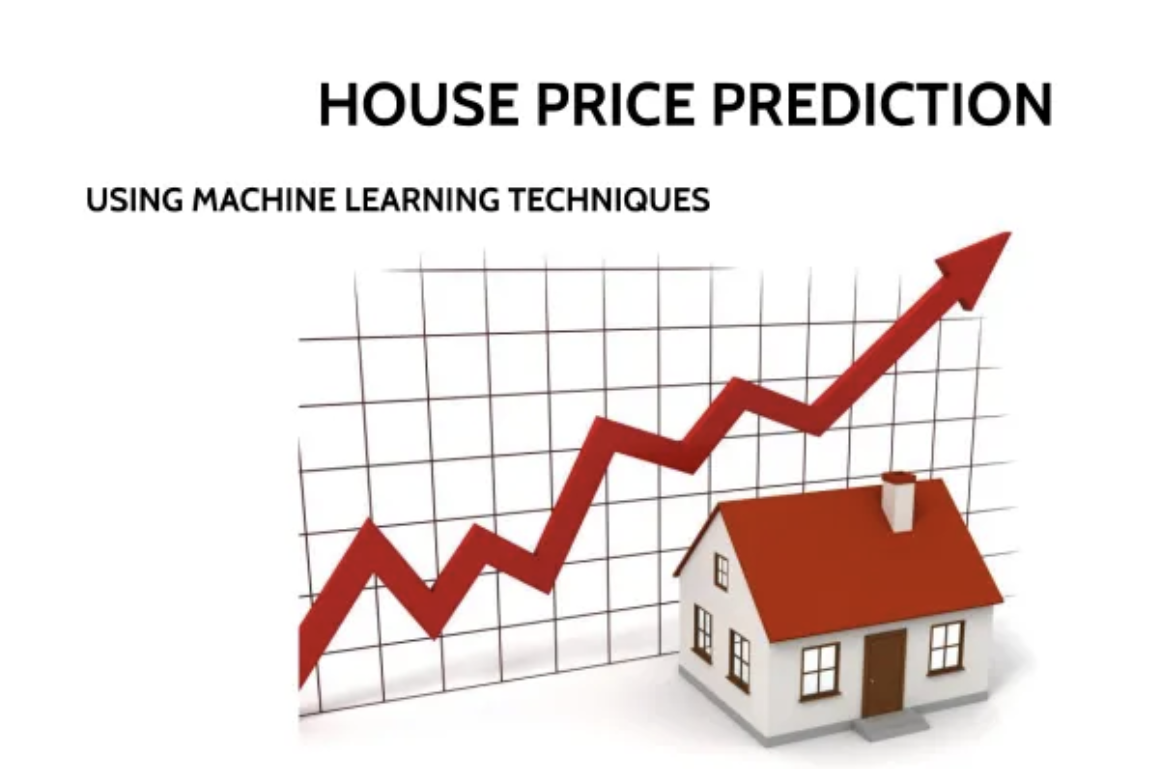



#Section II :- Dataset : Loading and Understanding it .  

In [2]:
import pandas as pd

df = pd.read_csv('house_price.csv')

display(df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Conclusion :- Target Column (y) is SalePrice and all other columns (except Id) can act as features .

Id is just and index column , and doesn't contain any information .

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Many columns have lots of Null entries (We have to take care of this while pre processing ).



```
# This is formatted as code
```

Categorical vs Numerical Columns

In [4]:
# Selecting categorical columns (object or category type)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Selecting non-categorical columns (numerical and other types)
non_categorical_columns = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical Columns: \n", categorical_columns)
print("--------------------------")
print("Non-Categorical Columns: \n", non_categorical_columns)

Categorical Columns: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
--------------------------
Non-Categorical Columns: 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplace

# Section III :- Exploratory  Data Analysis

For Numerical Columns - Box Plots


How to Read a Box Plot :

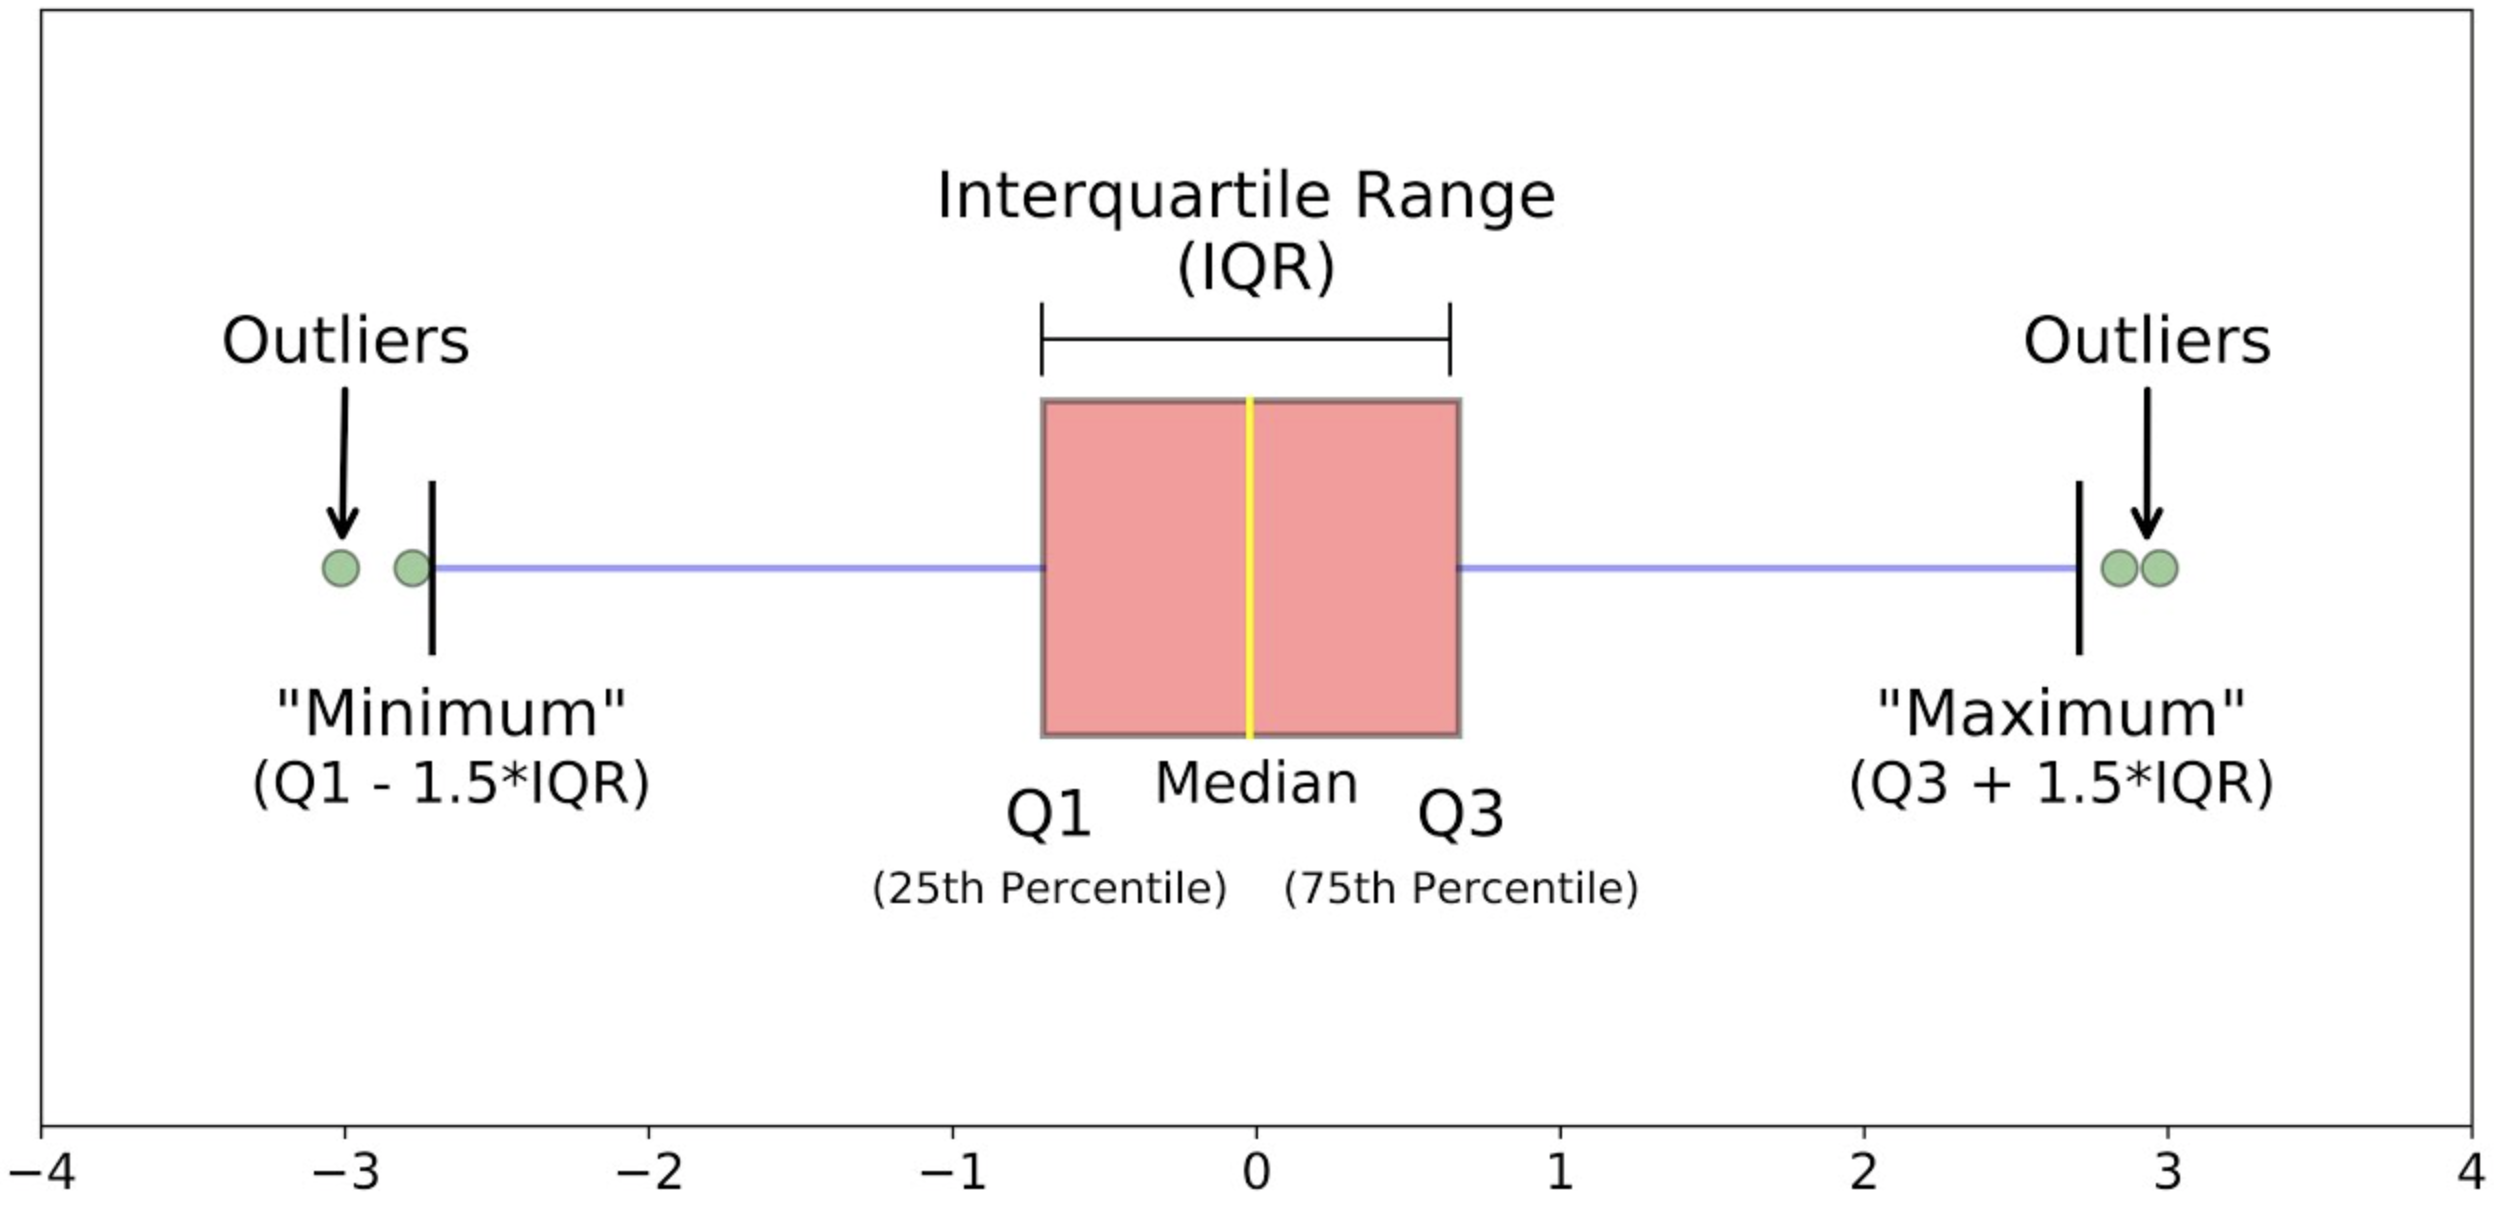

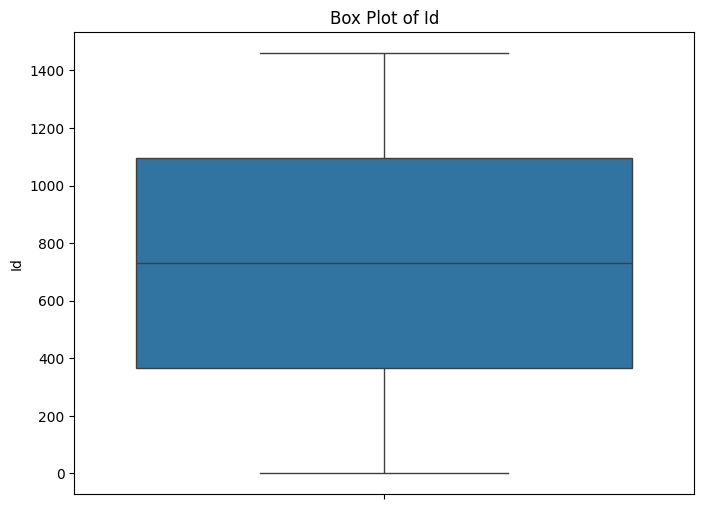

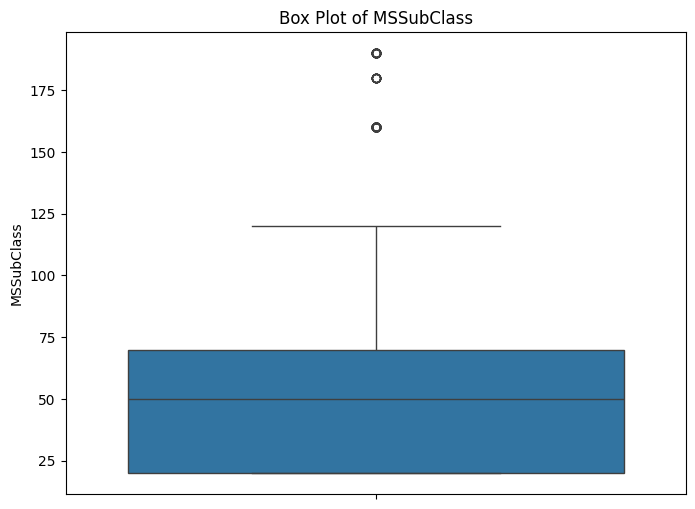

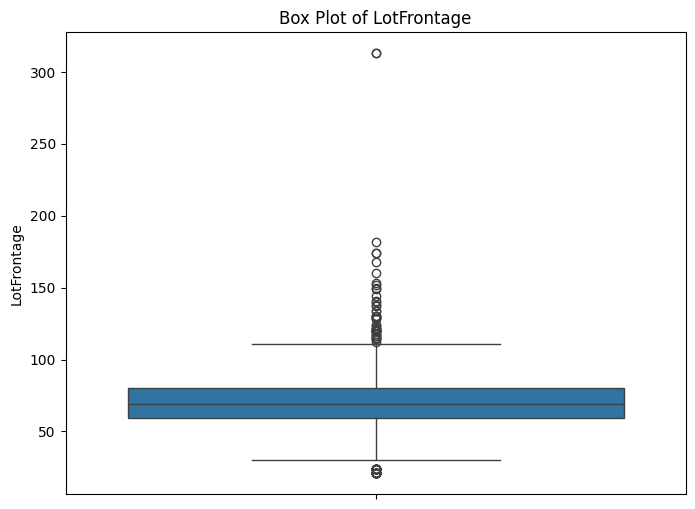

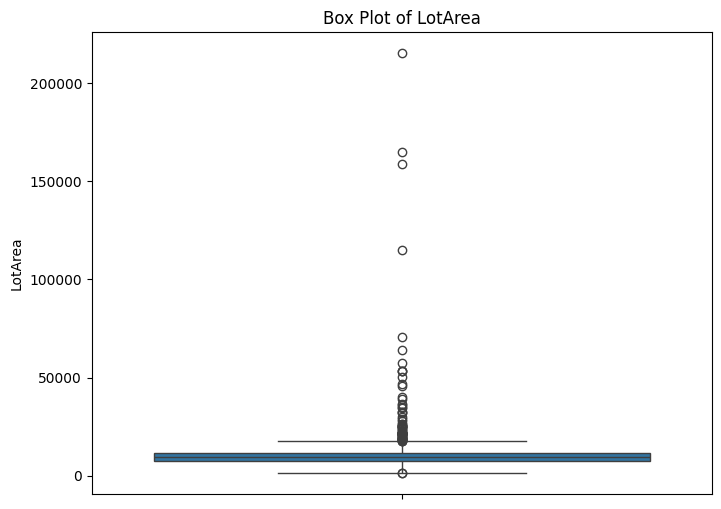

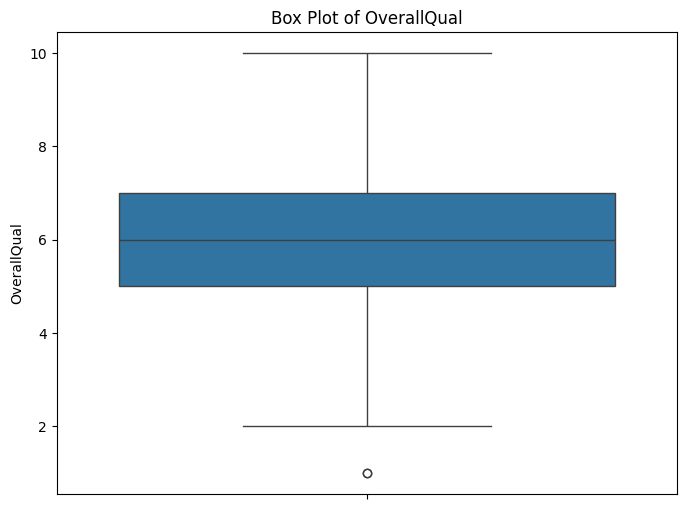

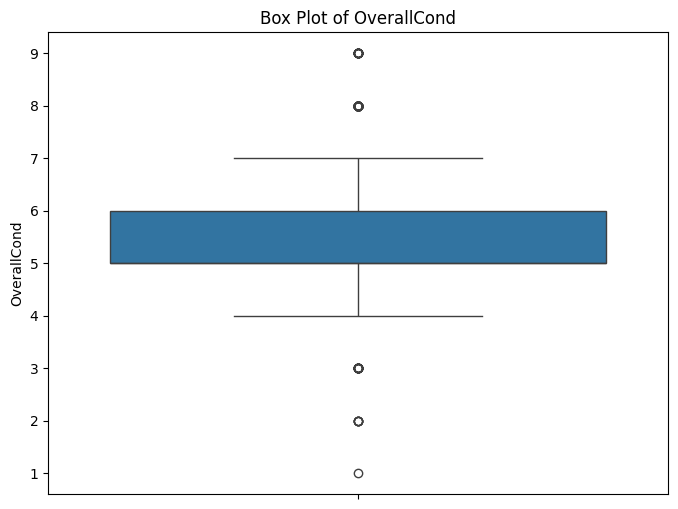

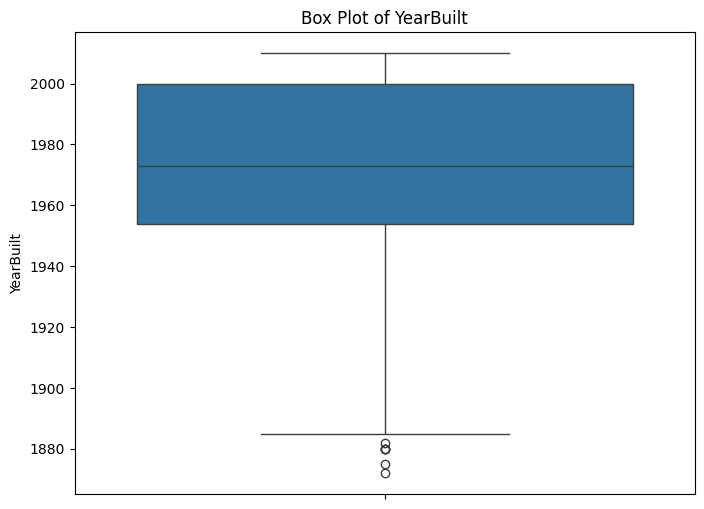

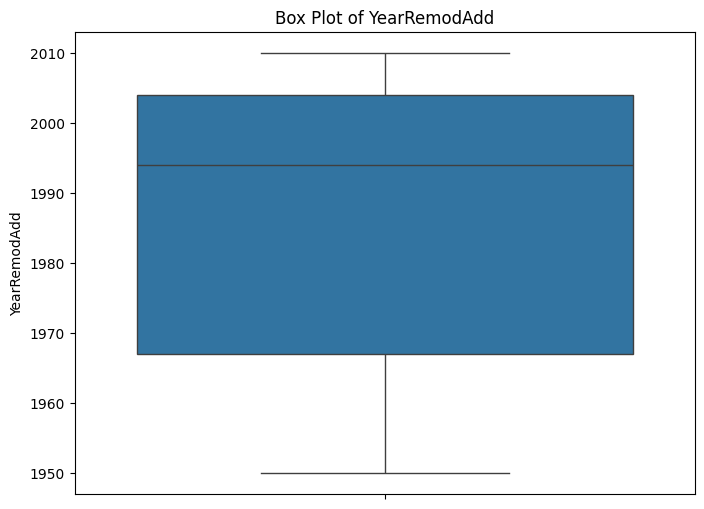

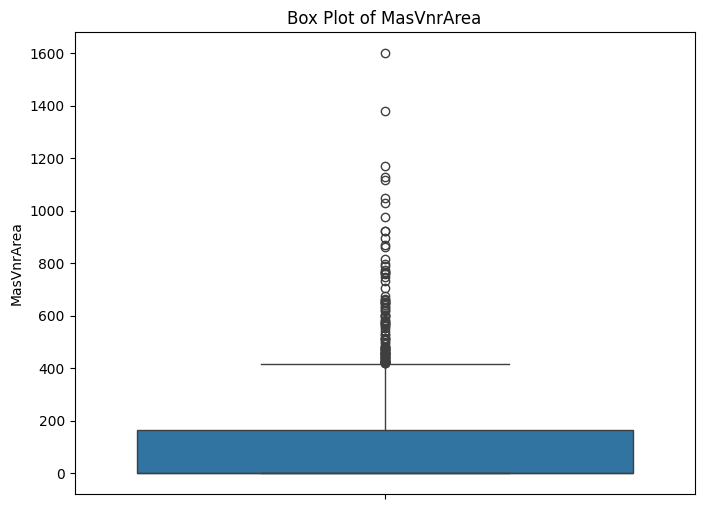

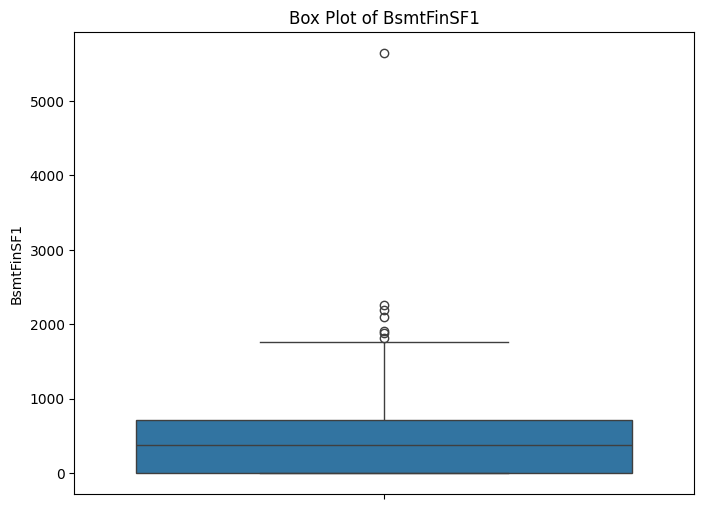

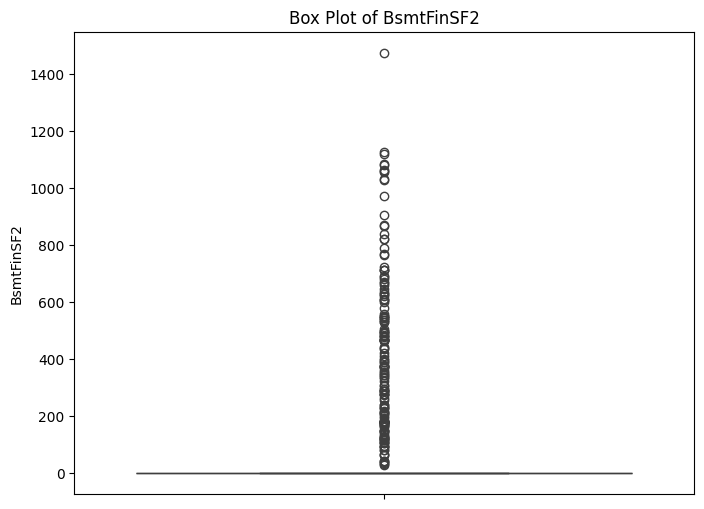

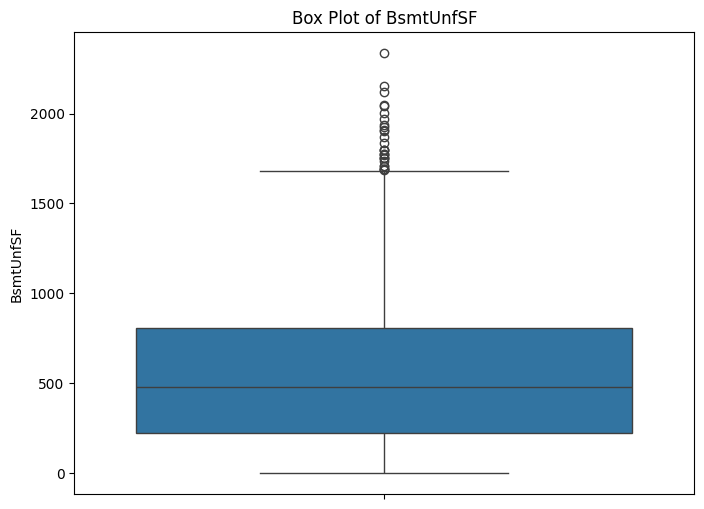

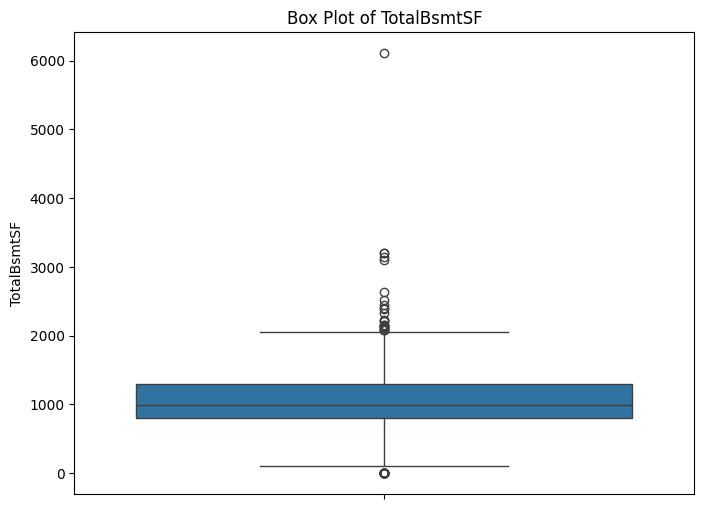

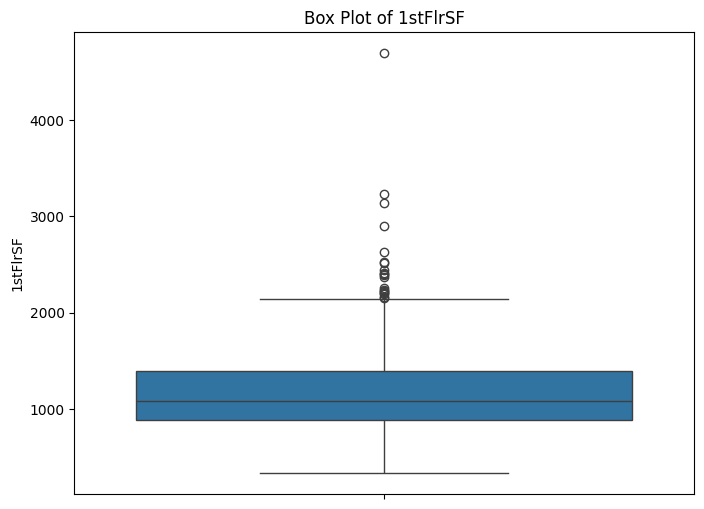

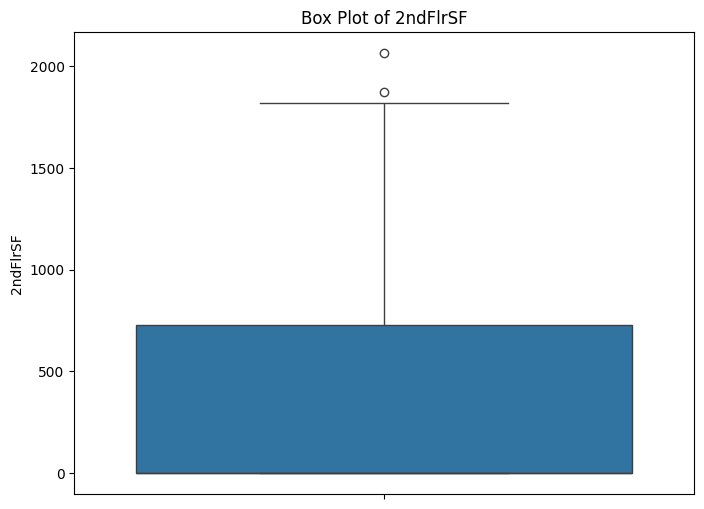

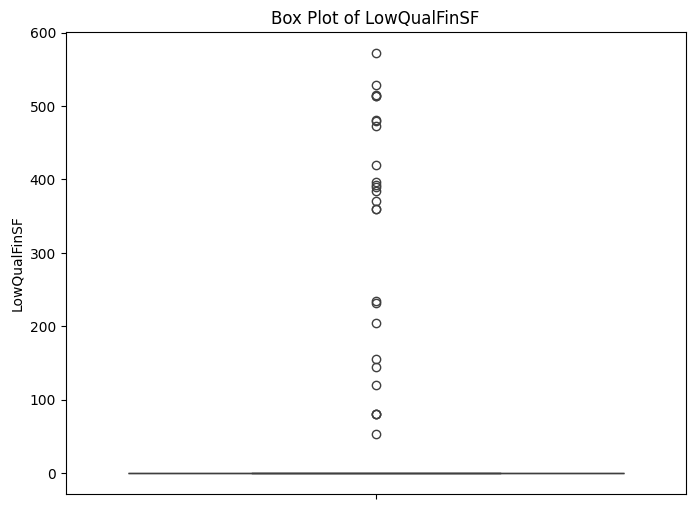

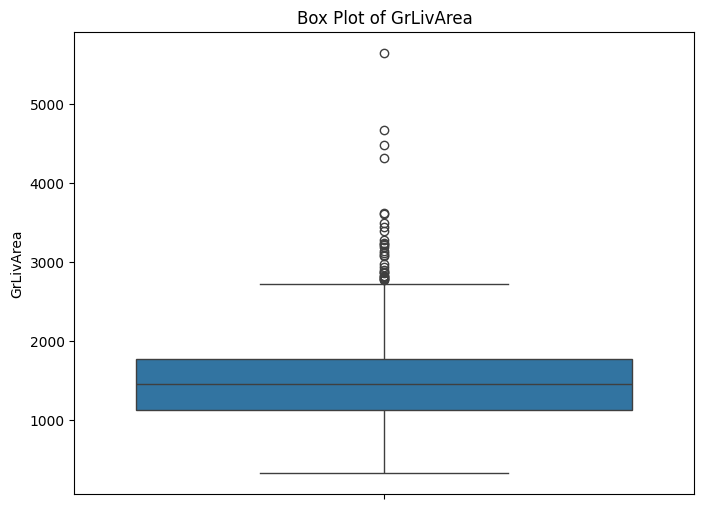

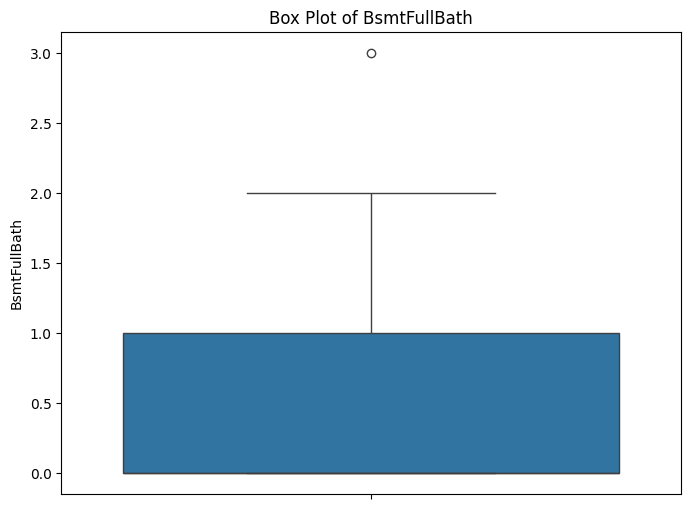

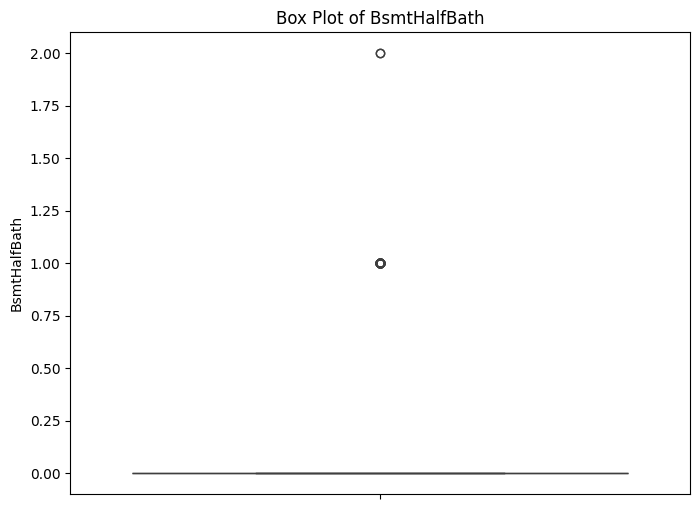

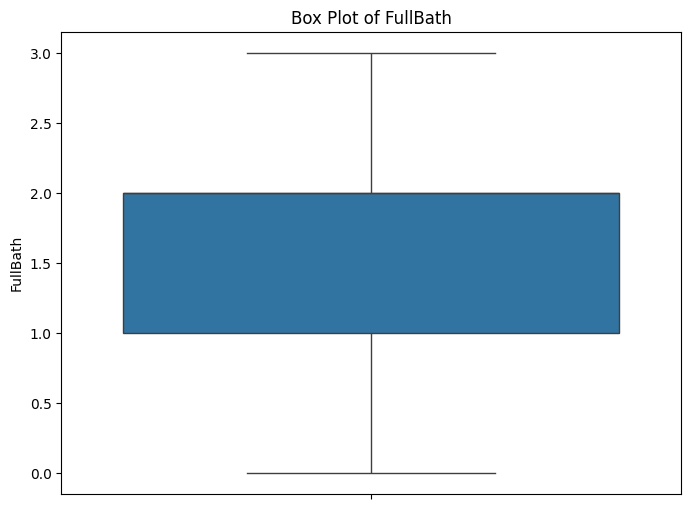

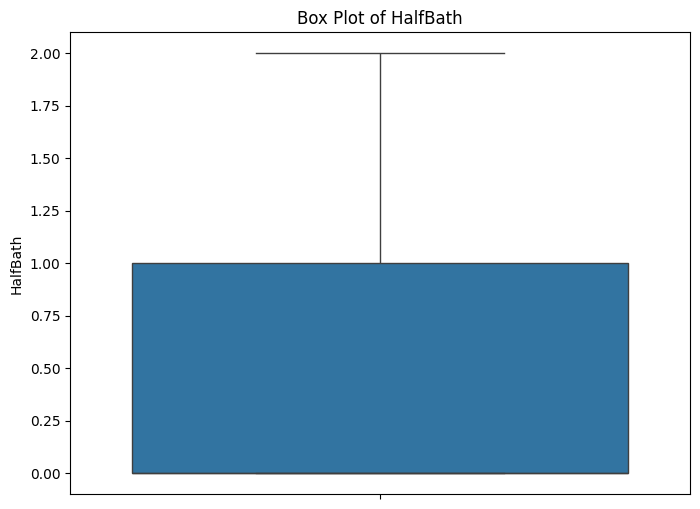

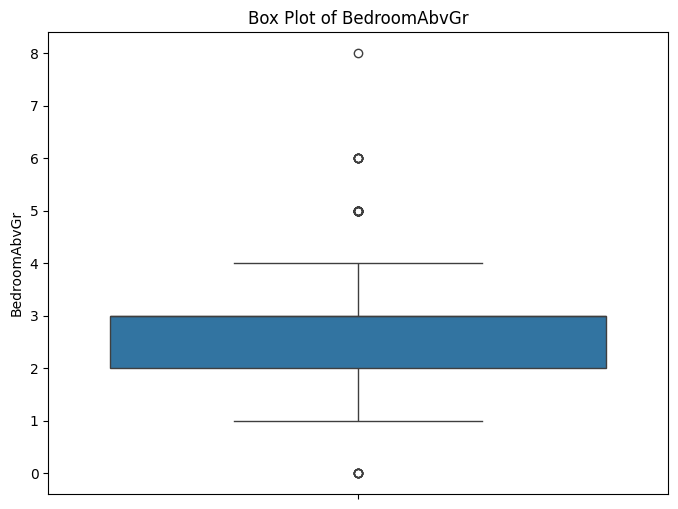

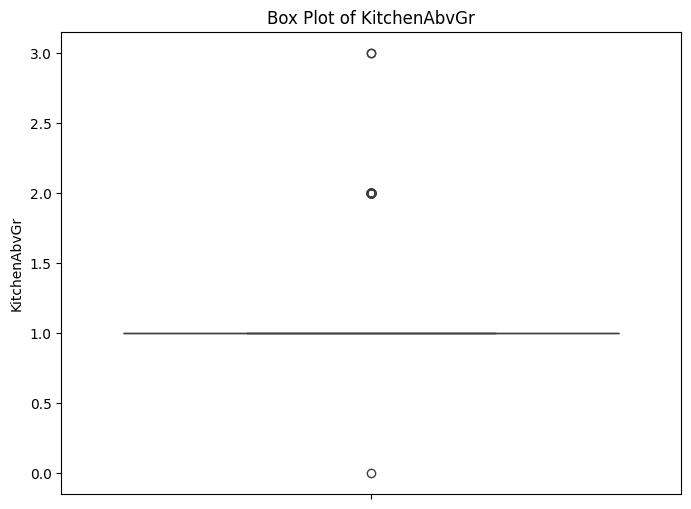

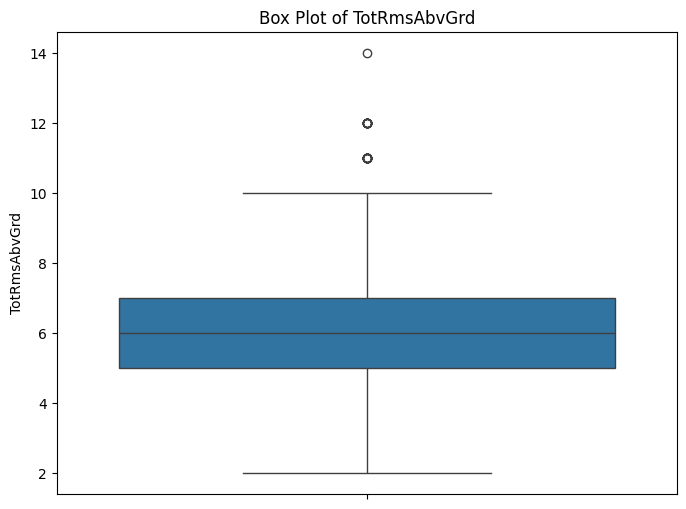

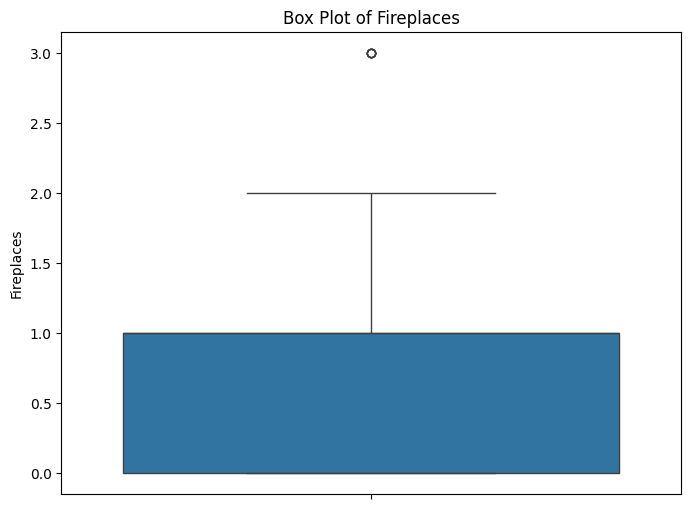

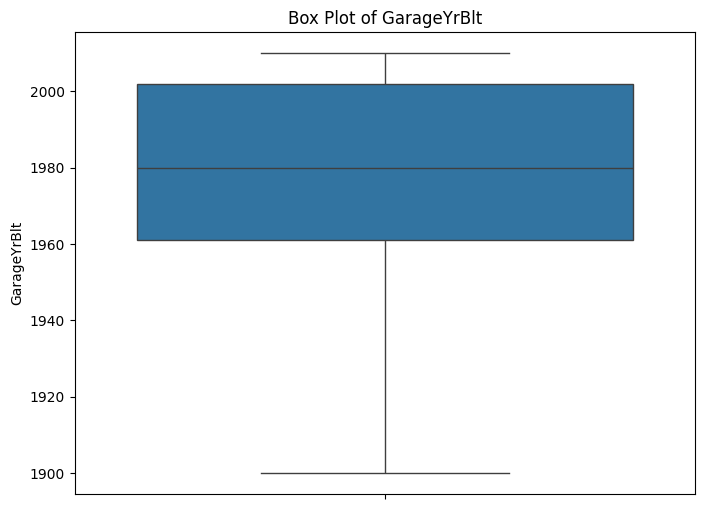

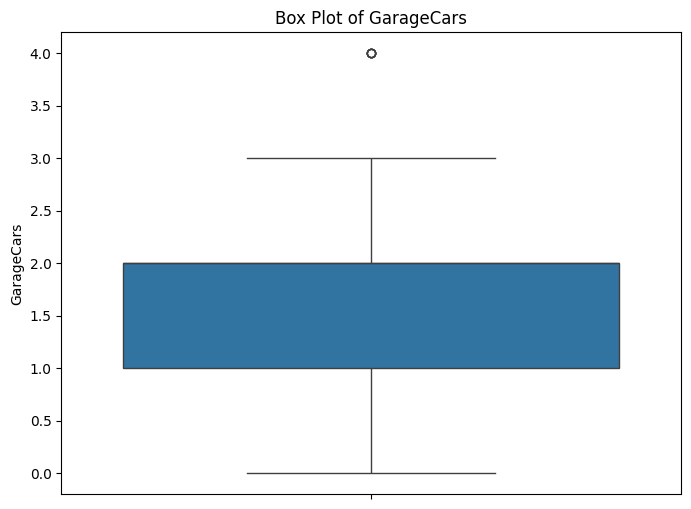

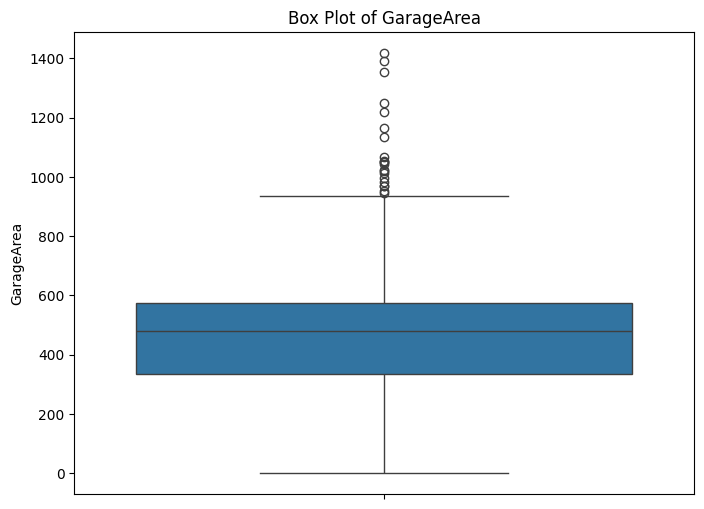

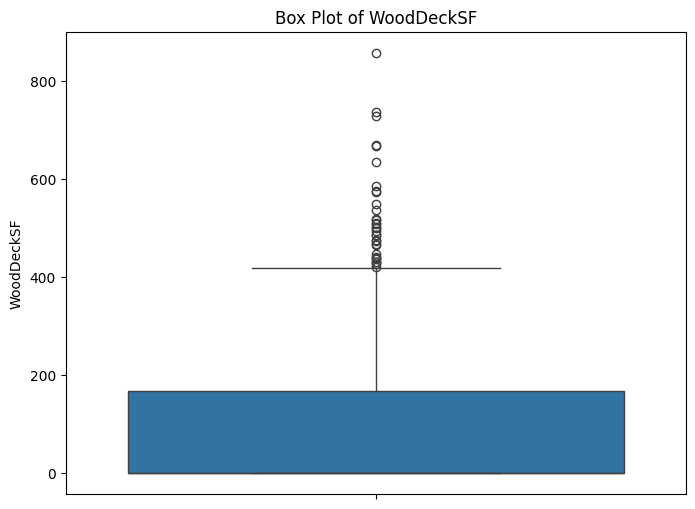

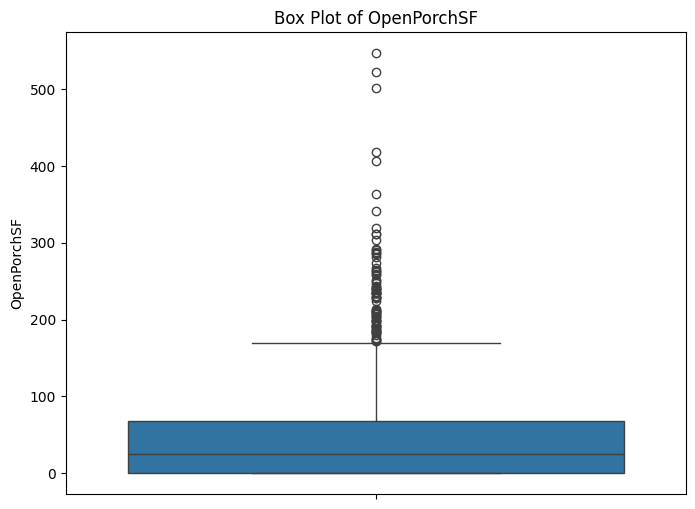

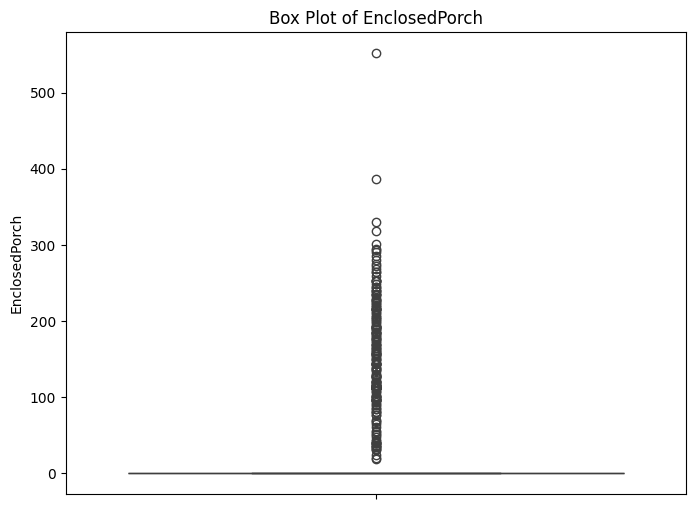

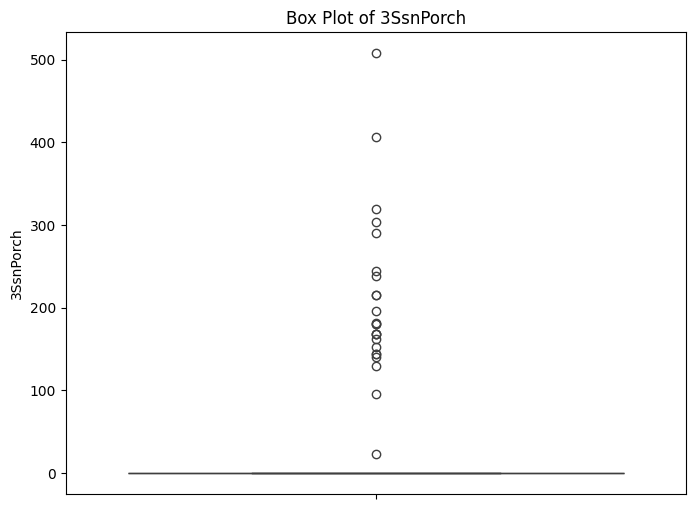

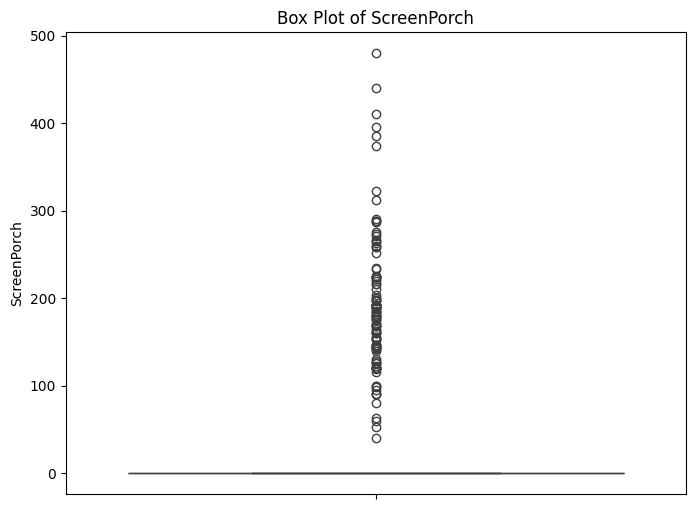

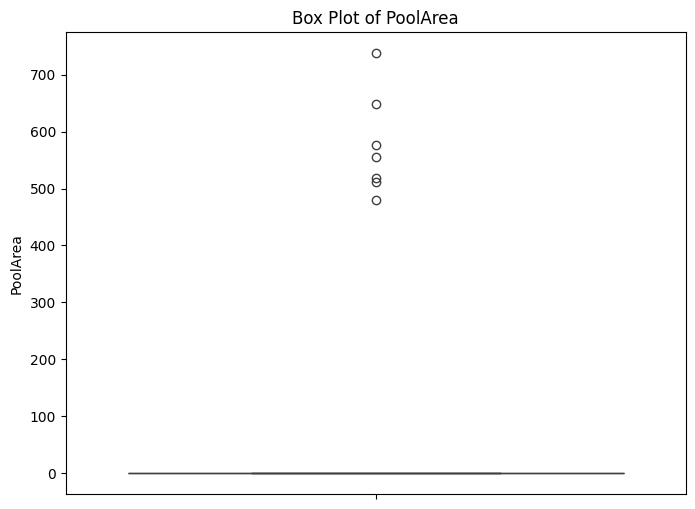

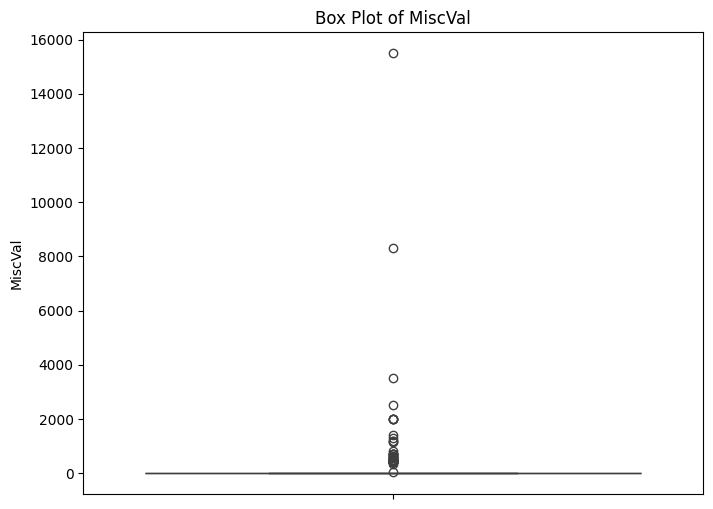

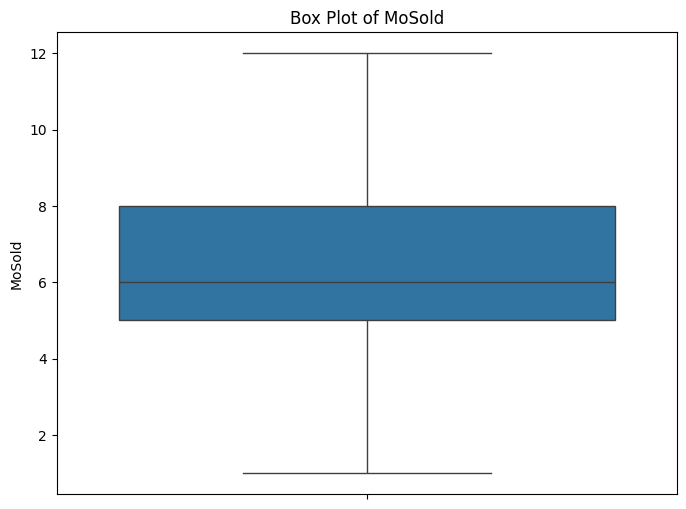

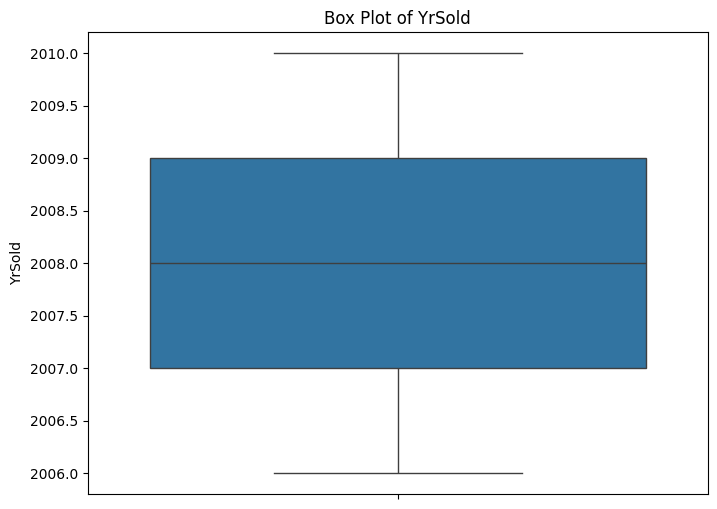

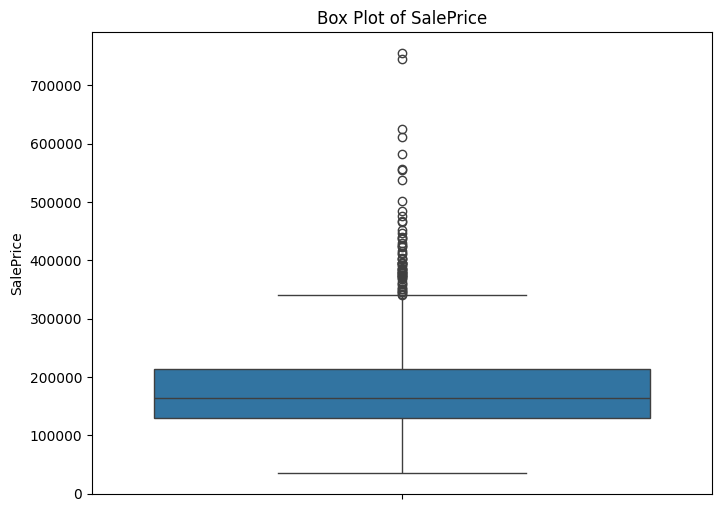

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a separate box plot for each non-categorical column
for col in non_categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

Correlation Heatmap

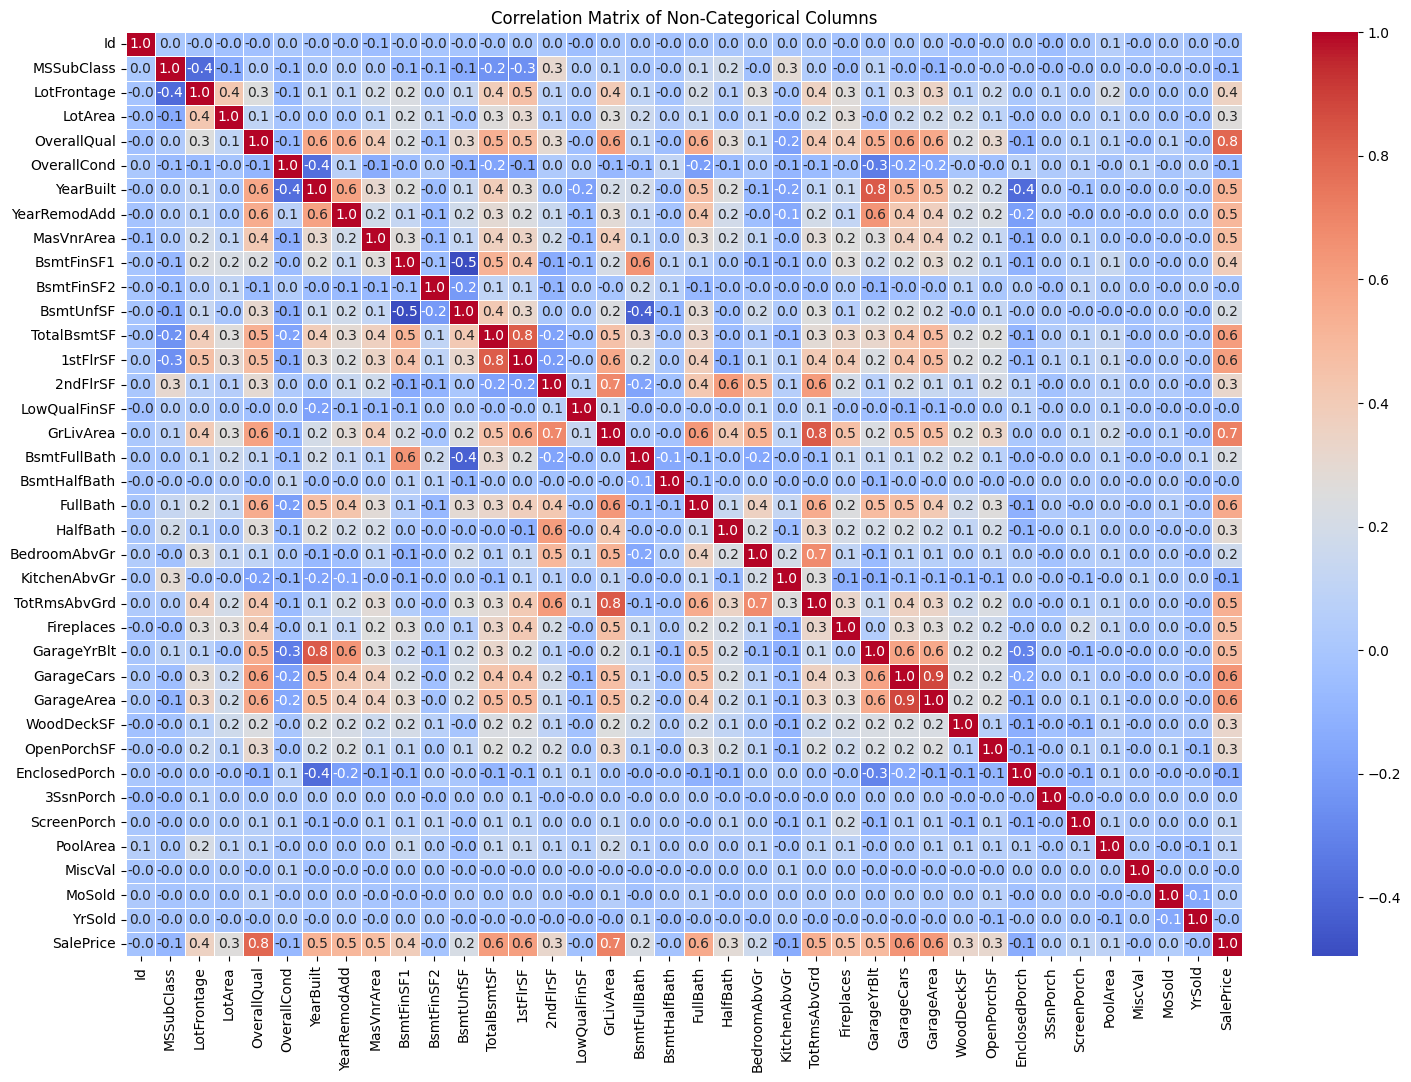

In [41]:
# Filter the DataFrame to include only non-categorical columns
numerical_df = df[non_categorical_columns]

# Compute the correlation matrix for these columns
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix of Non-Categorical Columns')
plt.show()

For Categorical Data :- Bar Plots

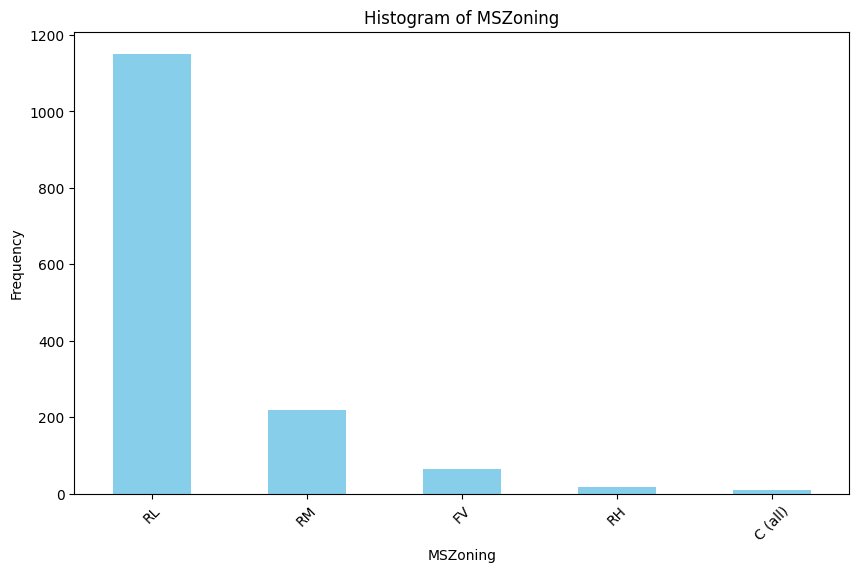

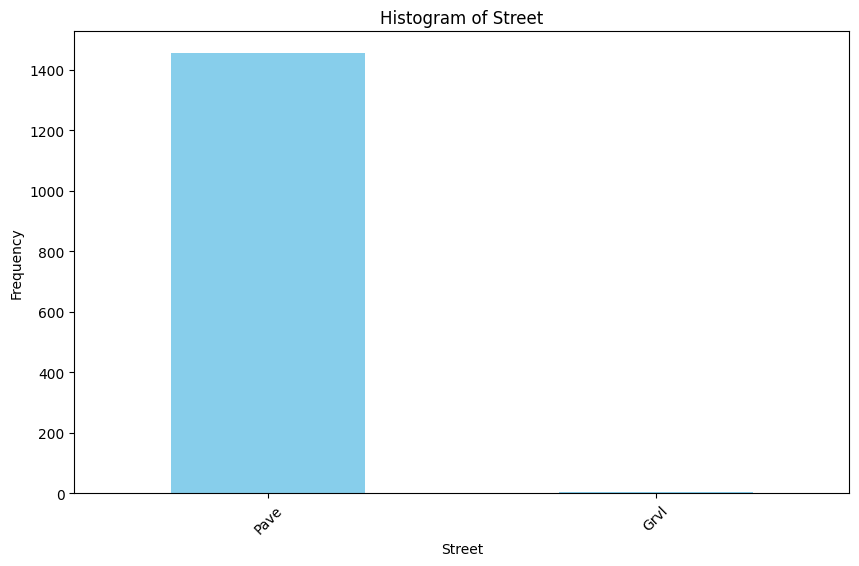

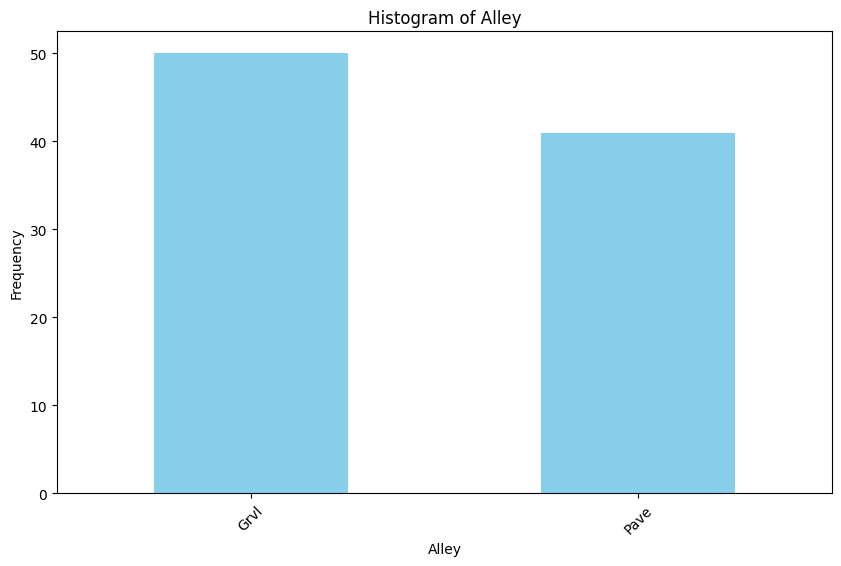

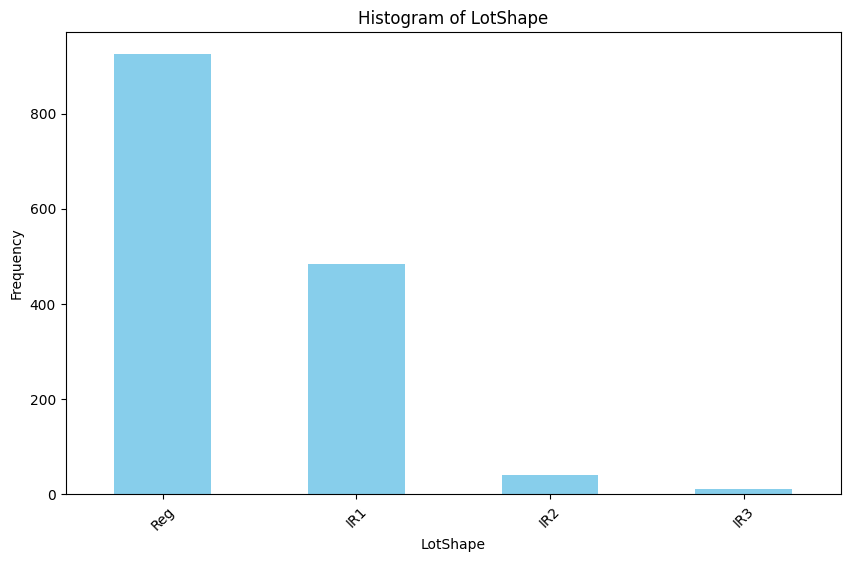

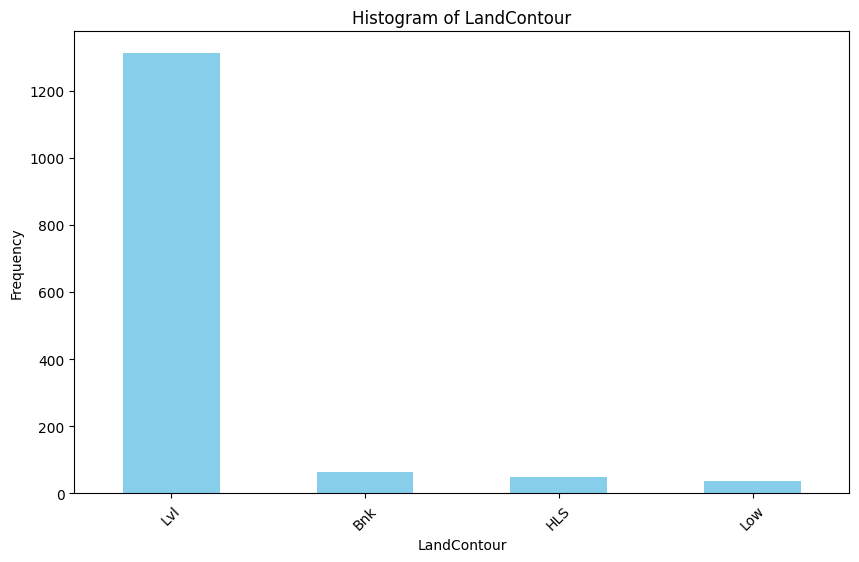

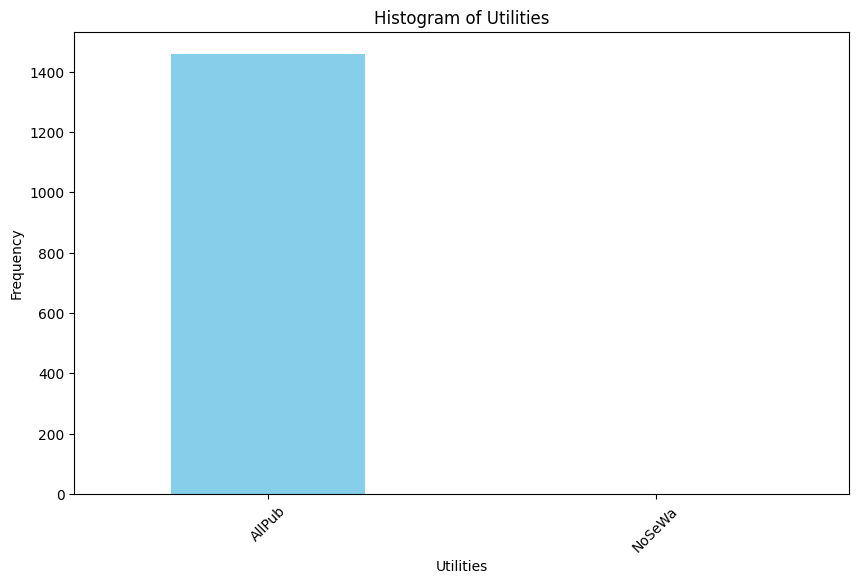

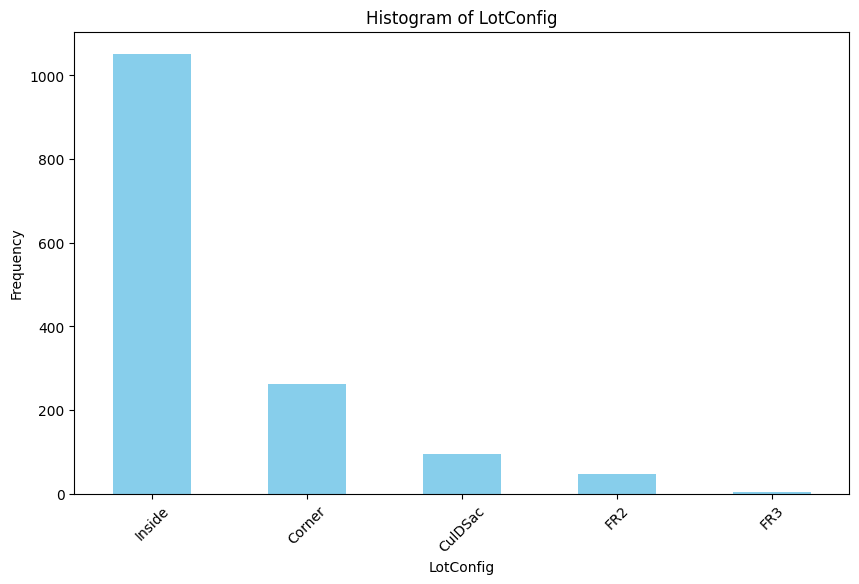

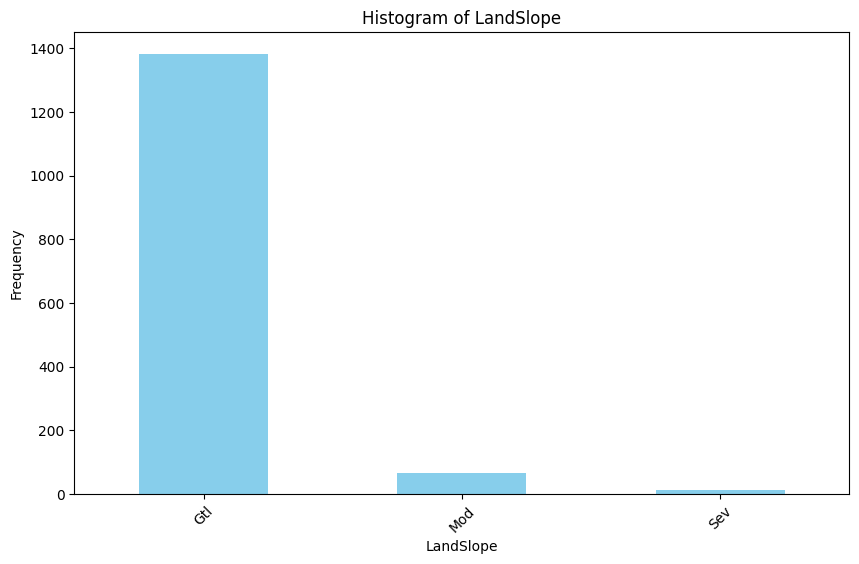

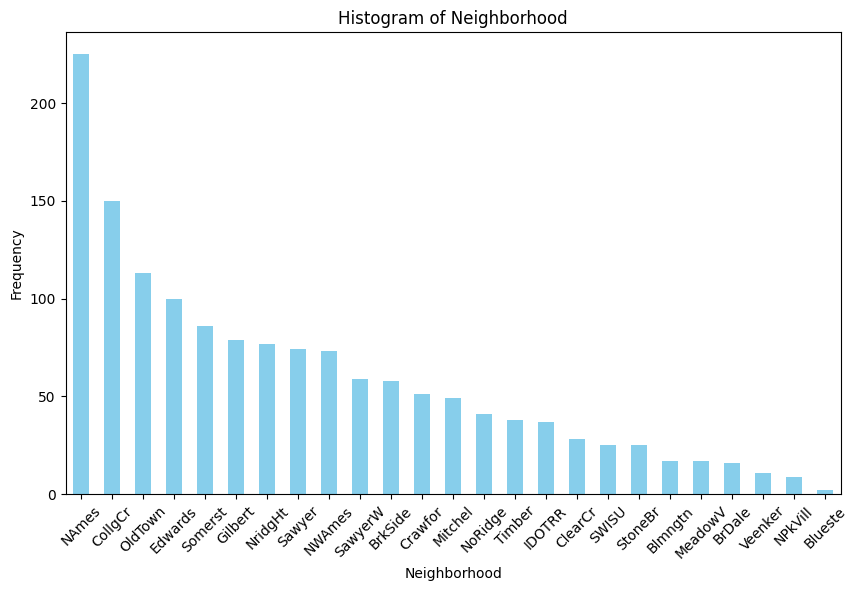

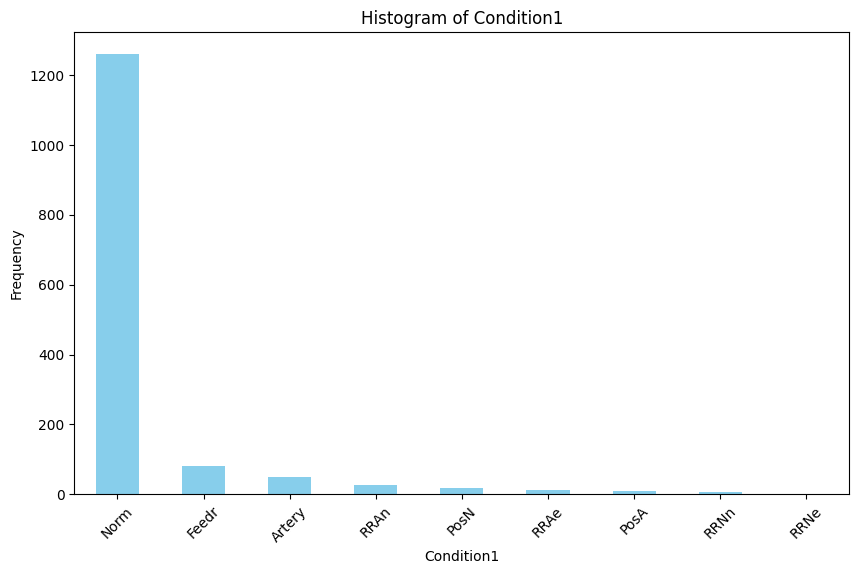

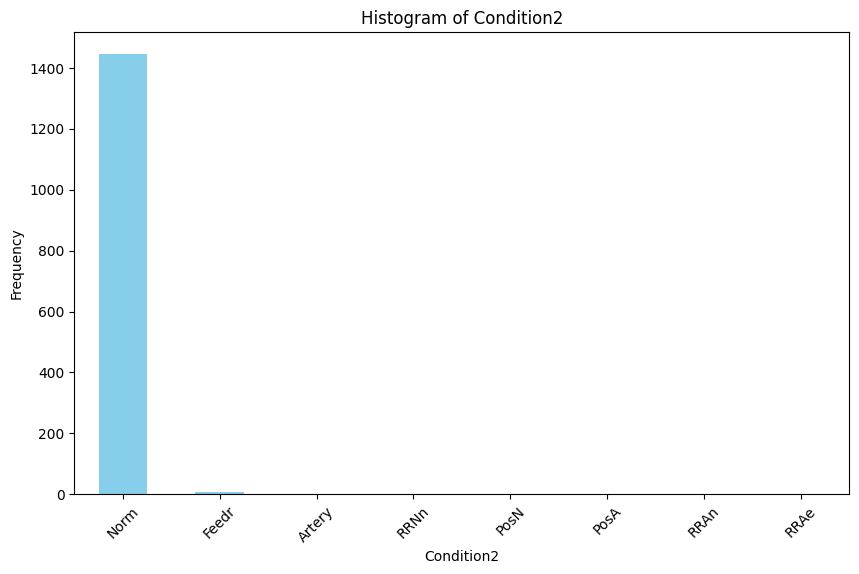

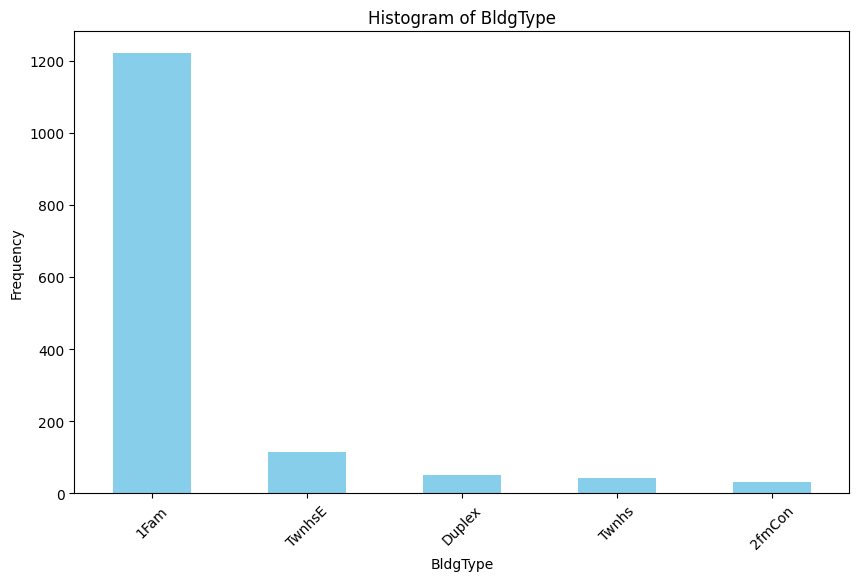

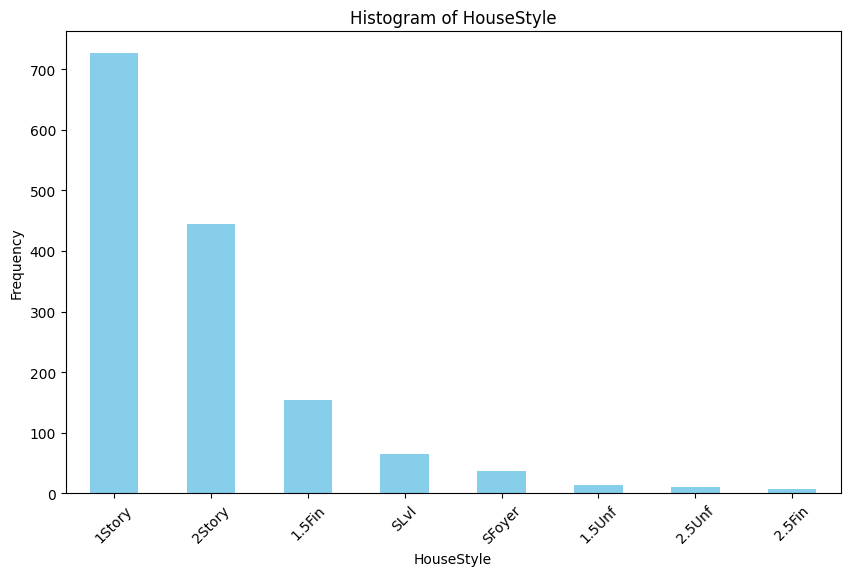

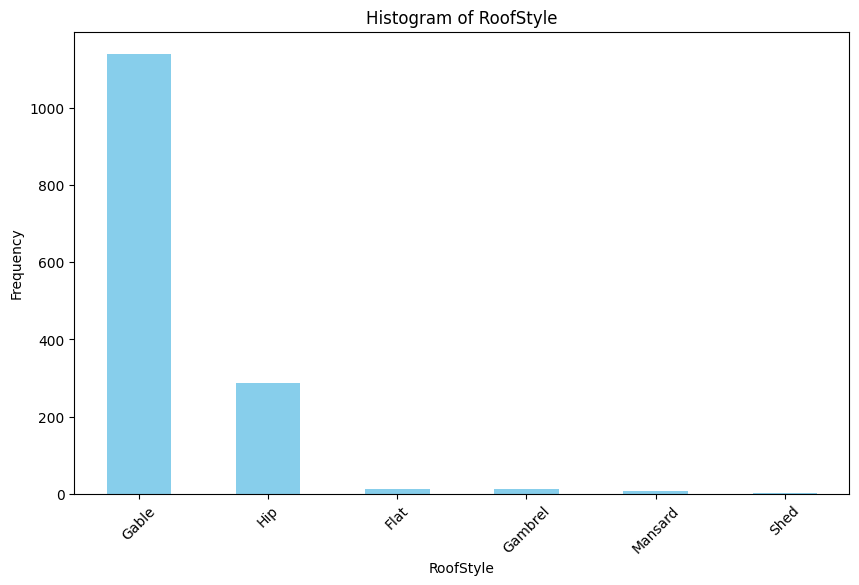

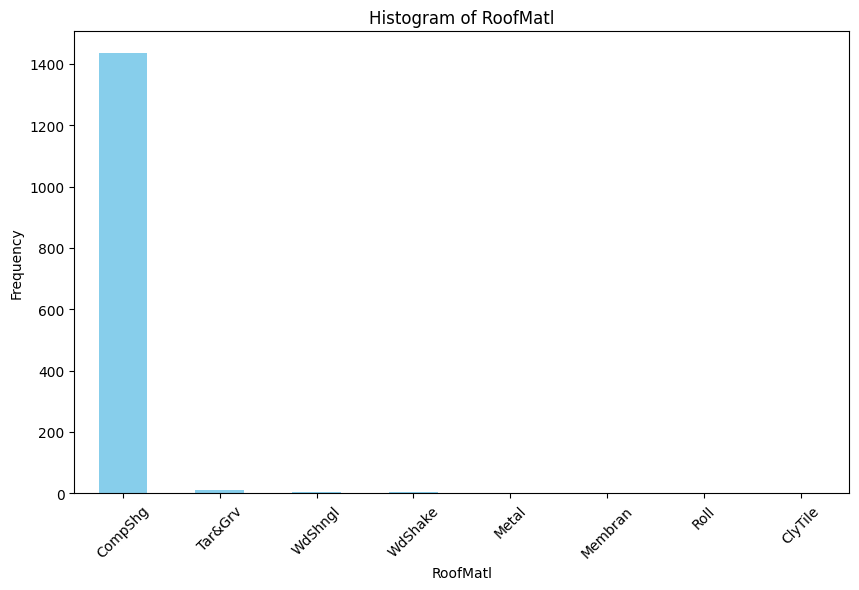

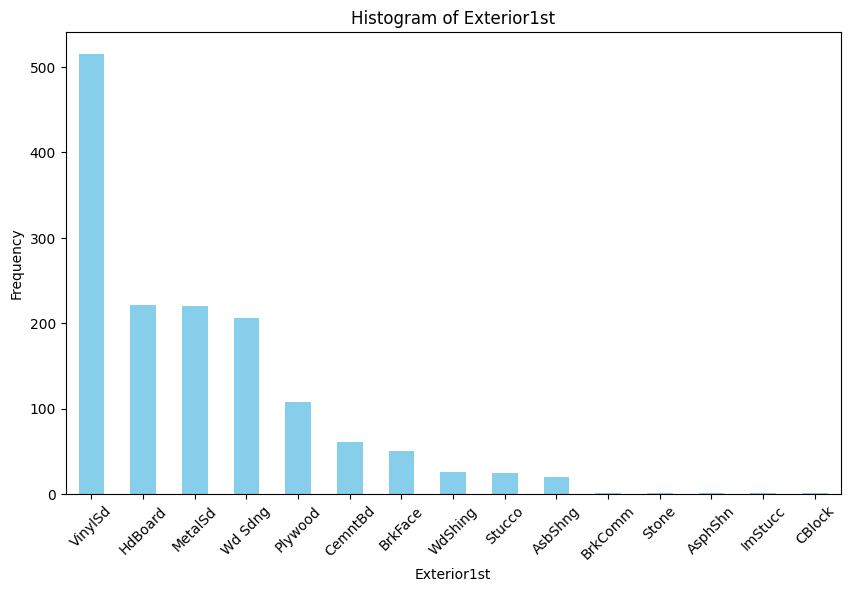

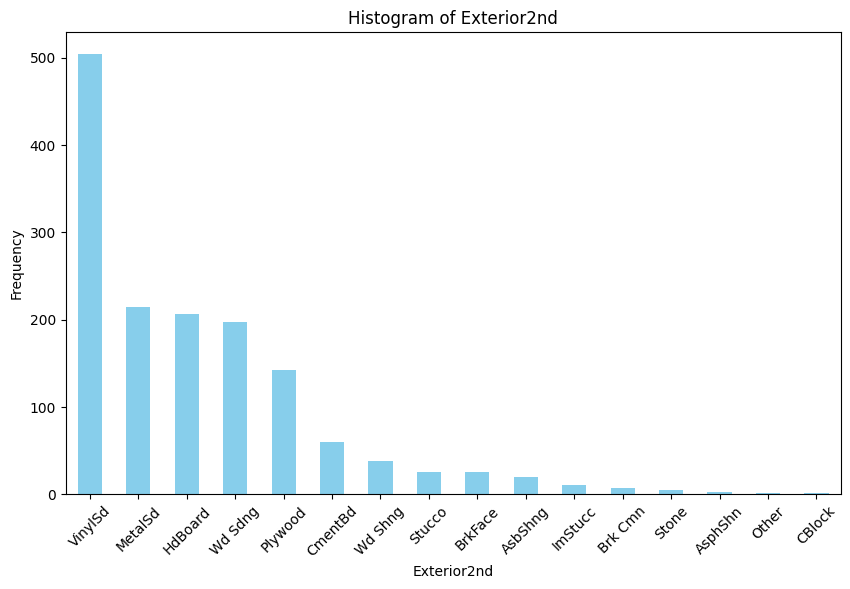

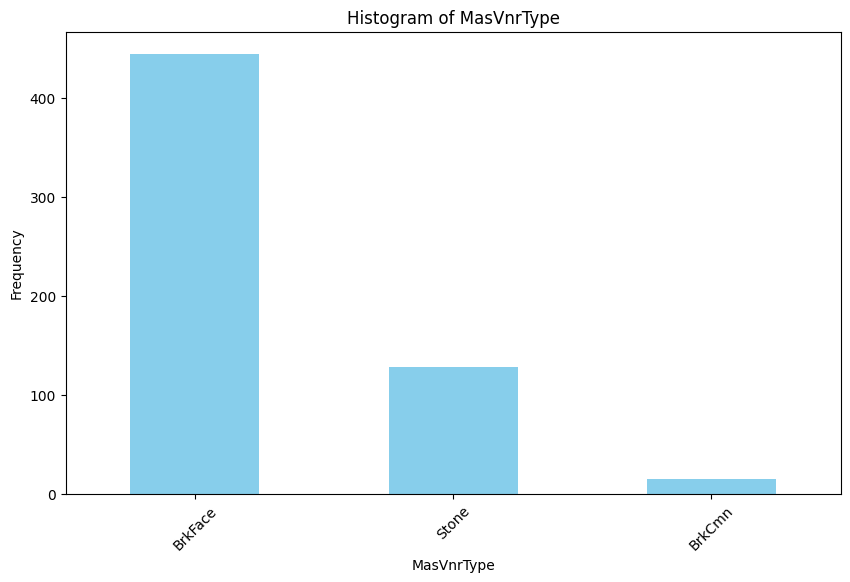

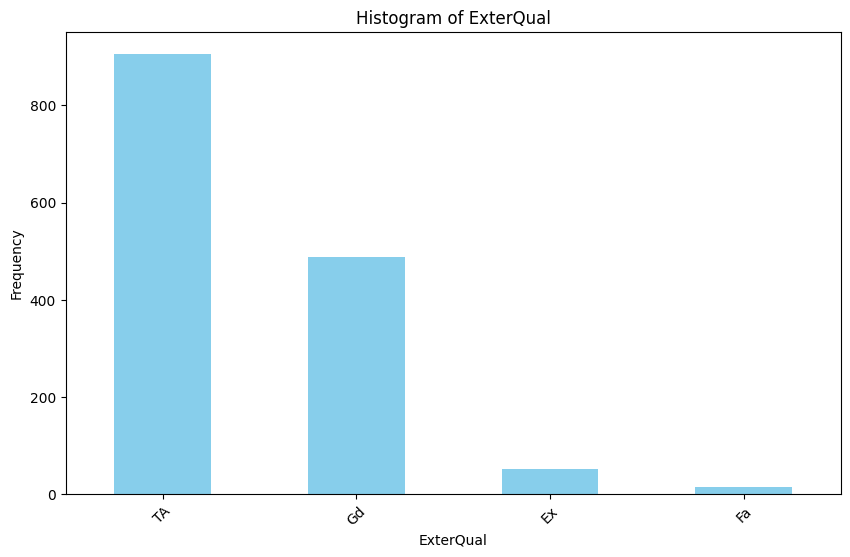

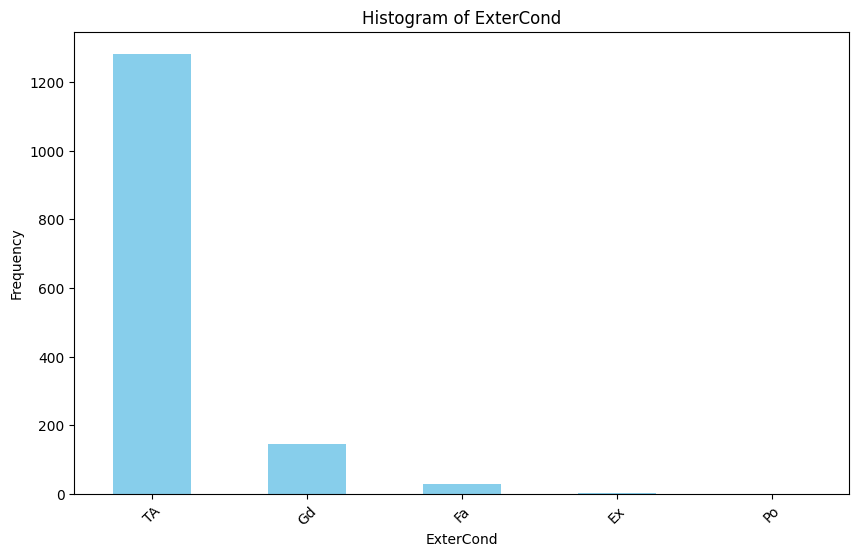

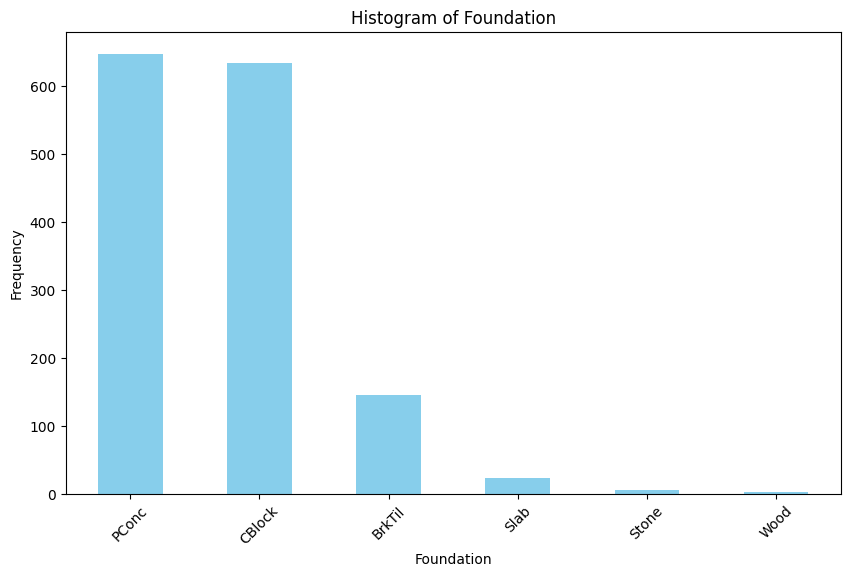

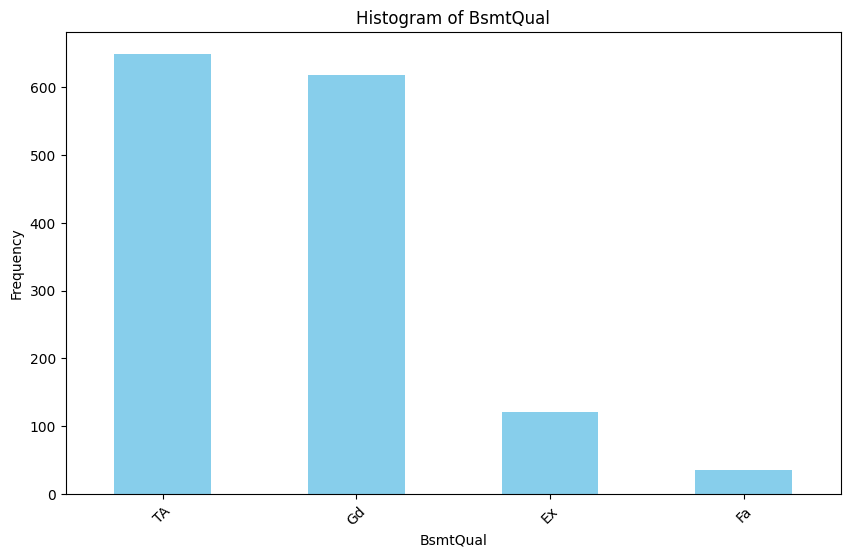

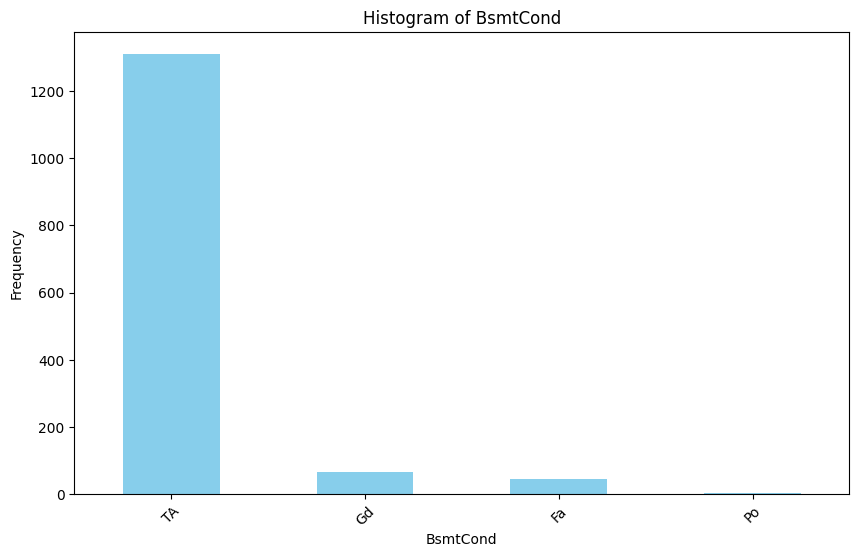

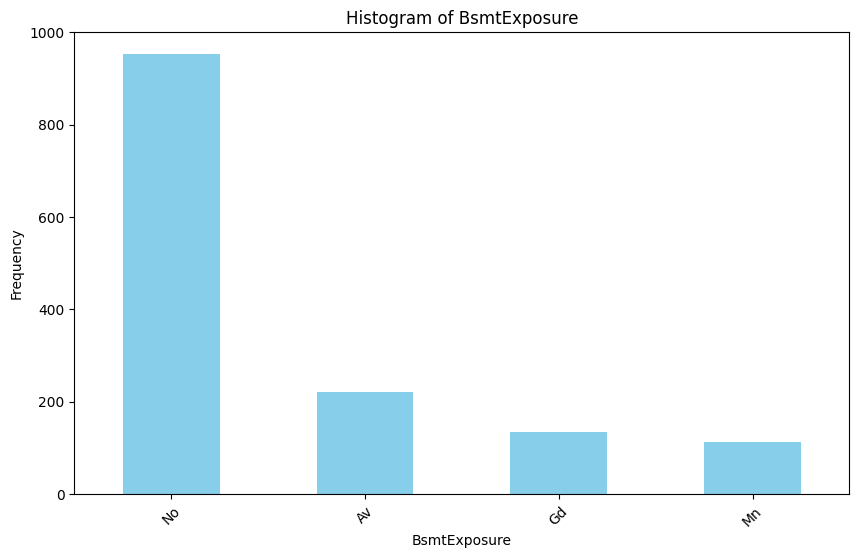

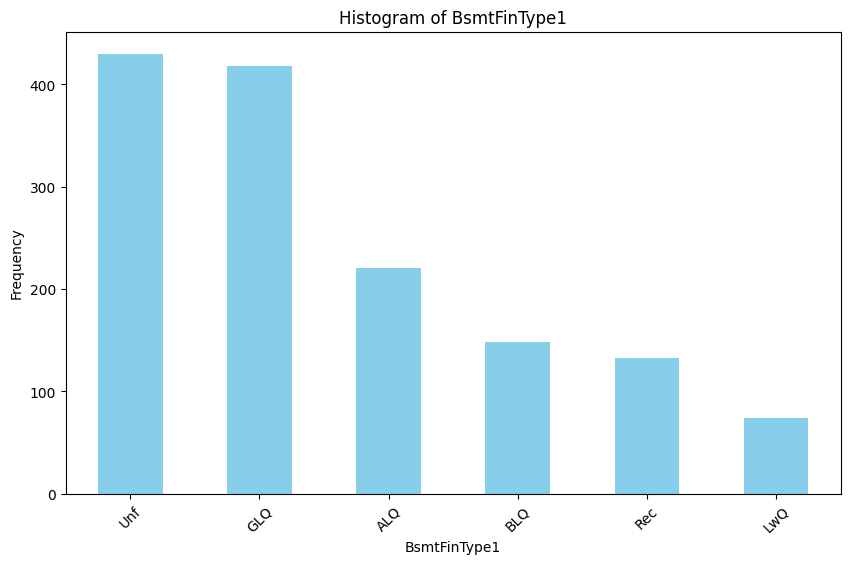

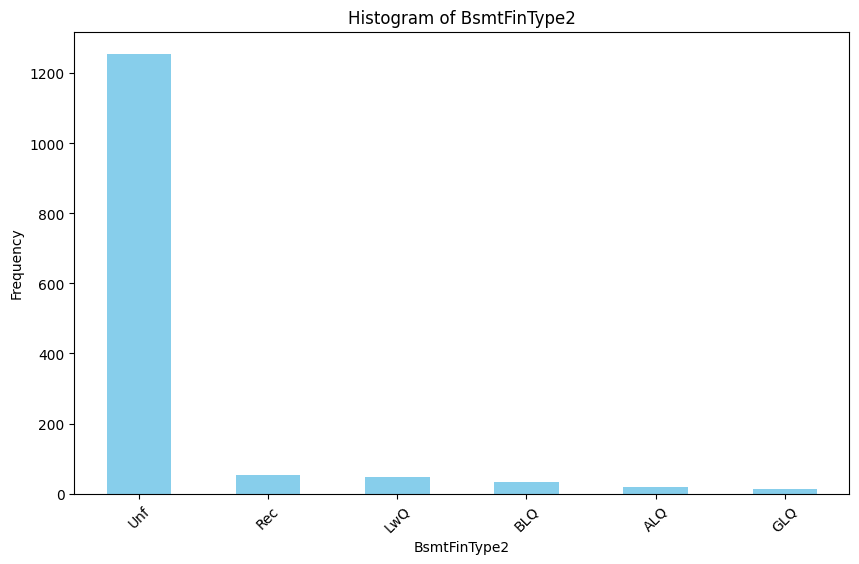

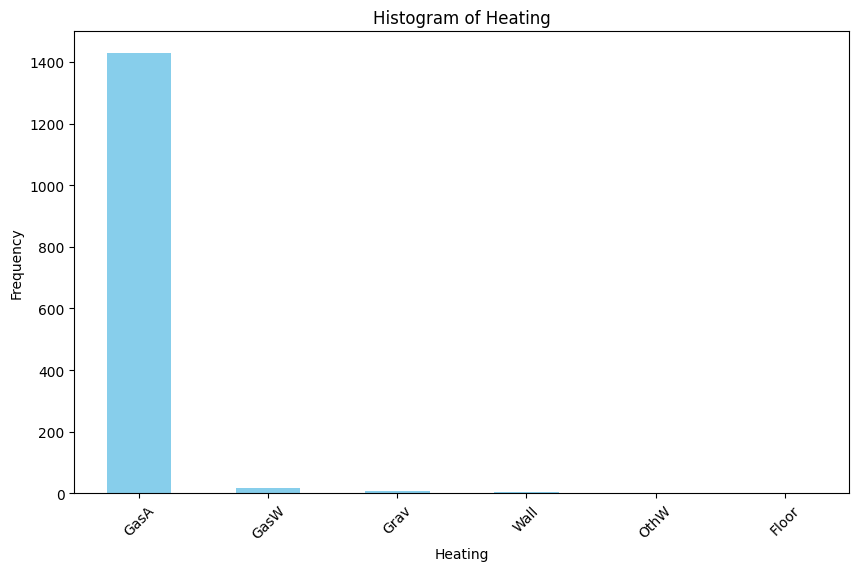

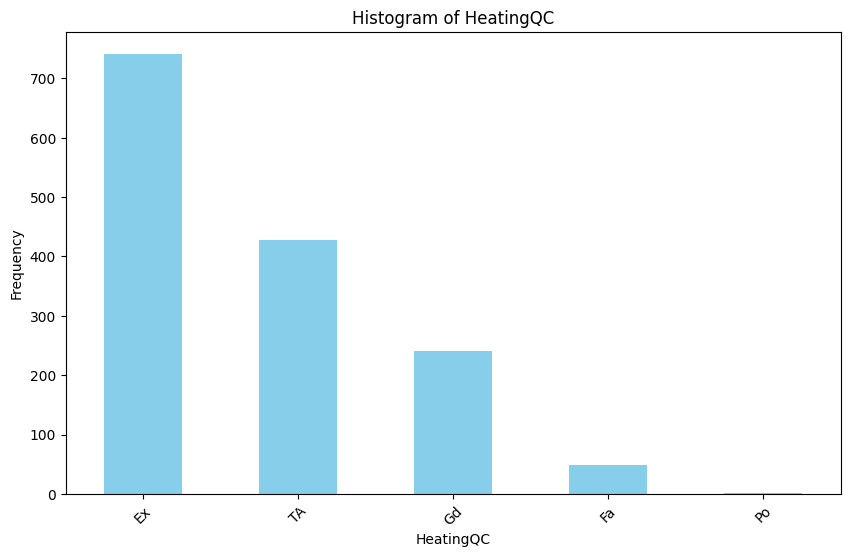

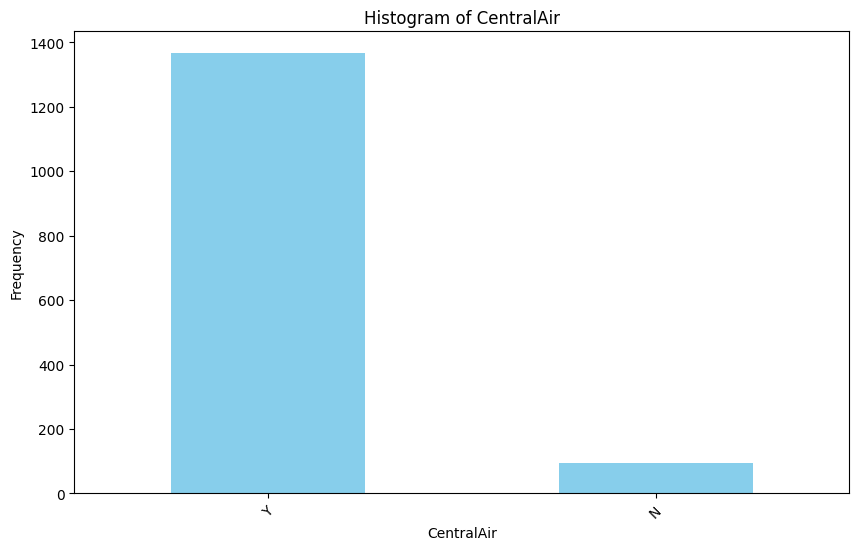

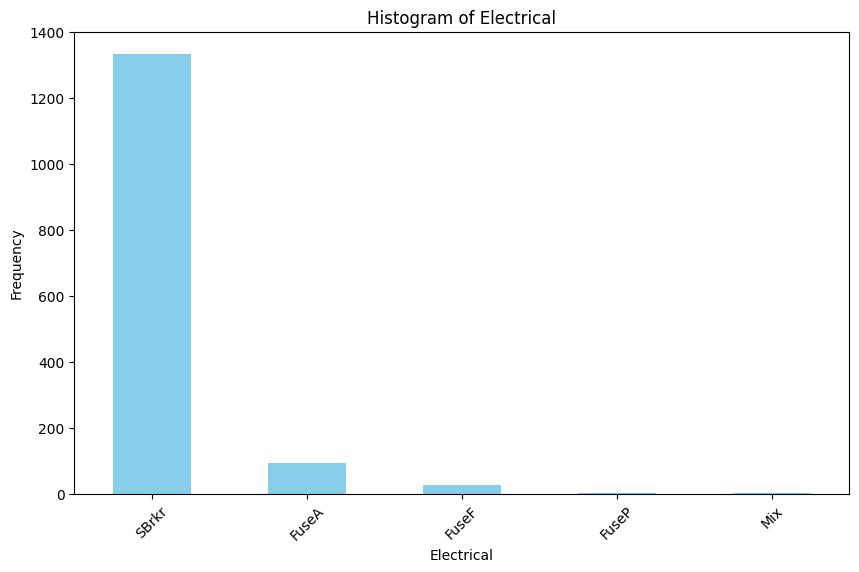

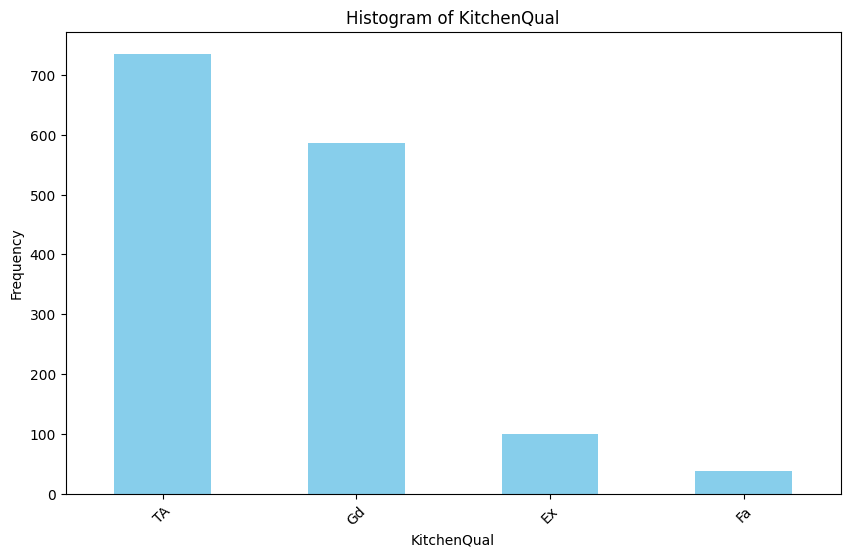

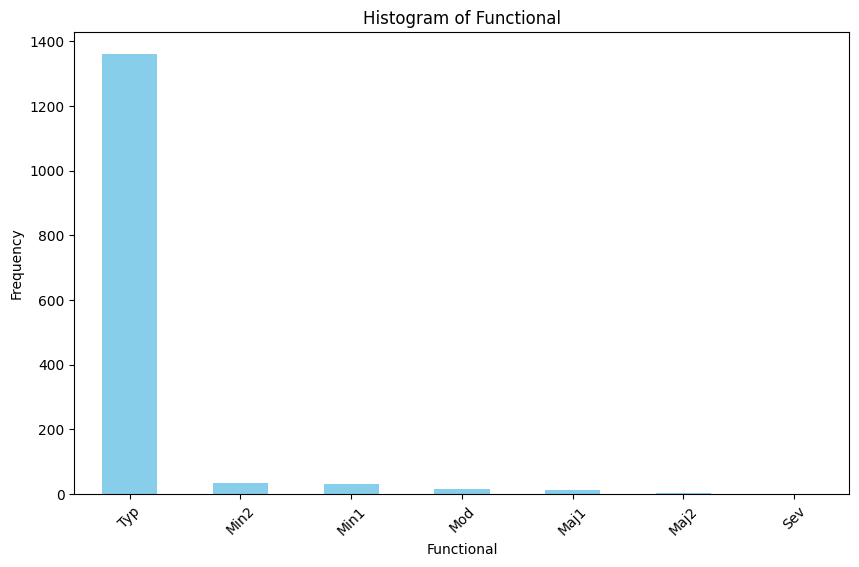

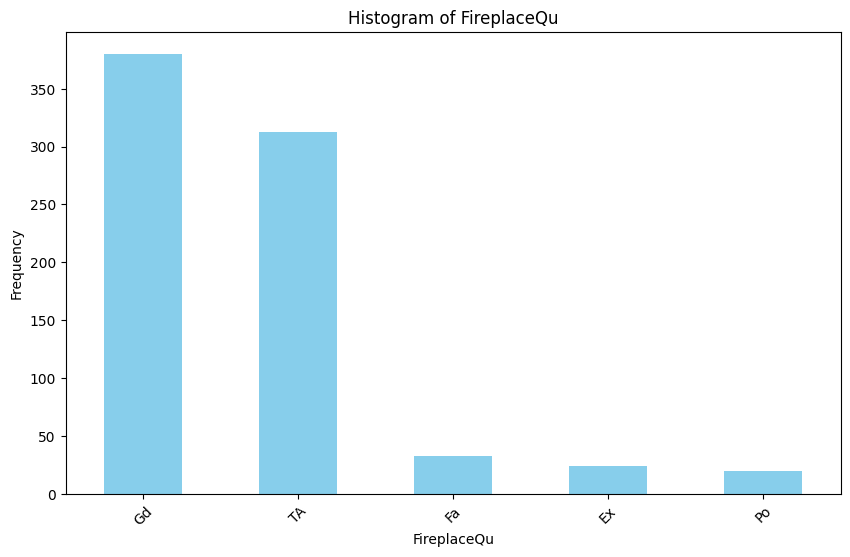

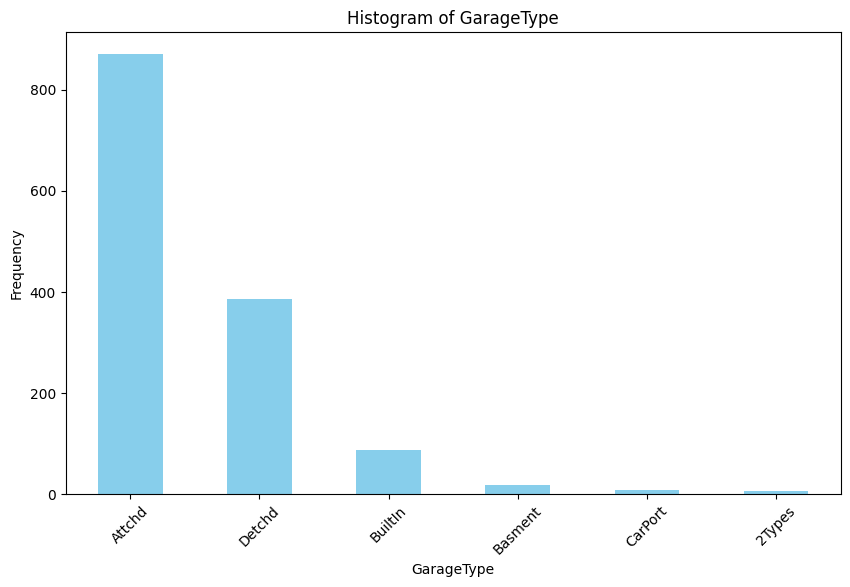

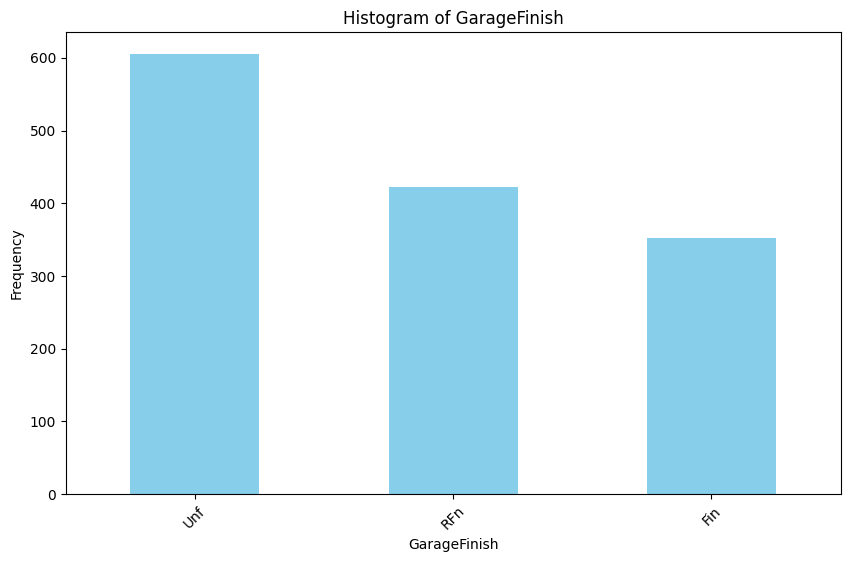

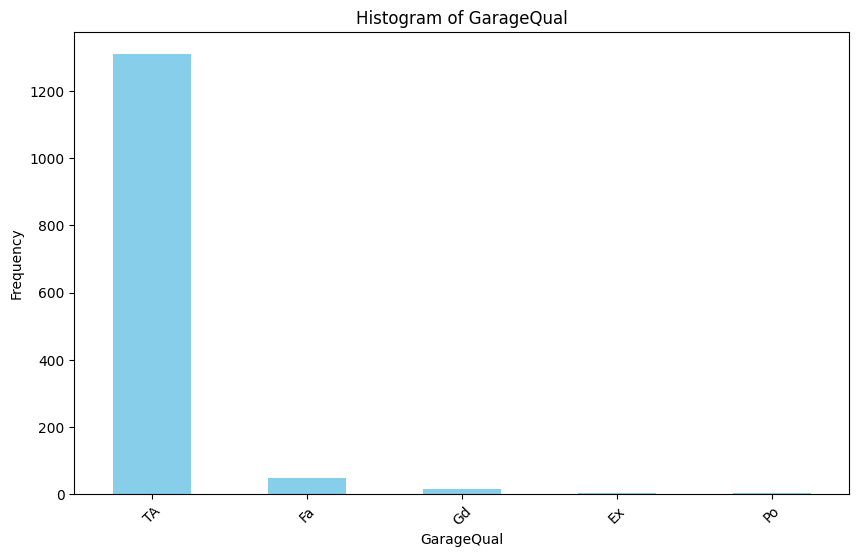

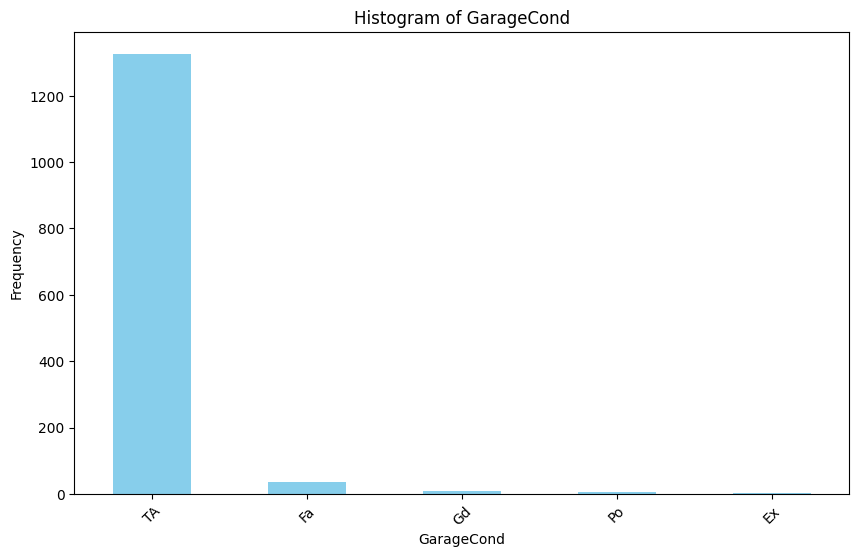

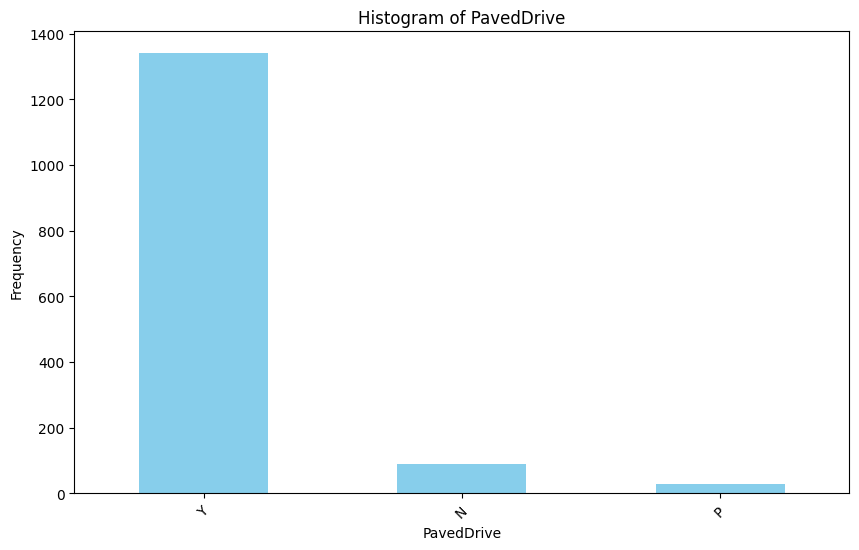

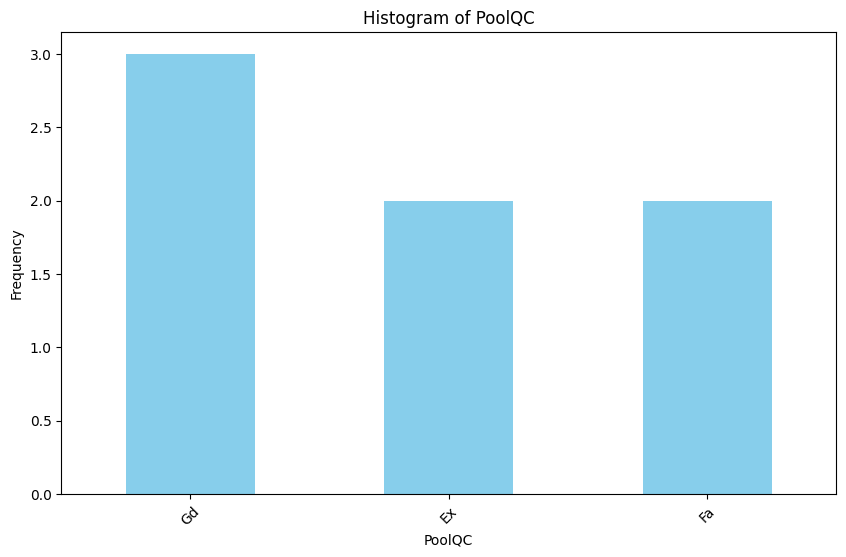

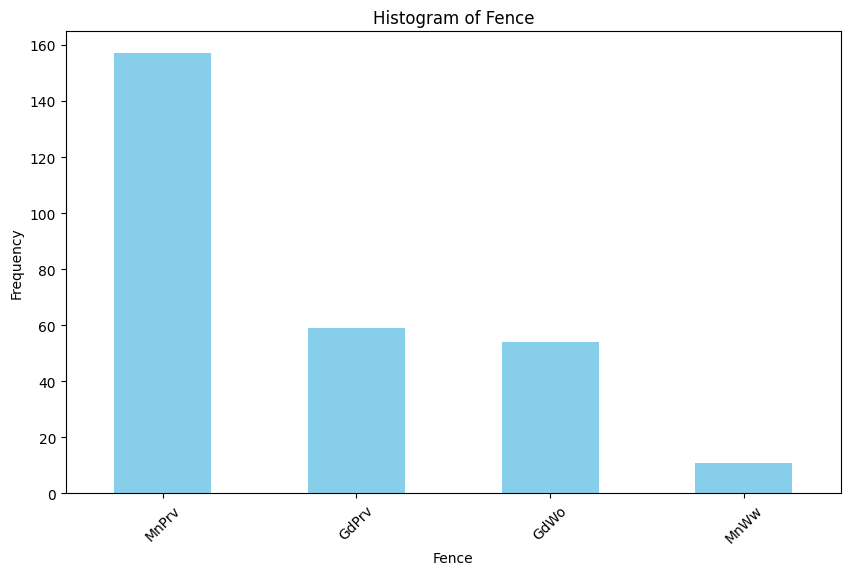

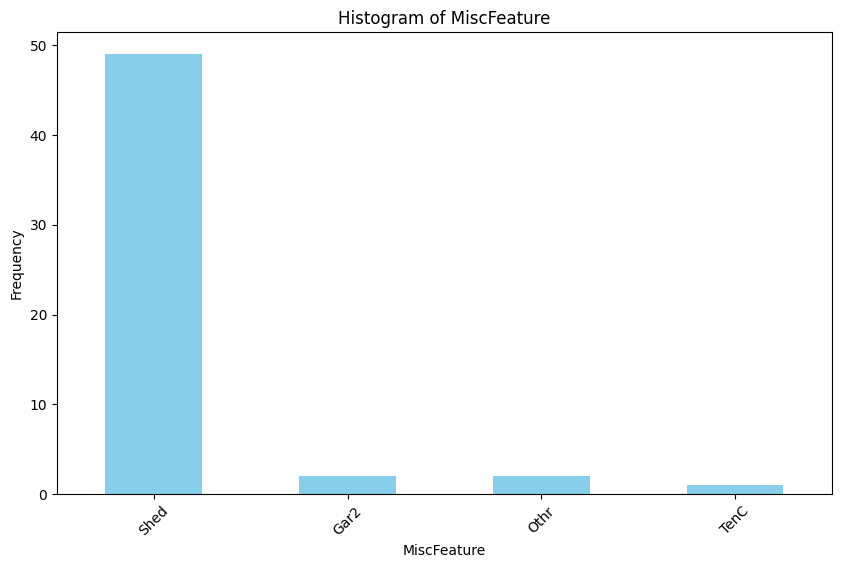

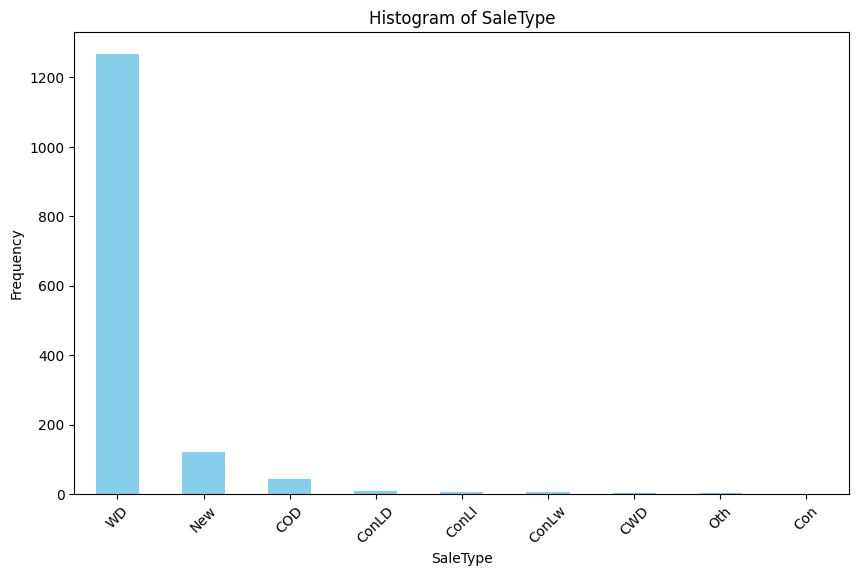

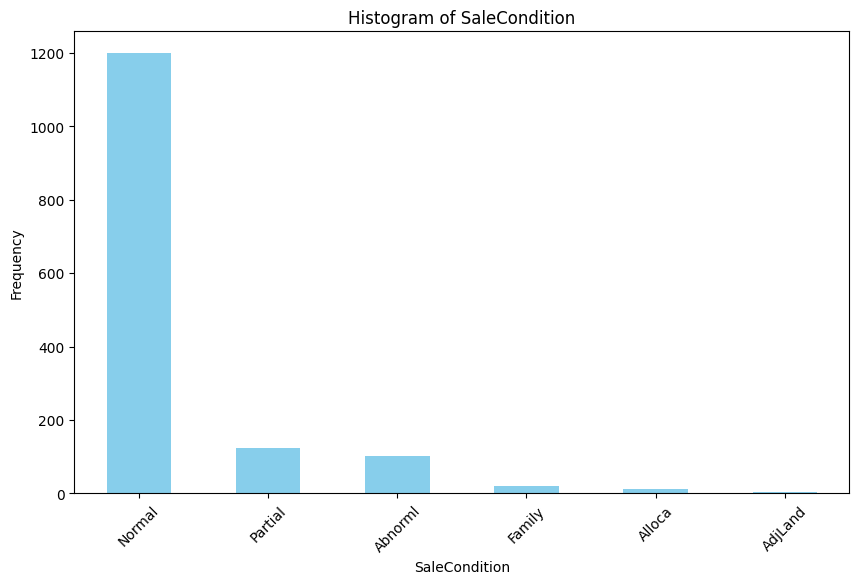

In [8]:
# Plotting histograms for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Model 1 : Simple Linear Regression .




# Method A)    Mean Square Error Optimization Method

#### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{2m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})^2$$

where

$$h_w(x) = w^Tx$$

The MSE measures how much the average model predictions vary from the correct values. The number is higher when the model is performing "bad" on the training set.


#### Gradient
The gradient of MSE/J(W) is given by:


$$MSE' = J'(W) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) * x^{(i)}$$

In [10]:
import numpy as np

def mse(y_true, y_pred):
    square_error = (y_pred - y_true) ** 2
    return np.mean(square_error)

class LinearRegression:
    def __init__(self, num_features):
        self.W = np.zeros(num_features)

    def gradient_step(self, X, y, lr):
        y_pred = self.predict(X)
        grad_w = ((y_pred - y).T @ X) / len(X)# Derivative of loss function wrt w

        # Update weights without regularization
        self.W -= lr * grad_w # lr is the learning rate

    def fit(self, X, y, num_iters=10, learning_rate=0.01):
        loss_history = []

        for iter in range(num_iters):
            y_pred = self.predict(X)
            loss = mse(y, y_pred)
            loss_history.append(loss)
            # Perform a gradient step
            self.gradient_step(X, y, learning_rate)

        return loss_history

    def predict(self, X):
        assert X.shape[-1] == self.W.shape[0], "X and W don't have compatible dimensions"
        return X @ self.W  # Predict using the dot product of X and W


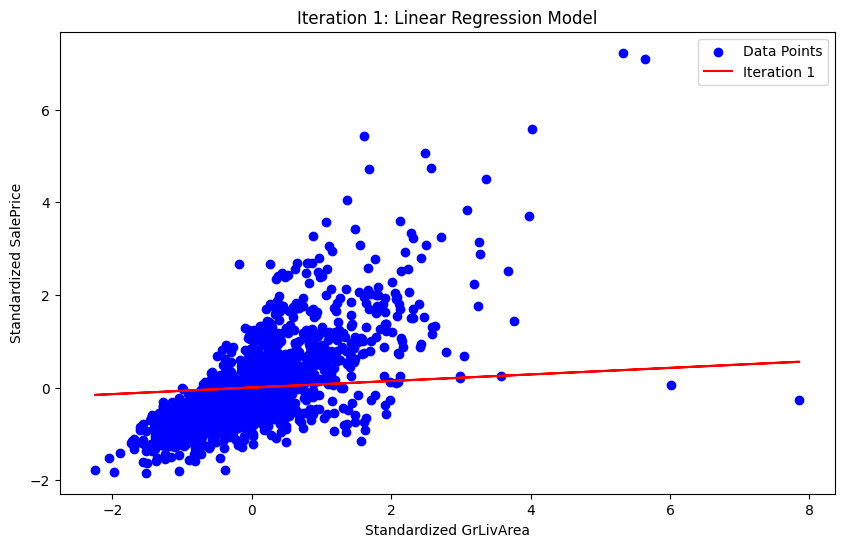

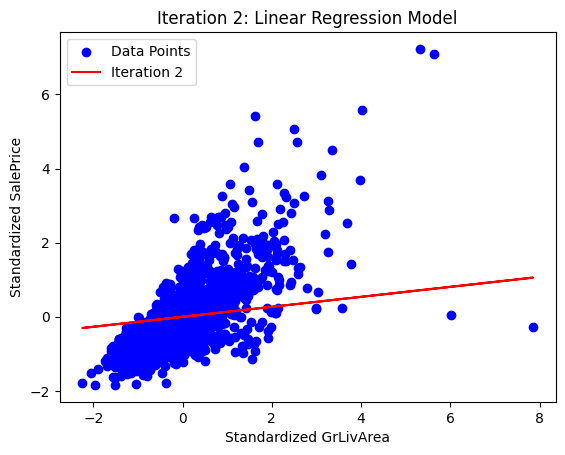

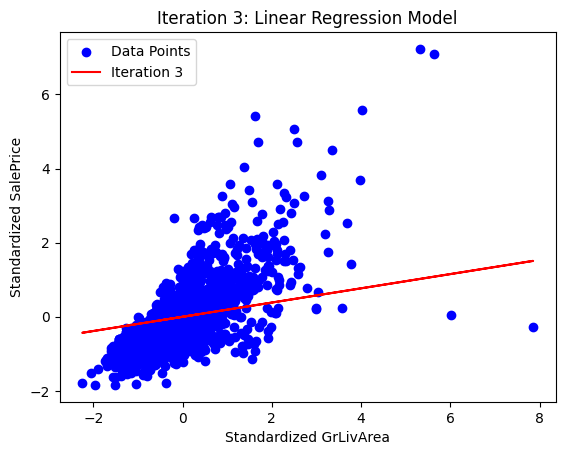

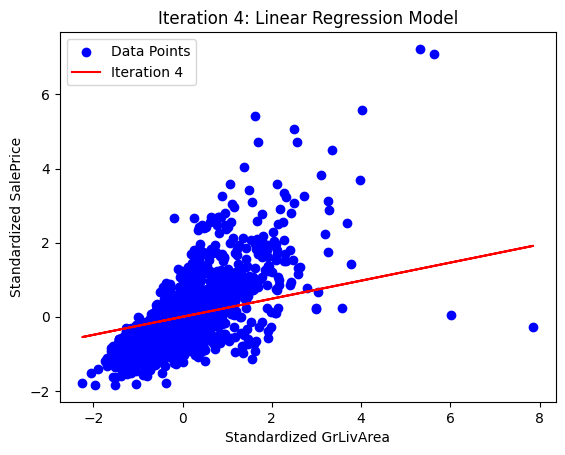

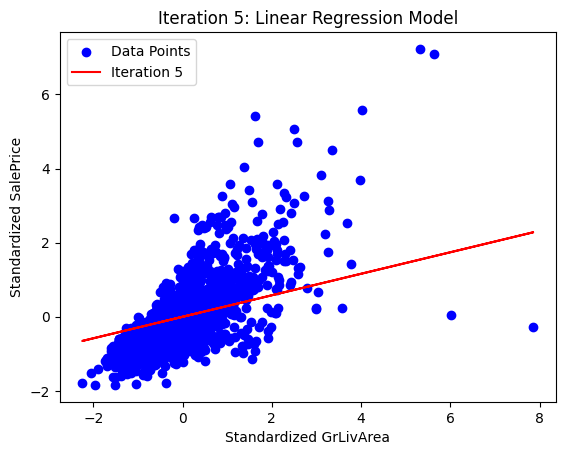

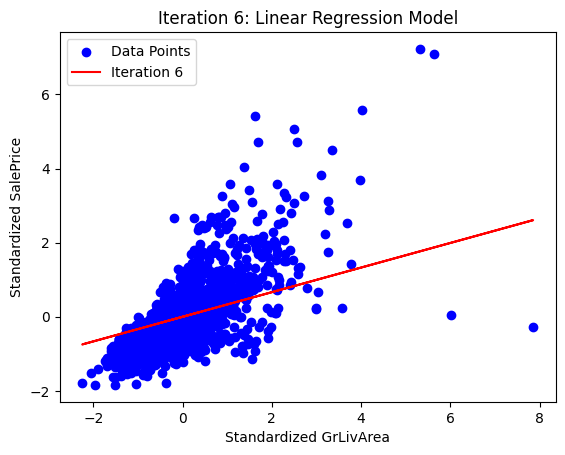

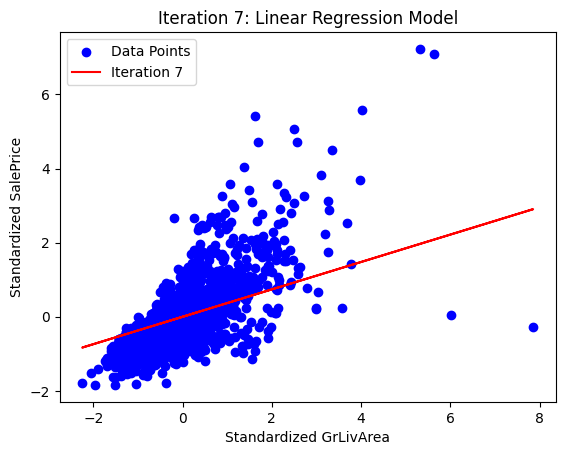

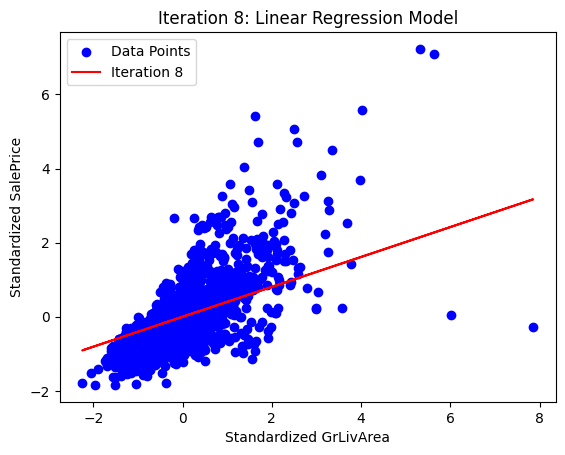

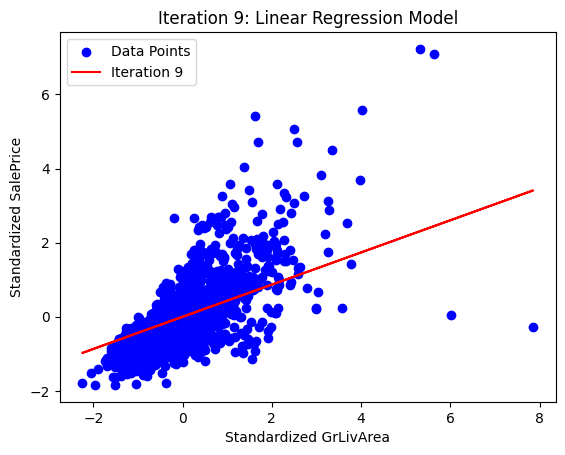

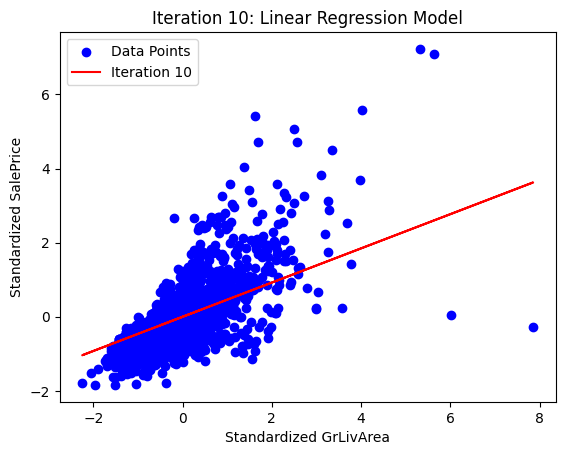

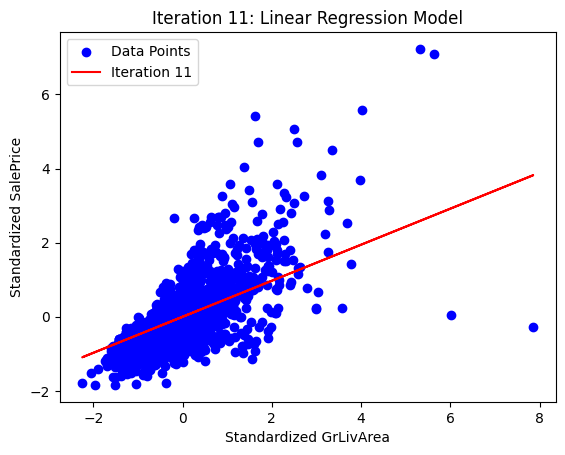

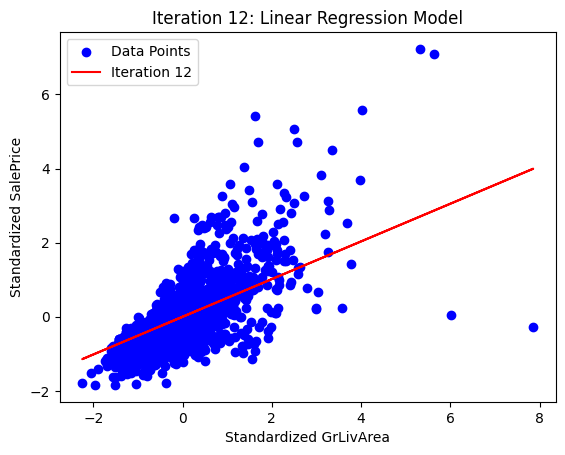

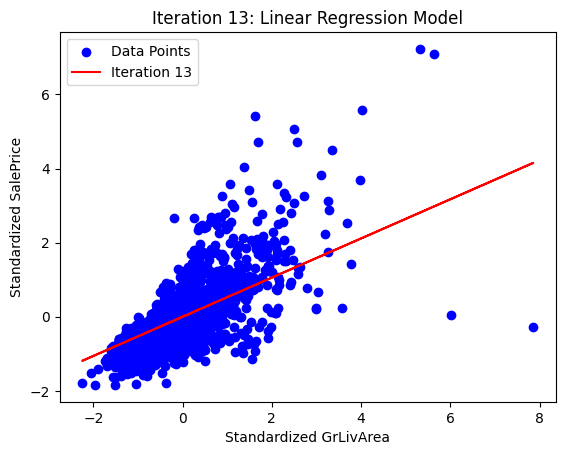

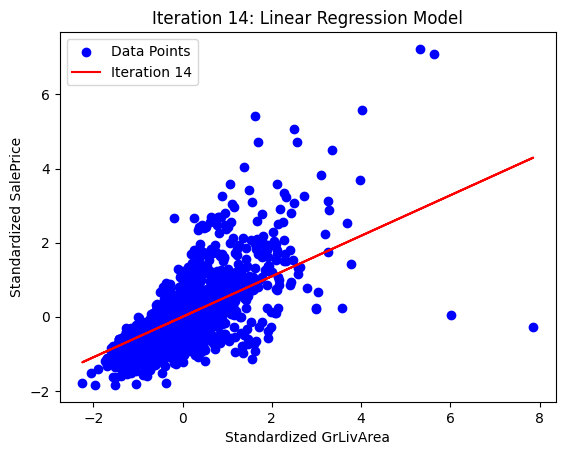

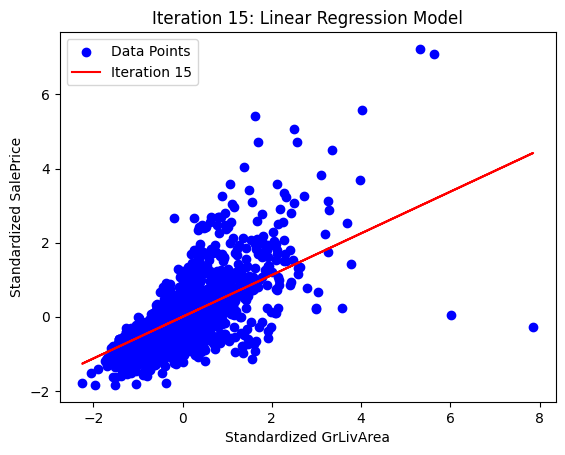

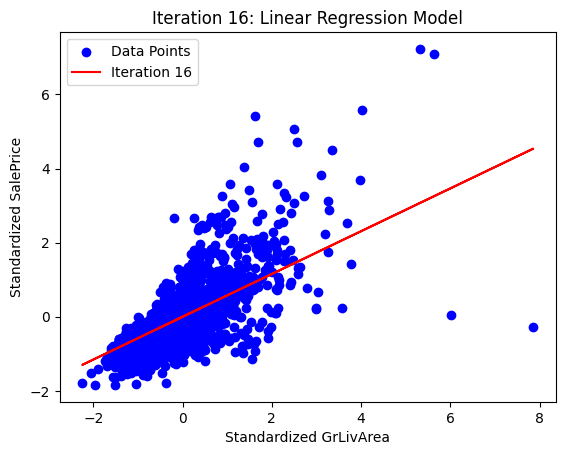

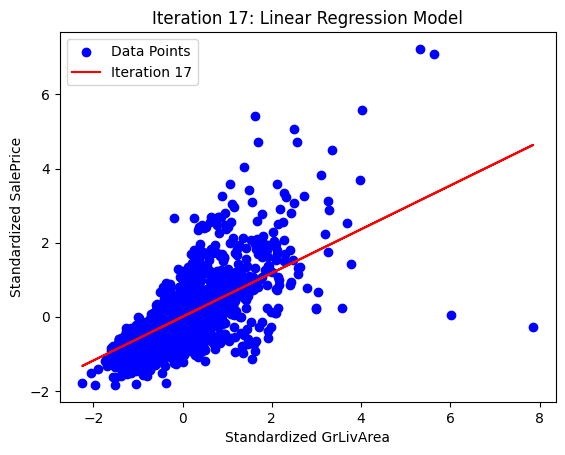

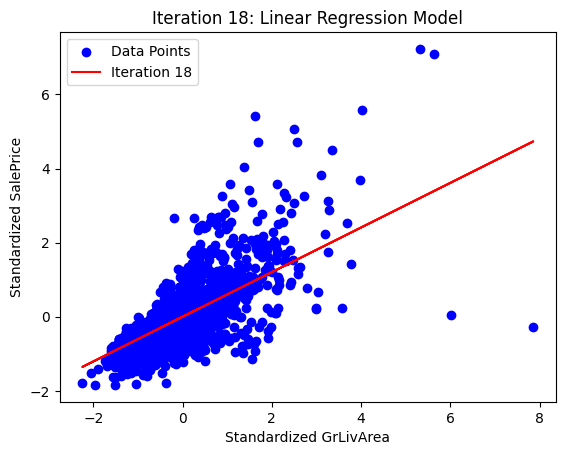

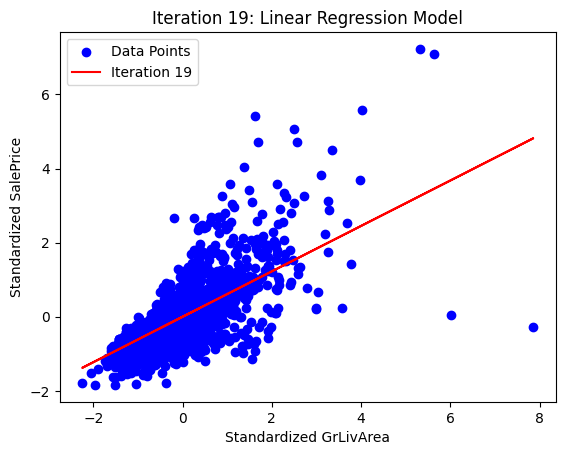

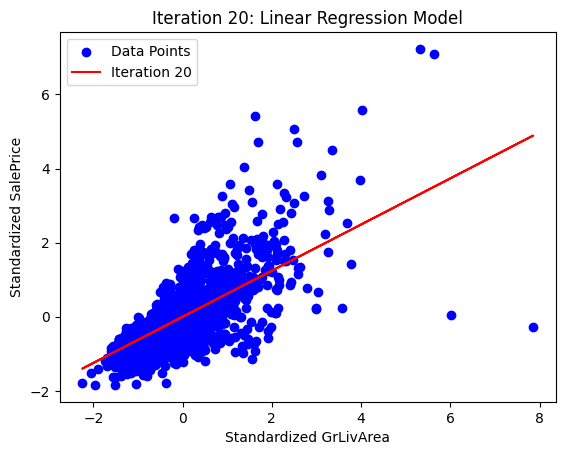

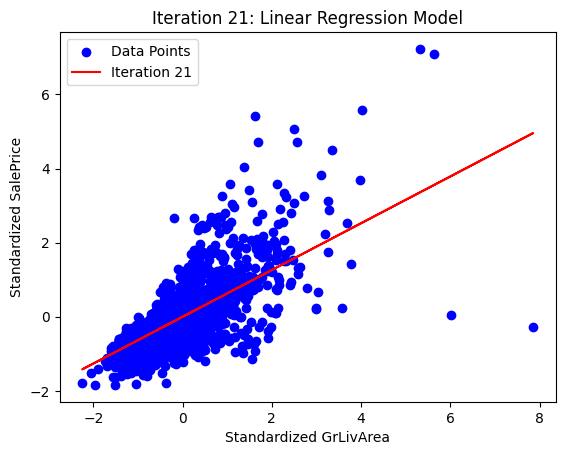

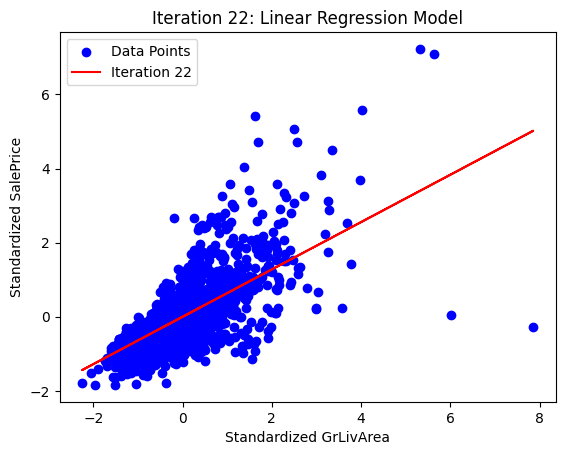

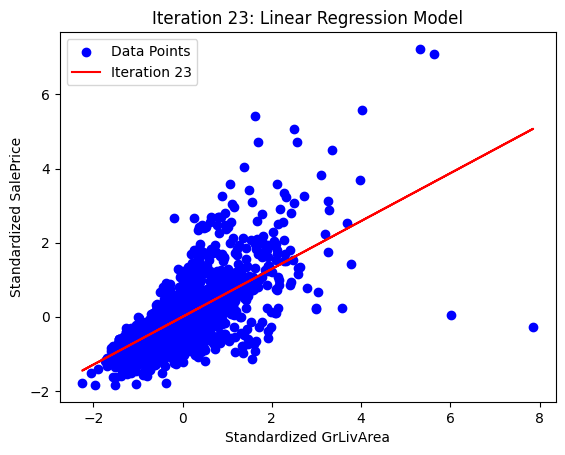

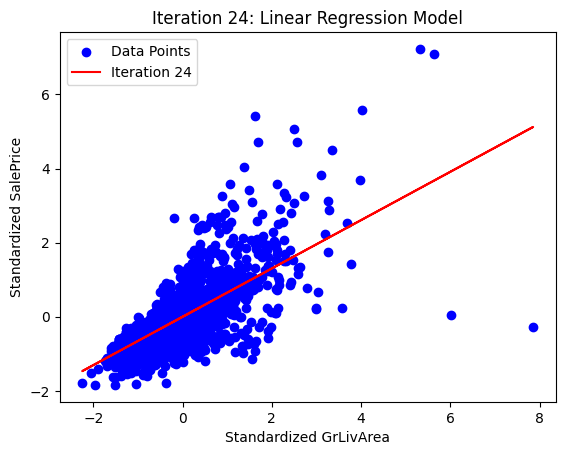

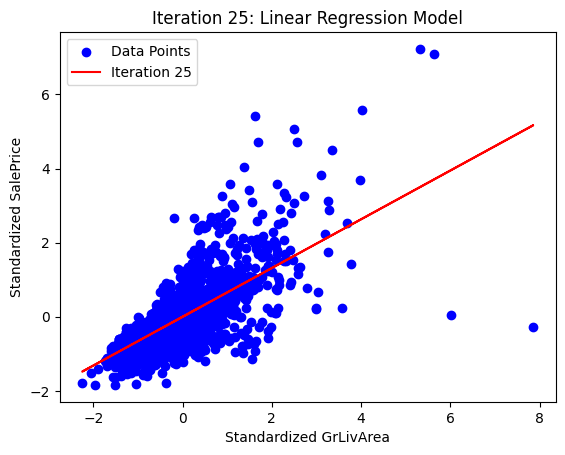

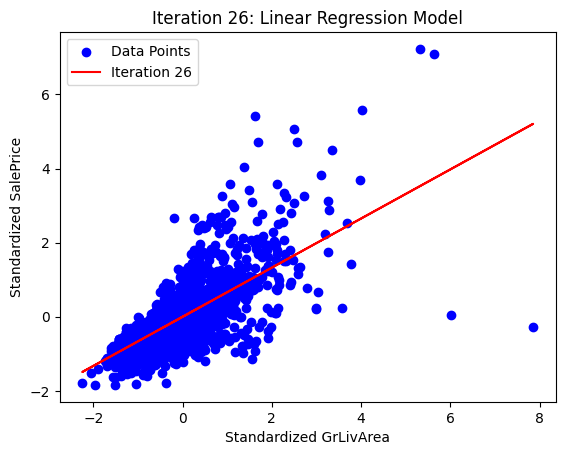

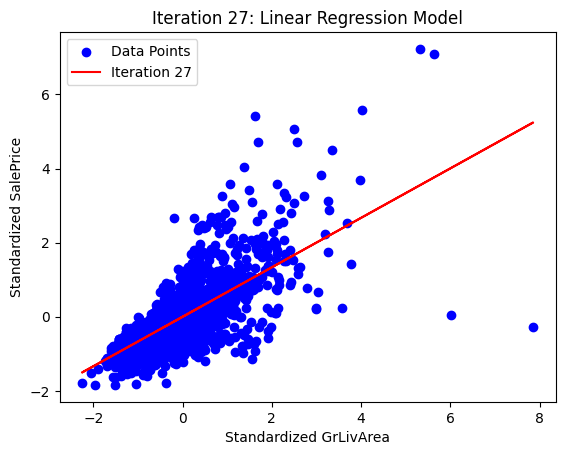

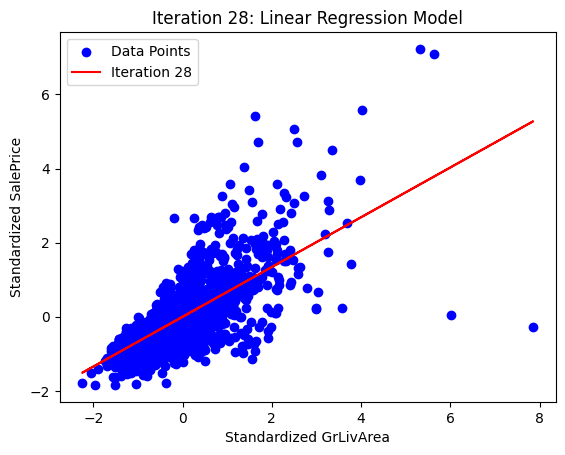

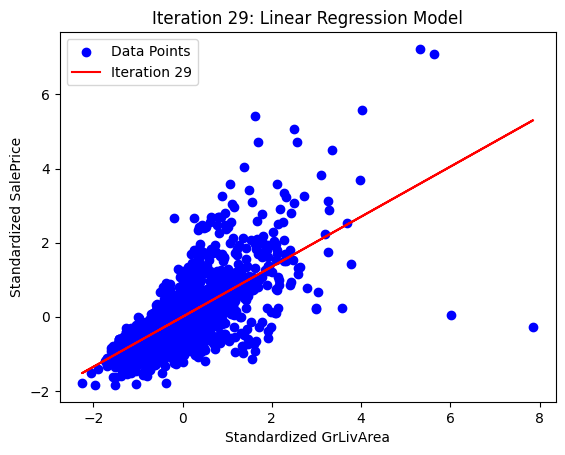

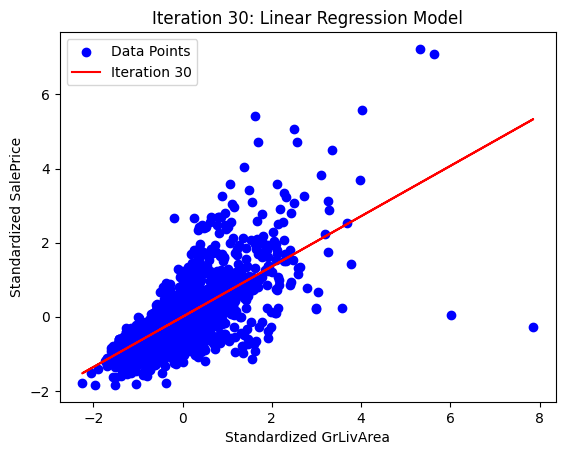

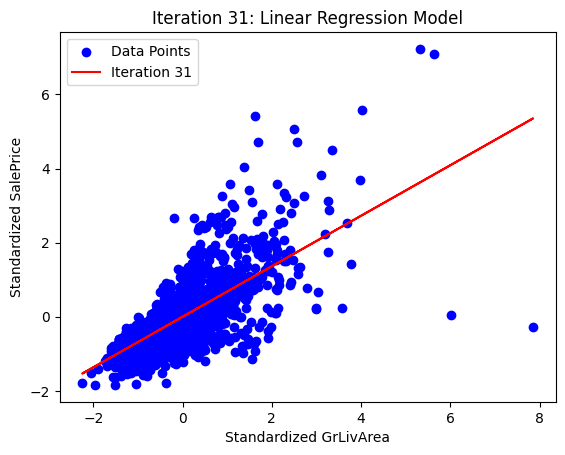

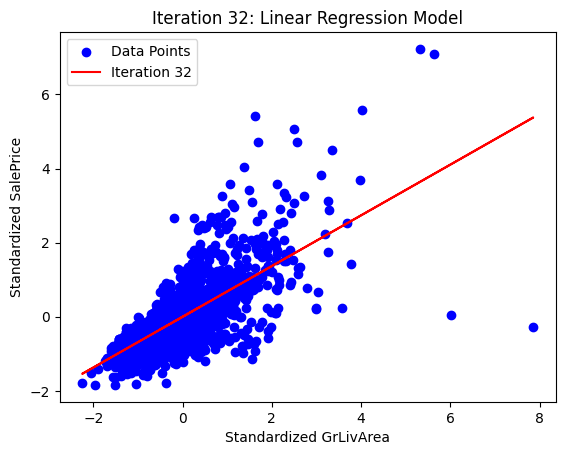

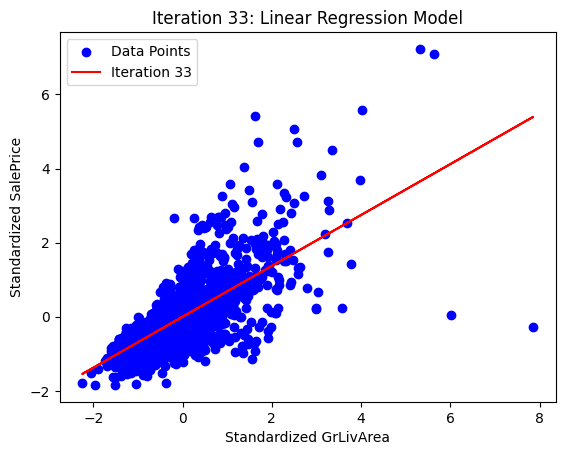

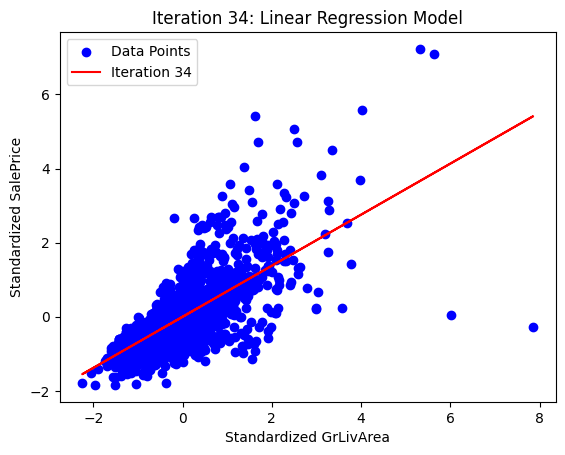

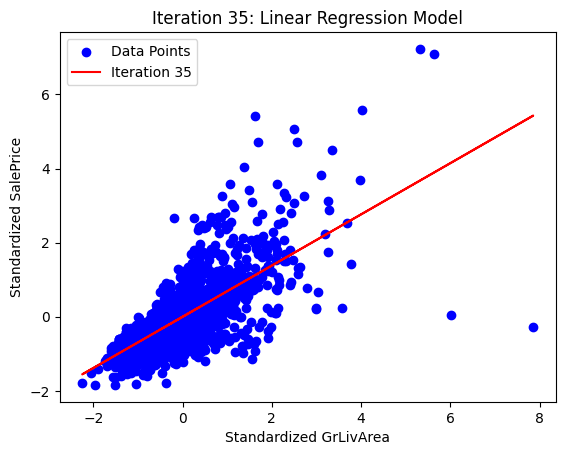

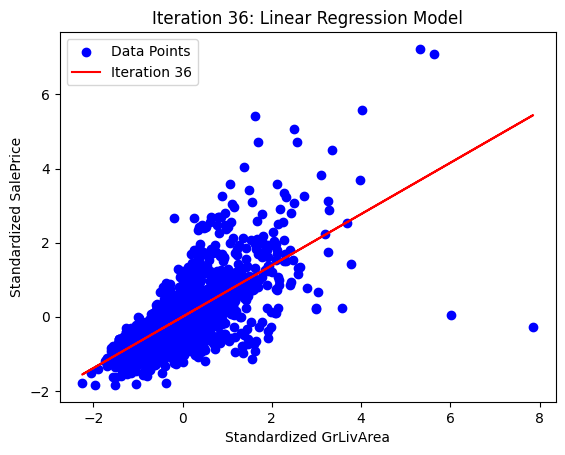

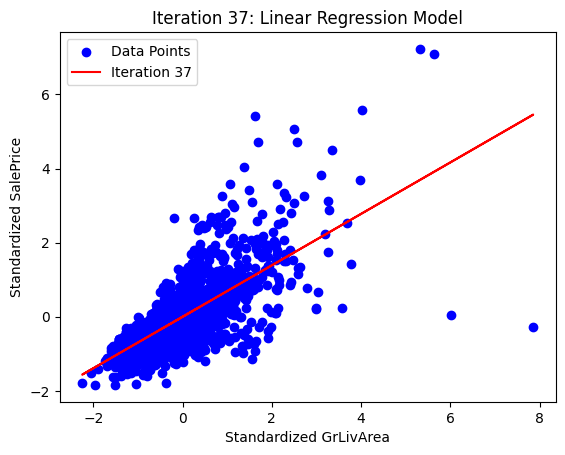

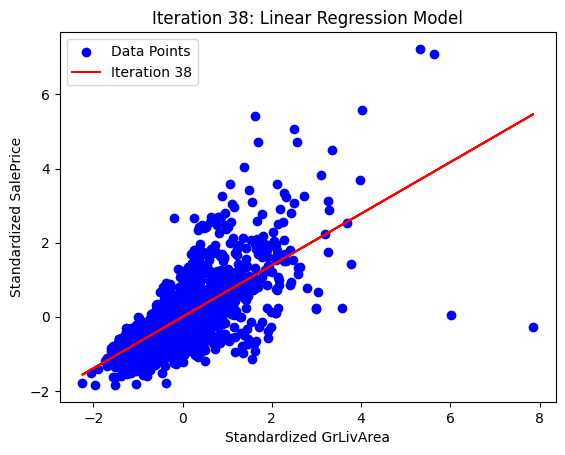

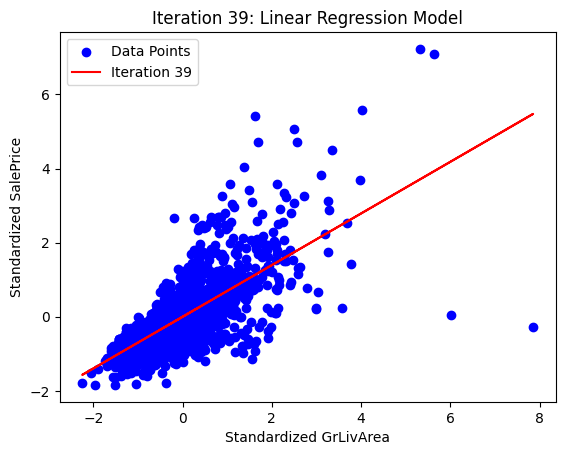

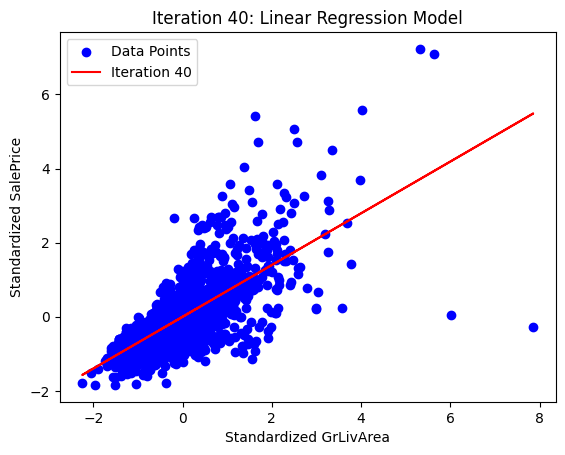

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Extract features and target
X = df[['GrLivArea']].values
y = df['SalePrice'].values

# Compute mean and standard deviation for X and y
mean_X = np.mean(X)
std_X = np.std(X)
mean_y = np.mean(y)
std_y = np.std(y)

# Standardize X and y manually
X_scaled = (X - mean_X) / std_X
y_scaled = (y - mean_y) / std_y

# Add a bias term (intercept) to X
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize the model
model = LinearRegression(num_features=X_scaled.shape[1])

# Number of iterations
num_iters = 40
learning_rate = 0.1

# Set up the plot
plt.figure(figsize=(10, 6))

# Training loop with plot update
for iter in range(num_iters):
    # Train the model for one iteration
    model.gradient_step(X_scaled, y_scaled, lr=learning_rate)

    # Make predictions
    y_pred_scaled = model.predict(X_scaled)

    # Scatter plot of actual data points
    plt.scatter(X_scaled[:, 1], y_scaled, color='blue', label='Data Points')

    # Line plot of the linear regression model
    plt.plot(X_scaled[:, 1], y_pred_scaled, color='red', label=f'Iteration {iter+1}')

    # Adding labels and title
    plt.xlabel('Standardized GrLivArea')
    plt.ylabel('Standardized SalePrice')
    plt.title(f'Iteration {iter+1}: Linear Regression Model')
    plt.legend()

    # Pause to update the plot
    plt.pause(0.1)

plt.show()


In [12]:
print("The Mean Square Error is : ", mse(y_scaled,y_pred_scaled))

The Mean Square Error is :  0.4979610564037549


In [13]:
print(model.W)

[2.11531705e-16 6.98150382e-01]


so trained Simple Linear Regeression model become : -  

# y = 6.98150382e-01 * x + 2.11531705e-16

# MSE = 0.49796(Training Loss)

# Method B) Closed form solution.

Gradient descent gives one possible mean for minimizing $J$, which uses iterative approach and may take time.  In the situation where we know that our cost function is strictly concave or convex, we can explicitly take its derivative to zero.  This process of such derivation is called obtaining the **normal equations** or **closed form**.

The **closed form** of linear regression can be derived easily.  Let $\mathbf{X}$ be a matrix of shape $(m, n)$, $\boldsymbol{\theta}$ as shape $(n, )$, and $\mathbf{y}$ as vector of shape $(m, )$.  Instead of writing the cost function as power of square, we shall write it in matrix multiplication as follows:

$$\frac{\partial J}{\partial \boldsymbol{\theta}} (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T*(\mathbf{X}\boldsymbol{\theta}-\mathbf{y})$$

Recall the following properties:

$$\frac{\partial J}{\partial \mathbf{X}} \mathbf{X}^T\mathbf{X}=2\mathbf{X} \tag{A}$$
$$\frac{\partial J}{\partial \mathbf{X}} \mathbf{A}\mathbf{X}=\mathbf{A}^T$$
$$(\mathbf{X}\mathbf{y})^T = \mathbf{y}^T\mathbf{X}^T$$

Therefore

\begin{align*}
\frac{\partial J}{\partial \boldsymbol{\theta}} (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T*(\mathbf{X}\boldsymbol{\theta}-\mathbf{y}) &= \frac{\partial J}{\partial \boldsymbol{\theta}} (\boldsymbol{\theta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\theta} - \boldsymbol{\theta}^T\mathbf{X}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\theta} + \mathbf{y}^T\mathbf{y})\\
&= 2\mathbf{X}^T\mathbf{X}\boldsymbol{\theta} - 2\mathbf{X}^T\mathbf{y} \tag{see note*}\\
\end{align*}

Now, we can set the derivative to 0 to find out the optimal theta

$$\mathbf{X}^T\mathbf{X}\boldsymbol{\theta} - \mathbf{X}^T\mathbf{y} = 0$$

Solving this gives us

$$\boldsymbol{\theta} =  (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$


Note*: Since $\mathbf{X}\boldsymbol{\theta}$ is a vector, and so is $\mathbf{y}$, it doesn't matter what the order is, thus we can simply add them to 2.  Also, we got 2 in front of the first part because we have two $\theta$ (used the property A)


**Why not closed form always**.  The answer is simple.  It does not always exists or possible, for example, the cost function is not convex or concave.  But of course, if it exists, we usually prefer closed form given that it is usually faster than gradient descent.  Nevertheless, as you can see, taking inverse of huge number of features can be expensive, thus it is also not always straightforward thing to always prefer closed form.

Yes, that's it for most of the theoretical stuff.  Let's start implementing some of these concepts so we can better understand them.

The closed form is a normal equations derived from setting the derivatives = 0.  By performing only some inverse operations and matrix multiplication, we will be able to get the theta.

$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

When closed form is available, is doable (can be inversed - can use pseudoinverse), and with not many features (i.e., inverse can be slow), it is recommended to always use closed form.  

## Implementation steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Plug everything into the equation.  Here we shall use X_train to retrieve the $\boldsymbol{\theta}$
$$\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

1. We simply using the $\boldsymbol{\theta}$, we can perform a dot product with our X_test which will give us $\mathbf{\hat{y}}$.

2. We then calculate the errors using mean-squared-error function:

$$\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

Note that it's a bit different from our $J(\boldsymbol{\theta})$ because $J(\boldsymbol{\theta})$ puts $\frac{1}{2}$ instead of $\frac{1}{m}$ for mathematical convenience for derivatives, since we know changing constants do not change the optimization results.


Let's implement.

In [14]:
from numpy.linalg import inv

class LinearRegression2:
    def __init__(self, num_features):
        self.W = np.zeros(num_features)

    def fit(self, X, y):
        self.W = inv(X.T @ X) @ X.T @ y
        return self.W

    def predict(self, X):
        y_pred = X @ self.W
        return y_pred

    def eval(self, y_true, y_pred):
        assert y_true.shape == y_pred.shape
        mse = ((y_true - y_pred)**2).sum() / len(y_true)
        print("Mean squared errors: ", mse)

In [15]:
# Loading the data :
X = df[['GrLivArea']].values
y = df['SalePrice'].values

# Compute mean and standard deviation for X and y
mean_X = np.mean(X)
std_X = np.std(X)
mean_y = np.mean(y)
std_y = np.std(y)

# Standardize X and y manually
X_scaled = (X - mean_X) / std_X
y_scaled = (y - mean_y) / std_y

# Add a bias term (intercept) to X
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

In [16]:
# Initialize the model with the number of features
model2 = LinearRegression2(num_features=X_scaled.shape[1])

# Fit the model
model2.fit(X_scaled, y_scaled)

# Make predictions
y_scaled_pred = model2.predict(X_scaled)

# Evaluate the model
model2.eval(y_scaled, y_scaled_pred)

Mean squared errors:  0.49785134972819567


In [17]:
# And the weights are :
print(model2.W)

[2.32452946e-16 7.08624478e-01]


so trained Simple Linear Regeression model become : -  

# y = 7.08624478e-01 * x + 2.32452946e-16

# MSE = 0.49785 (Training Loss)

# Method C) : Using Scikit Learn library

In [18]:
# Loading the data :
X = df[['GrLivArea']].values
y = df['SalePrice'].values

# Compute mean and standard deviation for X and y
mean_X = np.mean(X)
std_X = np.std(X)
mean_y = np.mean(y)
std_y = np.std(y)

# Standardize X and y manually
X_scaled = (X - mean_X) / std_X
y_scaled = (y - mean_y) / std_y

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X and y are already defined and preprocessed

# Initialize the Linear Regression model
model3 = LinearRegression()

# Fit the model to the data
model3.fit(X_scaled, y_scaled)

# Make predictions
y_pred = model3.predict(X_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_scaled , y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.49785134972819567


In [21]:
# Print the weights (coefficients) and intercept
print("Weights (coefficients):", model3.coef_)
print("Intercept:", model3.intercept_)

Weights (coefficients): [0.70862448]
Intercept: 2.26796444819906e-16


so trained Simple Linear Regeression model become : -  

# y = 7.0862448e-01 * x + 2.26796444819906e-16

# MSE = 0.49785(Training Loss)

Comparing the 3 methods :    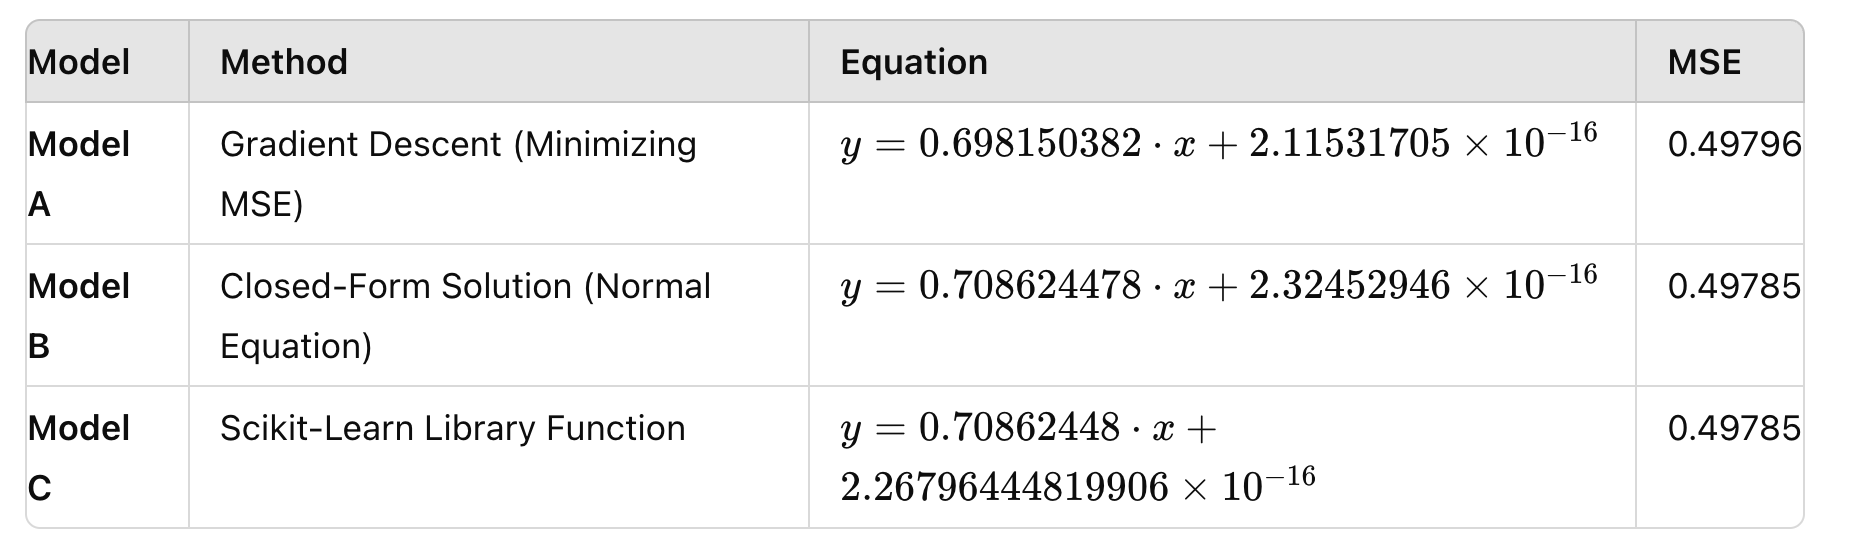



# Model 2: Multiple Linear Regression : -

In [22]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_columns = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Data Preprocessing : -
i)Fill NA values
ii)One hot encoding
iii) Standardization
iv)Train-Test Split

In [23]:
# 1. Fill NA values with the mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# 2. One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(float)

# 3. Standardize the non-categorical columns
non_categorical_data = df_encoded[non_categorical_columns].values
mean_non_cat = np.mean(non_categorical_data, axis=0)
std_non_cat = np.std(non_categorical_data, axis=0)
non_categorical_data_standardized = (non_categorical_data - mean_non_cat) / std_non_cat

# 4. Combine standardized non-categorical data with one-hot encoded categorical data
# Remove the original non-categorical columns from the encoded dataframe
df_encoded = df_encoded.drop(columns=non_categorical_columns)
# Add standardized non-categorical data back to the dataframe
df_encoded[non_categorical_columns] = non_categorical_data_standardized

# 5. Shuffle the dataset
df_encoded = df_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Split the data manually into training (80%) and testing (20%)
train_size = int(0.8 * len(df_encoded))
X_train = df_encoded.drop('SalePrice', axis=1).iloc[:train_size].values
y_train = df_encoded['SalePrice'].iloc[:train_size].values

X_test = df_encoded.drop('SalePrice', axis=1).iloc[train_size:].values
y_test = df_encoded['SalePrice'].iloc[train_size:].values

# 7. Add a bias term (intercept) to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]



In [19]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [20]:
df_encoded

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0             0.0          0.0          1.0          0.0          1.0   
1             0.0          0.0          1.0          0.0          1.0   
2             0.0          0.0          0.0          1.0          1.0   
3             0.0          0.0          0.0          1.0          1.0   
4             0.0          0.0          1.0          0.0          1.0   
...           ...          ...          ...          ...          ...   
1455          0.0          0.0          1.0          0.0          1.0   
1456          0.0          0.0          1.0          0.0          1.0   
1457          0.0          0.0          1.0          0.0          1.0   
1458          0.0          0.0          1.0          0.0          1.0   
1459          0.0          0.0          1.0          0.0          1.0   

      Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            0.0           0.0           0.0           1.0              0.0   
1            0.0           0.0           0.0           0.0              0.0   
2            0.0           0.0           0.0           1.0              0.0   
3            0.0           0.0           0.0           1.0              0.0   
4            0.0           0.0           0.0           0.0              1.0   
...          ...           ...           ...           ...              ...   
1455         0.0           0.0           0.0           0.0              0.0   
1456         0.0           0.0           0.0           1.0              0.0   
1457         0.0           0.0           0.0           1.0              0.0   
1458         0.0           0.0           0.0           1.0              0.0   
1459         0.0           0.0           0.0           1.0              0.0   

      ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0     ...    0.780197    -0.704483      -0.359325  -0.116339    -0.270208   
1     ...    0.732311    -0.221343      -0.359325  -0.116339    -0.270208   
2     ...   -0.752176    -0.704483       1.768397  -0.116339    -0.270208   
3     ...   -0.752176    -0.342128       0.229890  -0.116339    -0.270208   
4     ...    1.067517    -0.704483      -0.359325  -0.116339    -0.270208   
...   ...         ...          ...            ...        ...          ...   
1455  ...   -0.752176    -0.372324      -0.359325  -0.116339    -0.270208   
1456  ...    2.687682    -0.040165      -0.359325  -0.116339    -0.270208   
1457  ...   -0.752176    -0.704483      -0.359325  -0.116339    -0.270208   
1458  ...   -0.752176     2.919070      -0.359325  -0.116339    -0.270208   
1459  ...    0.389123    -0.402520      -0.359325  -0.116339    -0.270208   

      PoolArea   MiscVal    MoSold    YrSold  SalePrice  
0    -0.068692 -0.087688 -1.599111 -1.367655  -0.332697  
1    -0.068692 -0.087688 -0.859110  1.645210   1.814245  
2    -0.068692 -0.087688 -1.229111  1.645210  -0.830082  
3    -0.068692 -0.087688  1.360892 -1.367655  -0.276032  
4    -0.068692 -0.087688  0.990891  0.891994   1.694621  
...        ...       ...       ...       ...        ...  
1455 -0.068692 -0.087688 -1.229111 -0.614439  -0.056528  
1456 -0.068692 -0.087688  2.100892  0.891994  -0.578241  
1457 -0.068692 -0.087688 -0.859110 -1.367655  -0.830082  
1458 -0.068692 -0.087688 -0.119110 -0.614439   0.113691  
1459 -0.068692 -0.087688 -0.119110  0.891994  -0.087152  

[1460 rows x 246 columns]

#Minimizing the MSE :-

In [24]:
import numpy as np

def mse(y_true, y_pred):
    square_error = (y_pred - y_true) ** 2
    return np.mean(square_error)

class LinearRegression:
    def __init__(self, num_features):
        self.W = np.zeros(num_features)

    def gradient_step(self, X, y, lr):
        y_pred = self.predict(X)
        grad_w = ((y_pred - y).T @ X) / len(X)

        # Update weights without regularization
        self.W -= lr * grad_w

    def fit(self, X, y, num_iters=10, learning_rate=0.01):
        loss_history = []

        for iter in range(num_iters):
            y_pred = self.predict(X)
            loss = mse(y, y_pred)
            loss_history.append(loss)
            # Perform a gradient step
            self.gradient_step(X, y, learning_rate)

        return loss_history

    def predict(self, X):
        assert X.shape[-1] == self.W.shape[0], "X and W don't have compatible dimensions"
        return X @ self.W  # Predict using the dot product of X and W


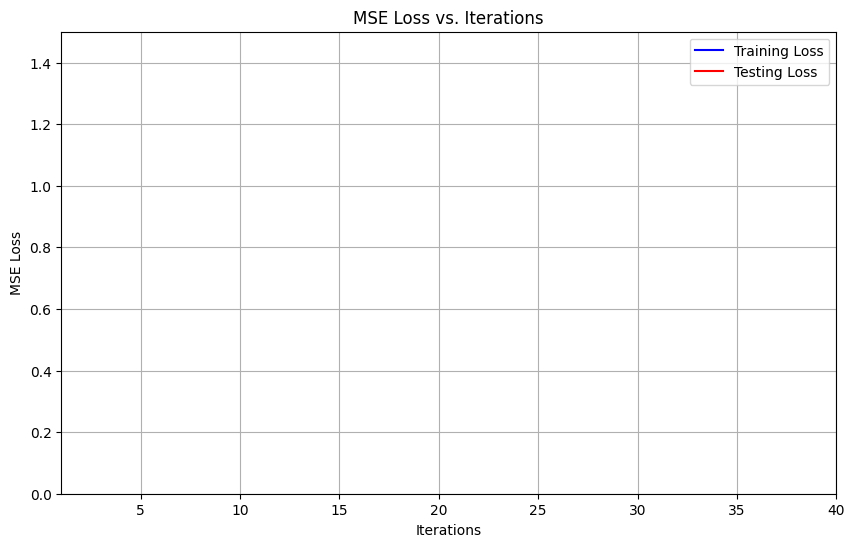

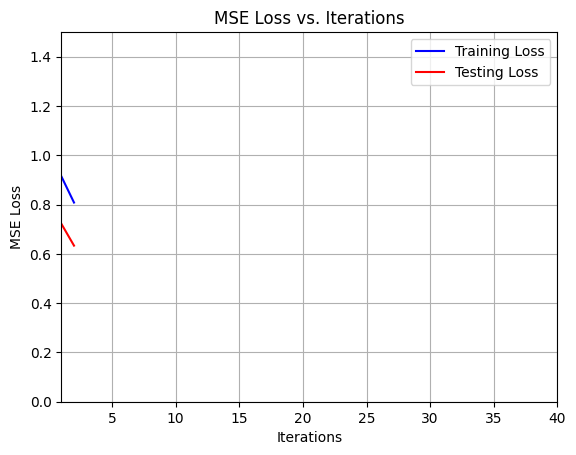

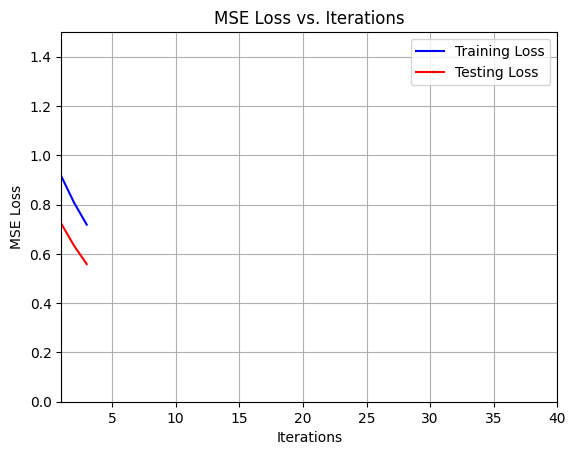

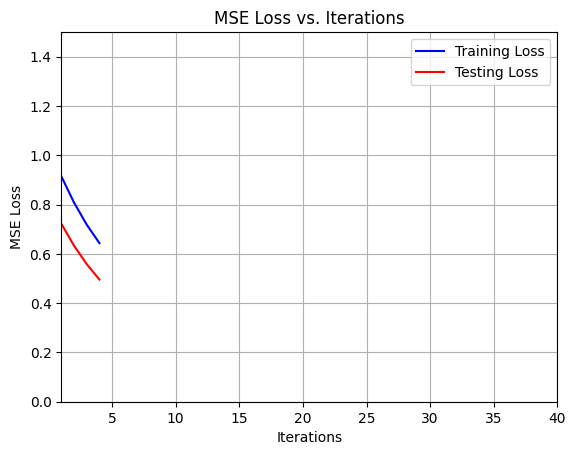

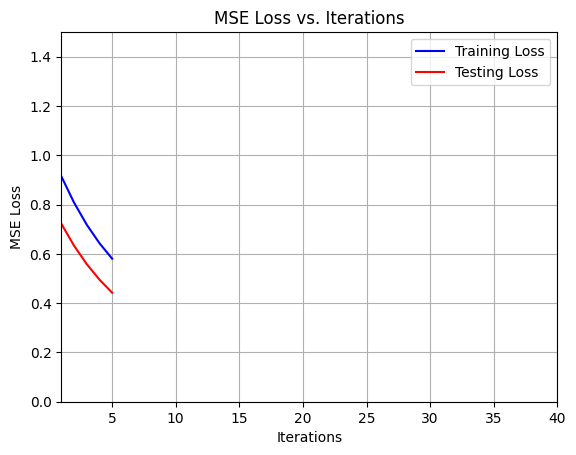

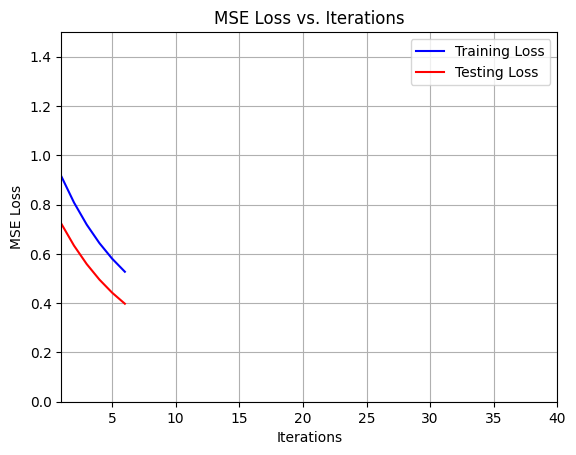

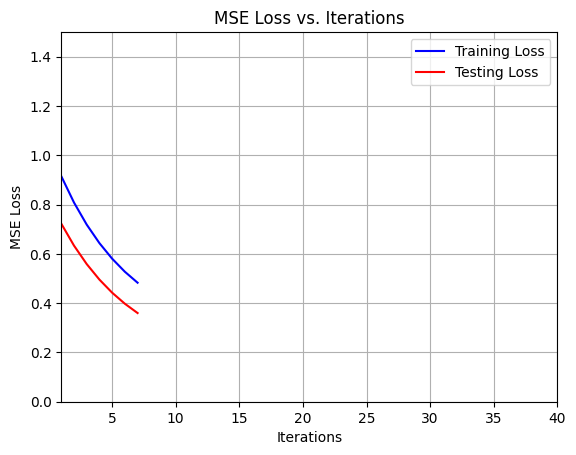

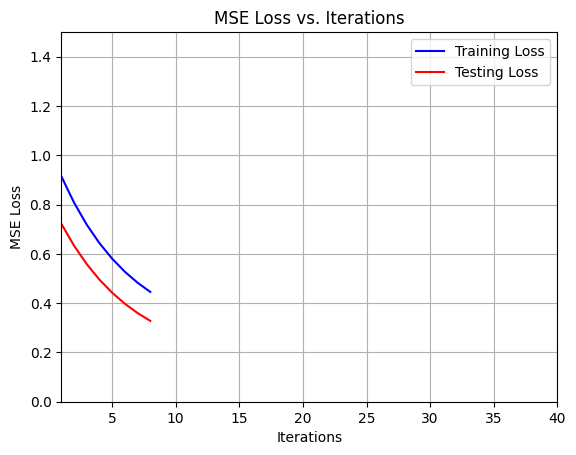

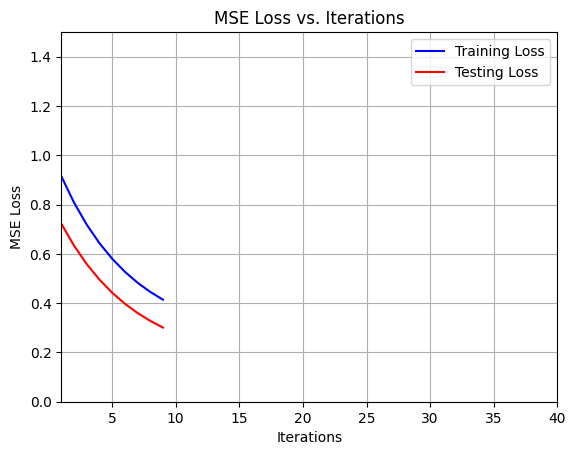

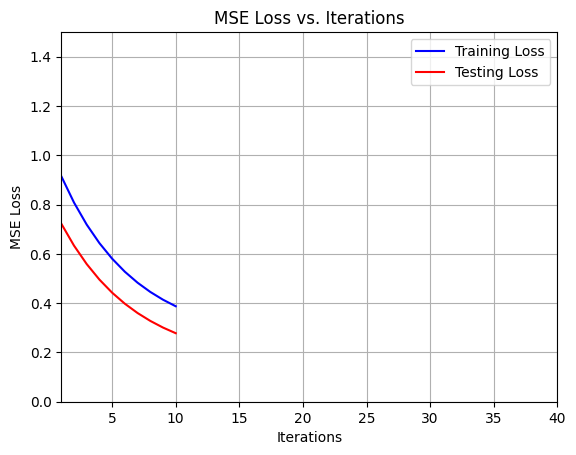

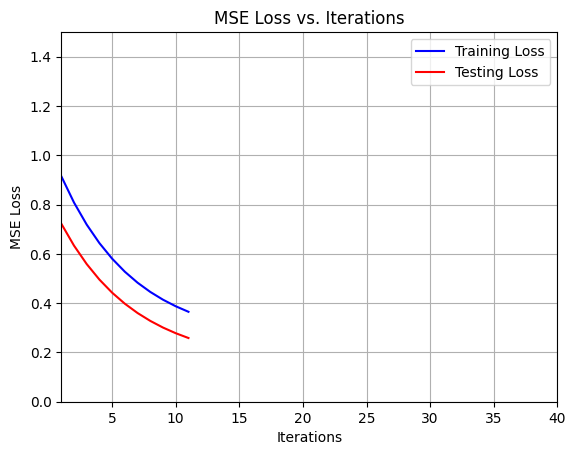

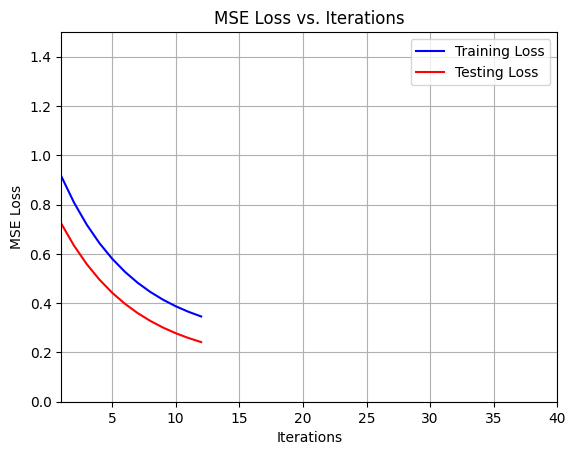

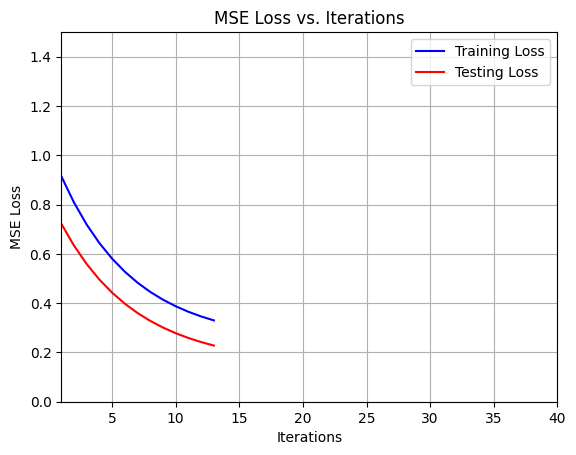

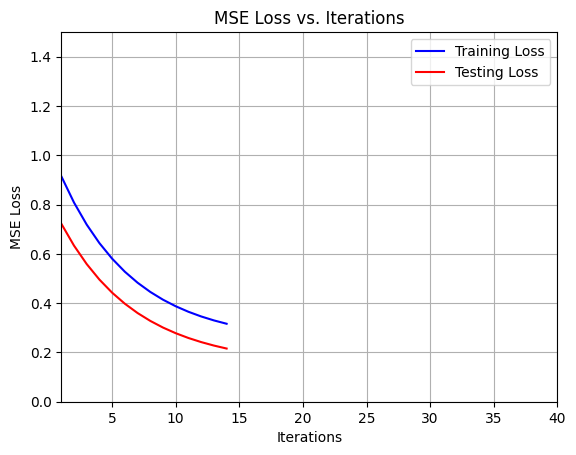

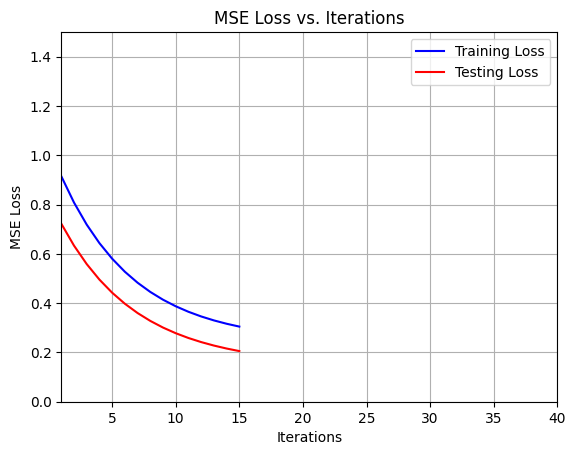

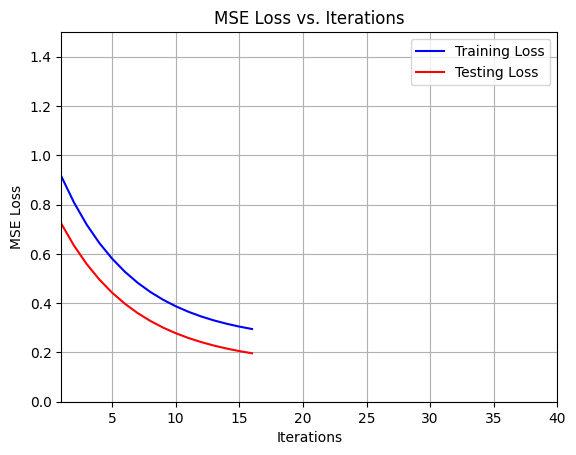

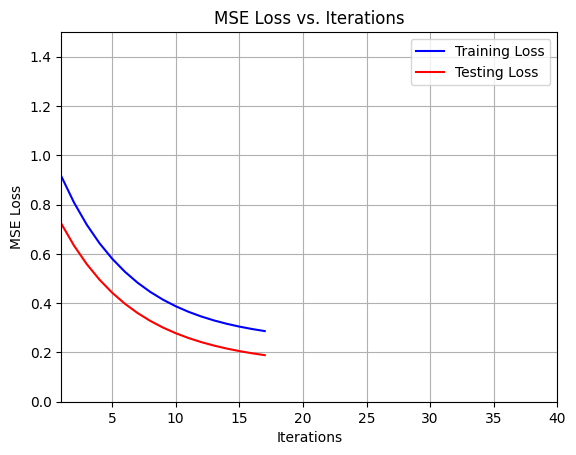

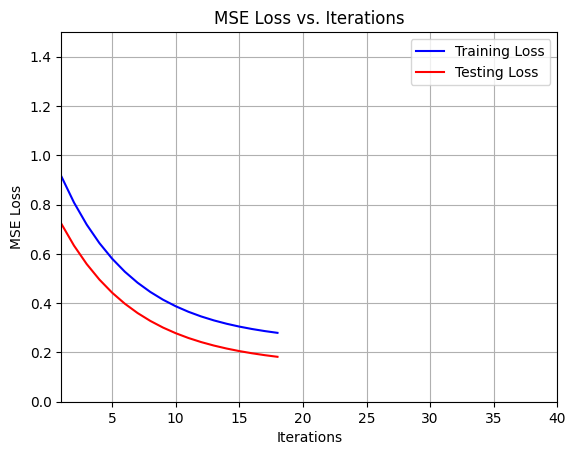

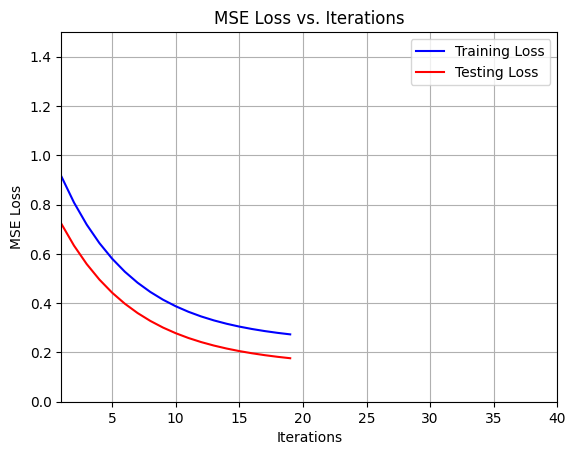

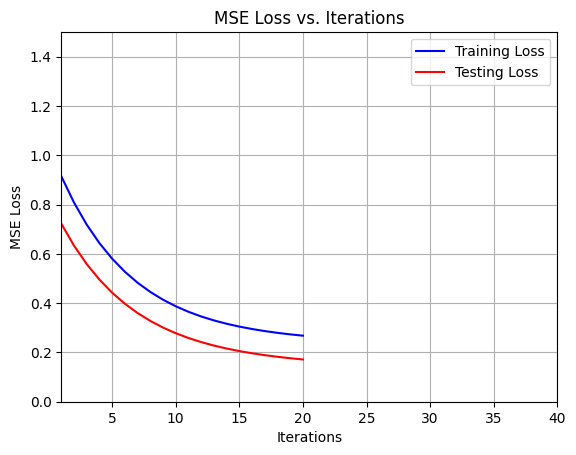

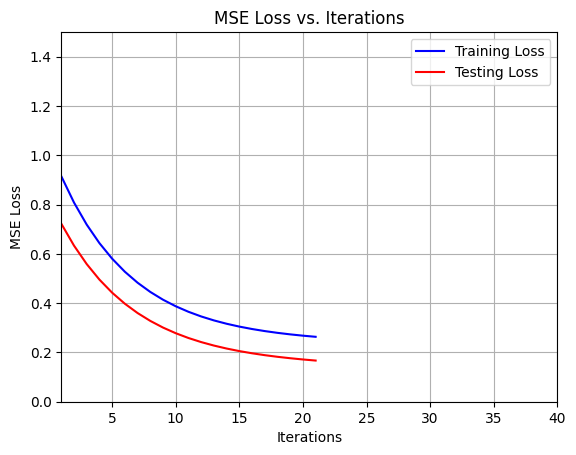

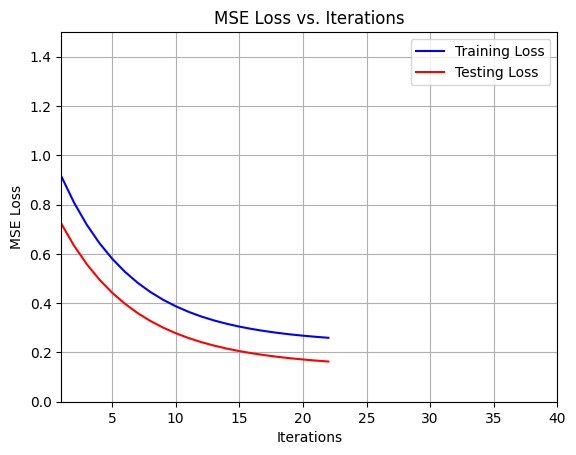

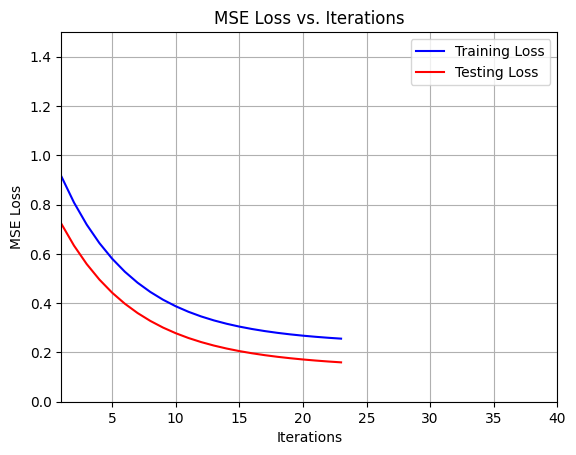

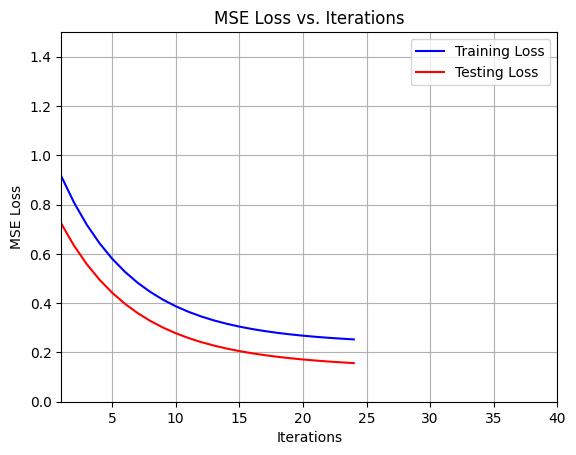

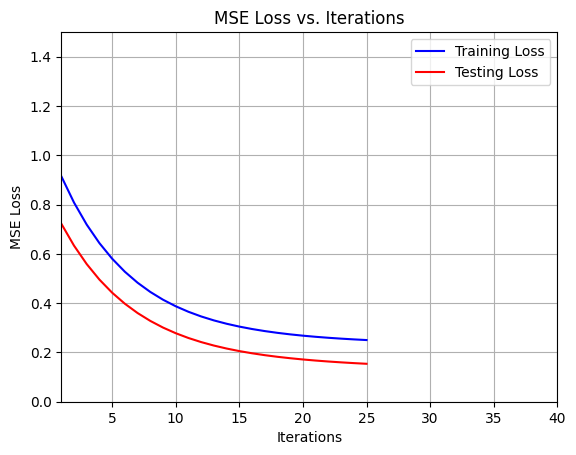

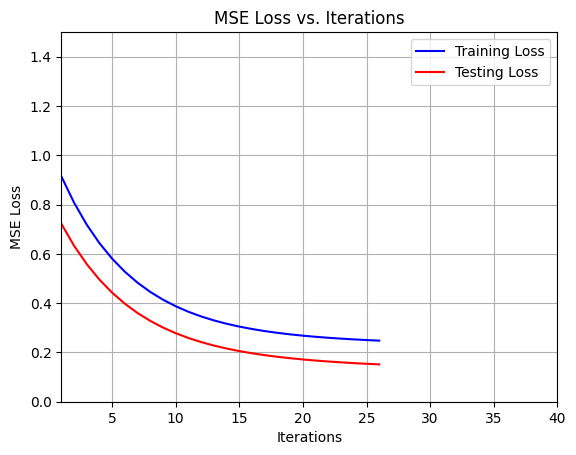

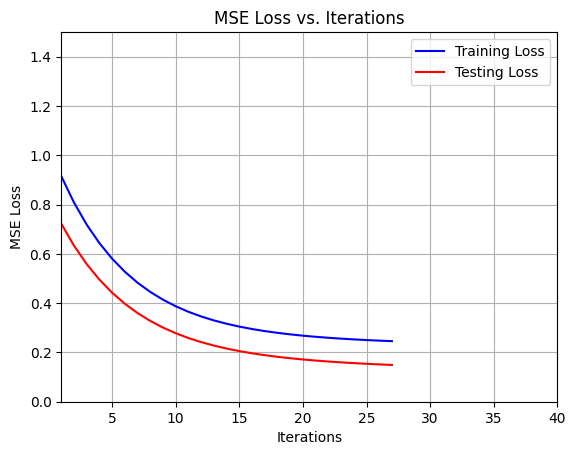

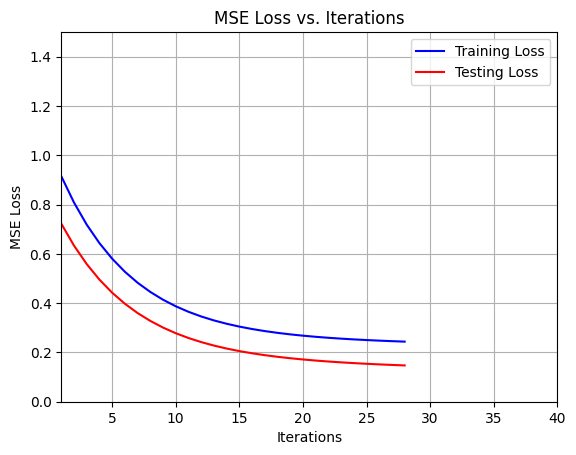

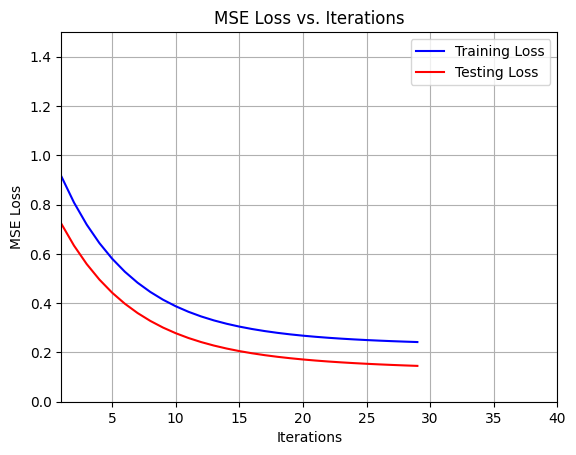

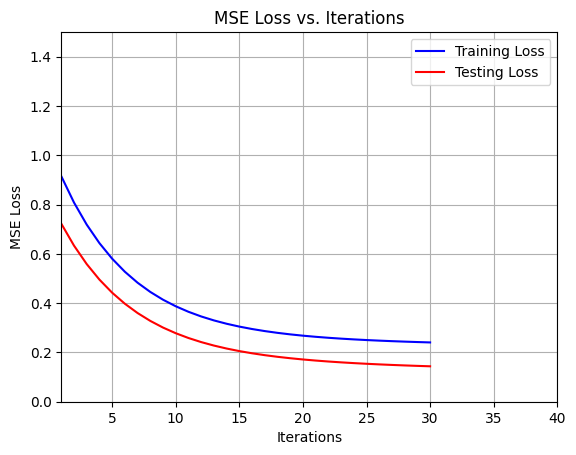

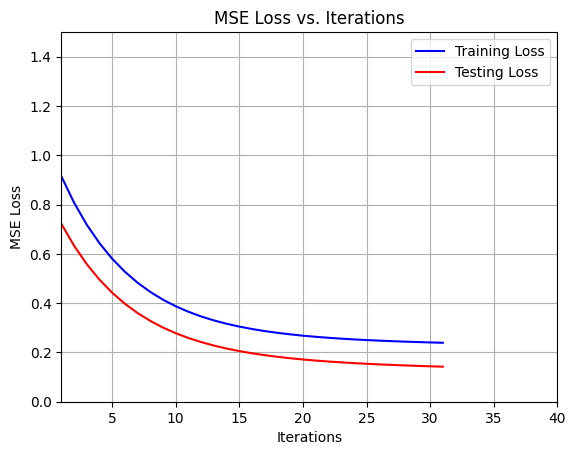

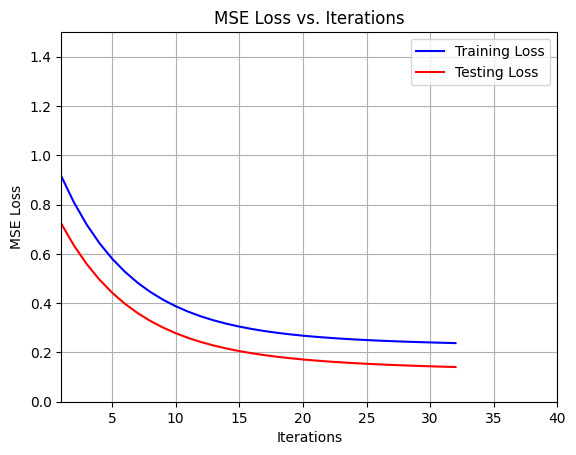

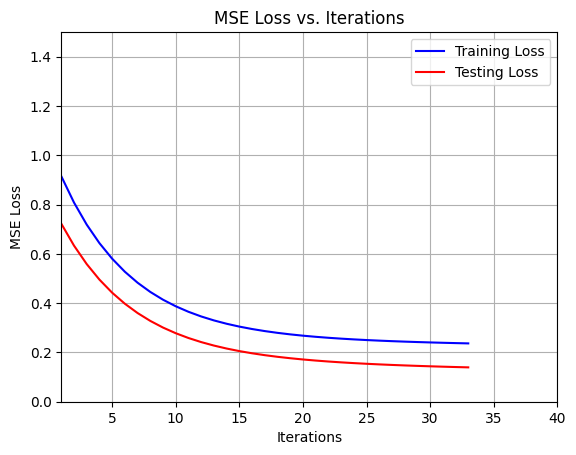

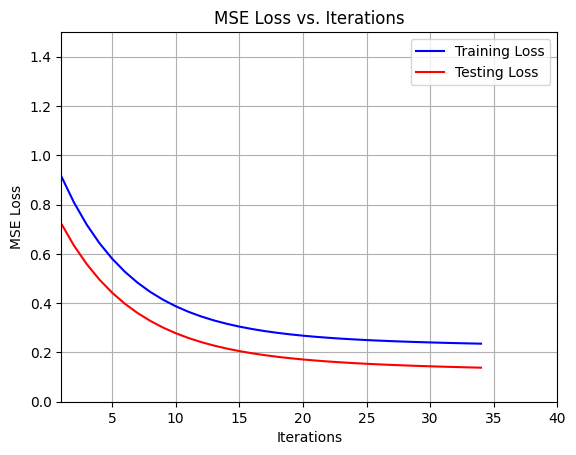

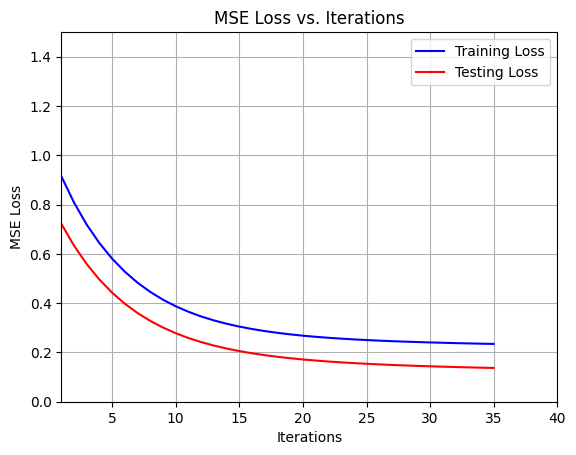

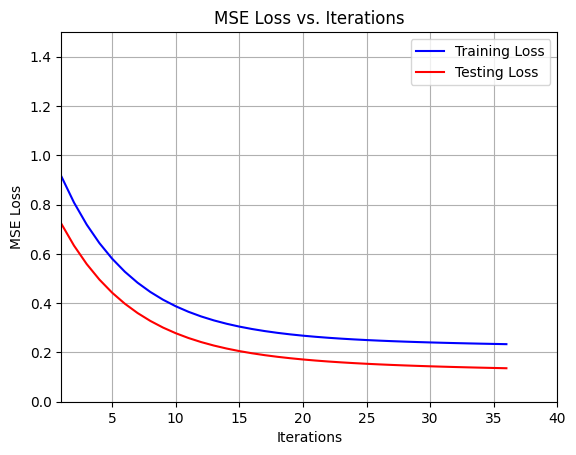

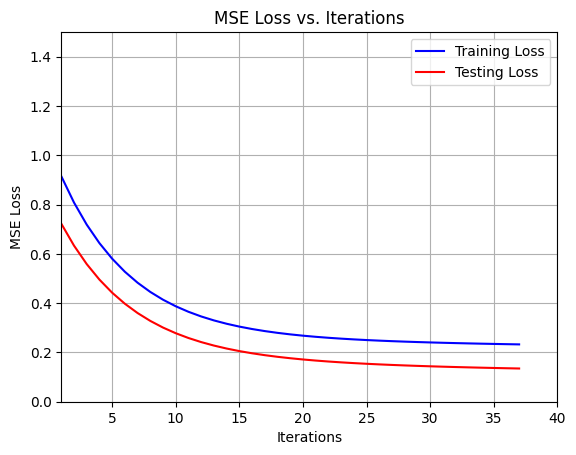

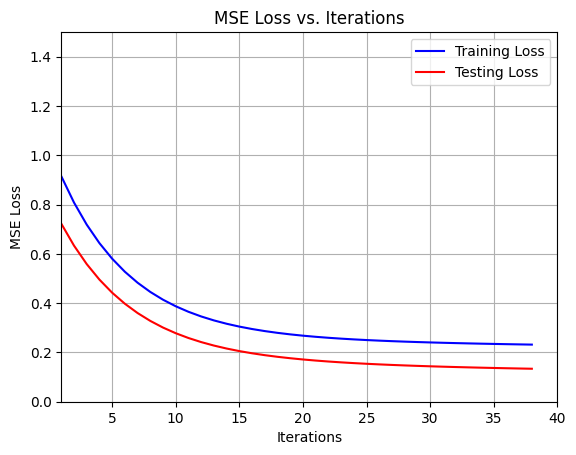

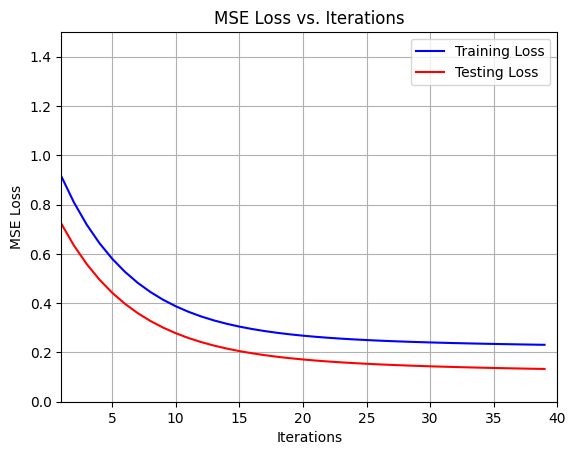

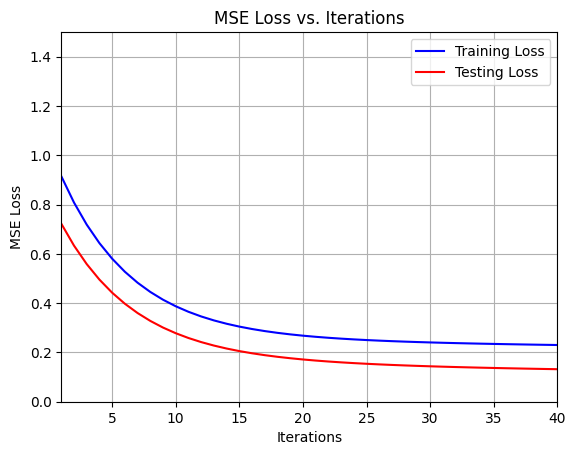

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 10. Train the model and dynamically update the plot
model = LinearRegression(num_features=X_train.shape[1])
num_iters = 40
learning_rate = 0.01

train_loss_history = []
test_loss_history = []

# Set up the plot
plt.figure(figsize=(10, 6))




for i in range(num_iters):
    # Train the model for one iteration
    model.gradient_step(X_train, y_train, lr=learning_rate)

    # Predict on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE loss for both training and testing sets
    train_loss = mse(y_train, y_train_pred)
    test_loss = mse(y_test, y_test_pred)

    # Append the losses to their respective histories
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)

    # Plot the training and testing losses
    plt.plot(range(1, i + 2), train_loss_history, label='Training Loss', color='blue')
    plt.plot(range(1, i + 2), test_loss_history, label='Testing Loss', color='red')
    # Fix the x-axis range
    plt.xlim(1, num_iters)
    plt.ylim(0, 1.5)  # Optional: Set a fixed range for y-axis if needed
    plt.xlabel('Iterations')
    plt.ylabel('MSE Loss')
    plt.title('MSE Loss vs. Iterations')
    plt.legend()
    plt.grid(True)

    # Pause to update the plot
    plt.pause(0.1)

# Keep the final plot displayed
plt.ioff()  # Turn off interactive mode
plt.show()


In [26]:
print("Final Training Loss is : ",train_loss)
print("Final Testing Loss is : ",test_loss)

Final Training Loss is :  0.2301847079179934
Final Testing Loss is :  0.13199094875055706


# Model 3 : Ridge Regression .

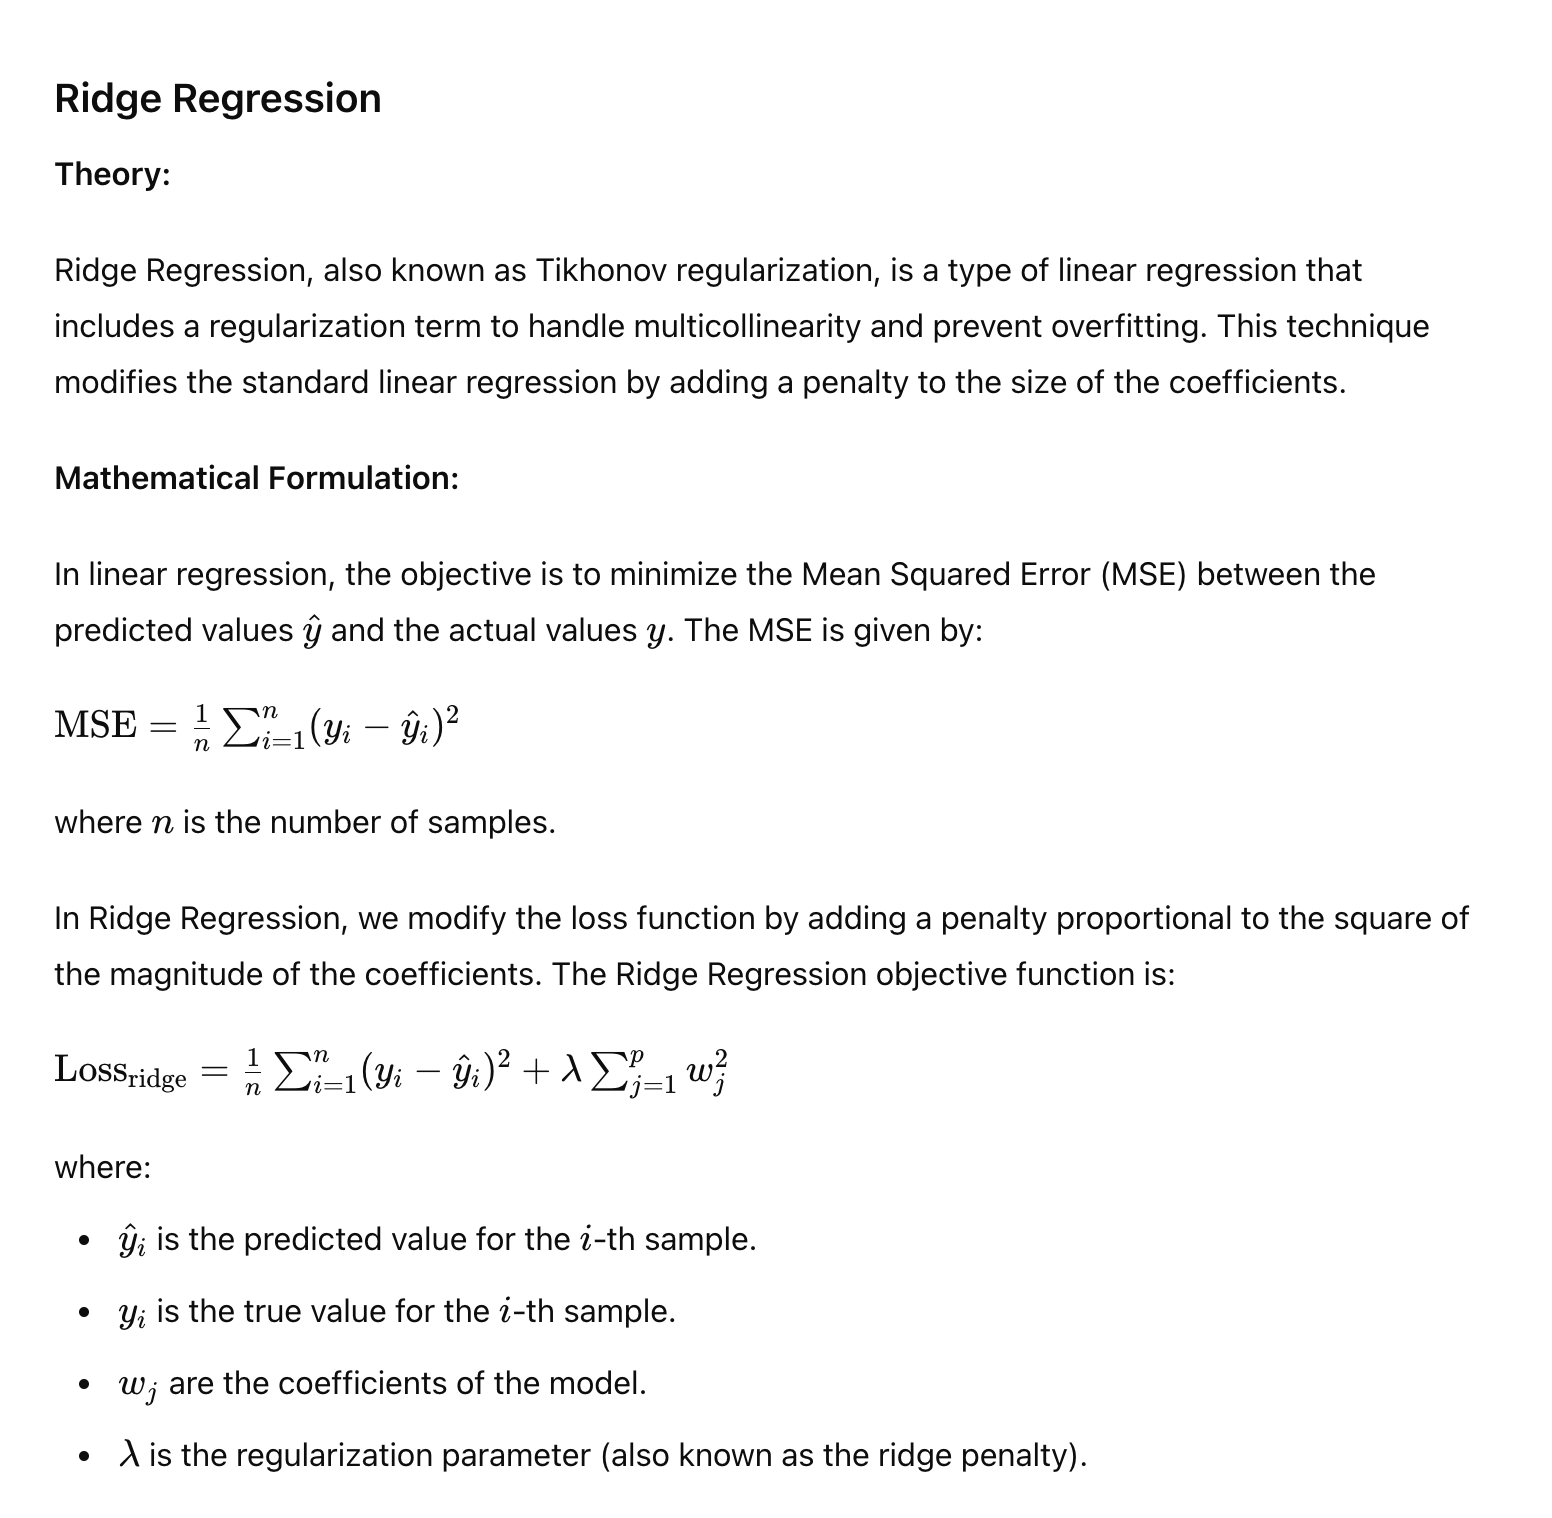

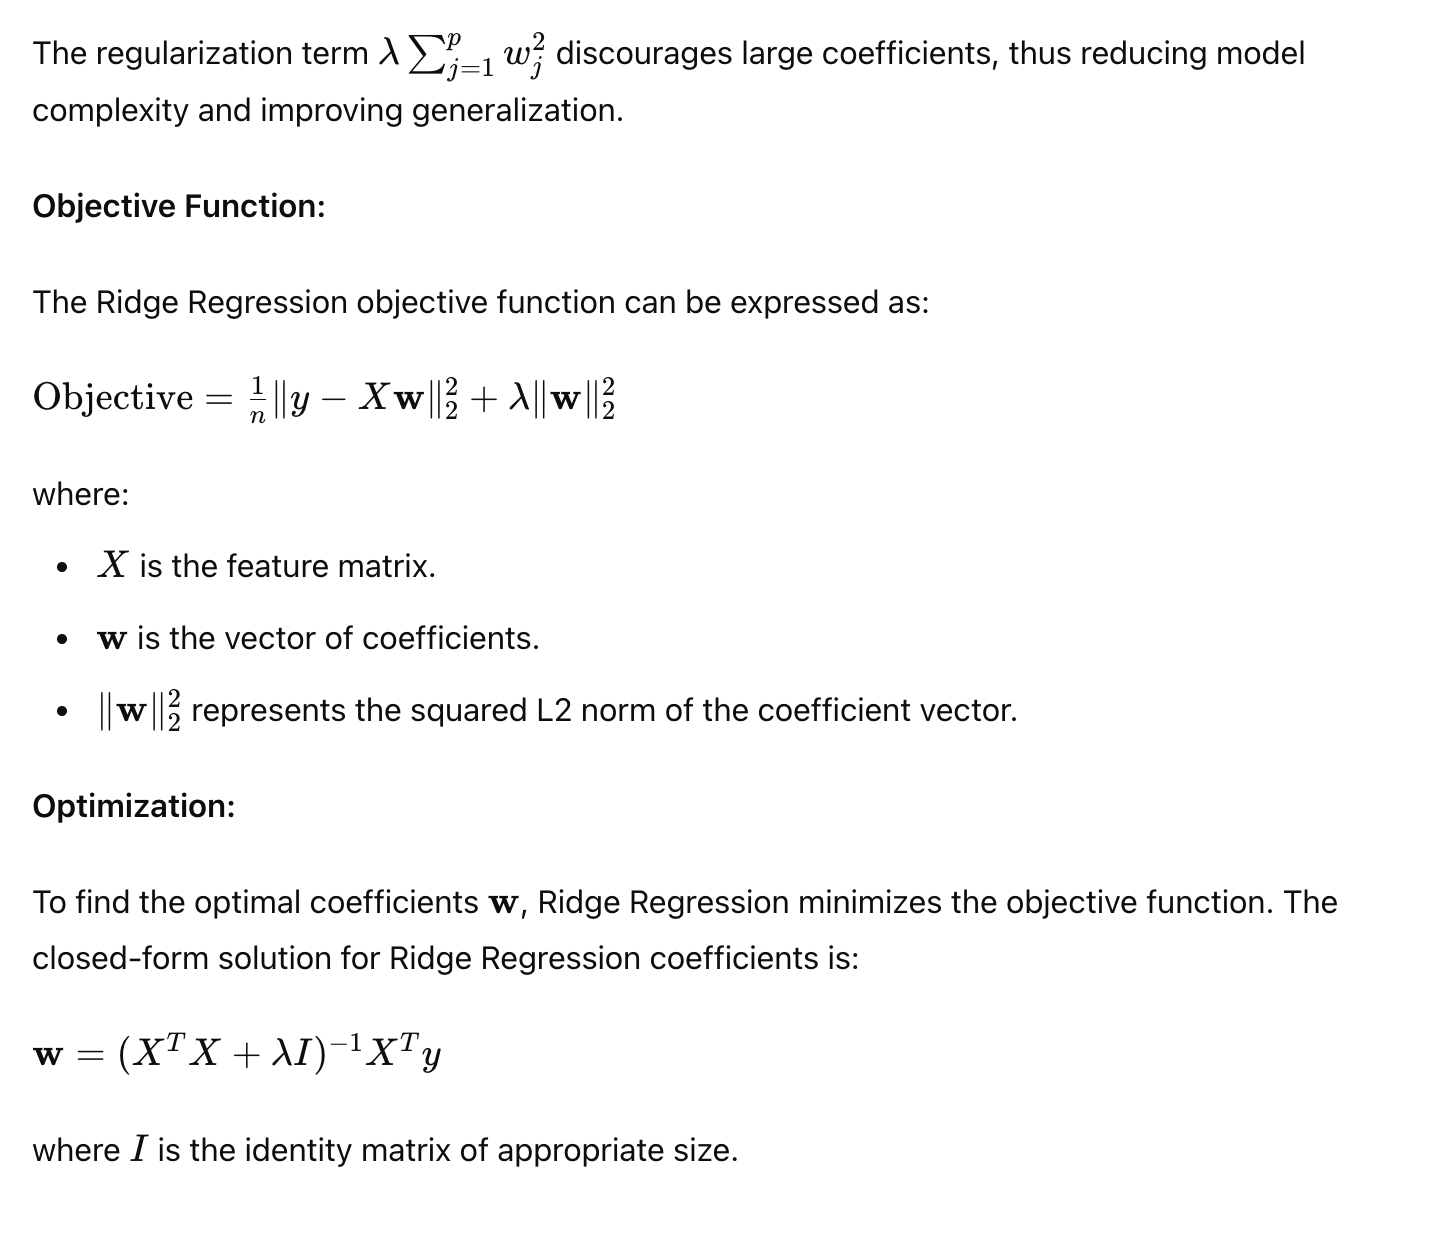

In [27]:
# 1. Fill NA values with the mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# 2. One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(float)

# 3. Standardize the non-categorical columns
non_categorical_data = df_encoded[non_categorical_columns].values
mean_non_cat = np.mean(non_categorical_data, axis=0)
std_non_cat = np.std(non_categorical_data, axis=0)
non_categorical_data_standardized = (non_categorical_data - mean_non_cat) / std_non_cat

# 4. Combine standardized non-categorical data with one-hot encoded categorical data
# Remove the original non-categorical columns from the encoded dataframe
df_encoded = df_encoded.drop(columns=non_categorical_columns)
# Add standardized non-categorical data back to the dataframe
df_encoded[non_categorical_columns] = non_categorical_data_standardized

# 5. Shuffle the dataset
df_encoded = df_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Split the data manually into training (80%) and testing (20%)
train_size = int(0.8 * len(df_encoded))
X_train = df_encoded.drop('SalePrice', axis=1).iloc[:train_size].values
y_train = df_encoded['SalePrice'].iloc[:train_size].values

X_test = df_encoded.drop('SalePrice', axis=1).iloc[train_size:].values
y_test = df_encoded['SalePrice'].iloc[train_size:].values

# 7. Add a bias term (intercept) to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]



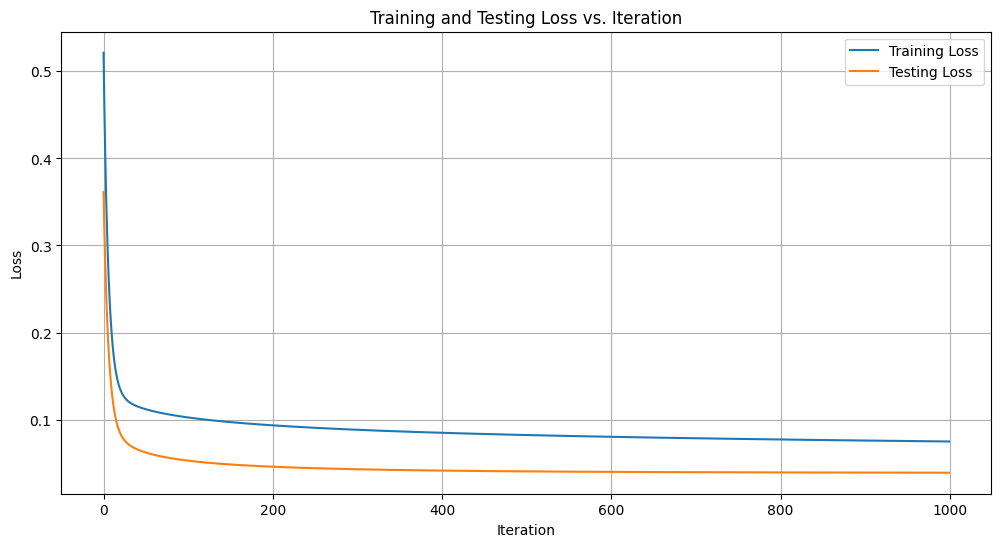

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class RidgeRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, num_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.losses_train = []
        self.losses_test = []

    def fit(self, X_train, y_train, X_test, y_test):
        self.m, self.n = X_train.shape
        self.theta = np.zeros(self.n)

        for iteration in range(self.num_iterations):
            predictions_train = X_train.dot(self.theta)
            errors_train = predictions_train - y_train
            gradient = (1 / self.m) * (X_train.T.dot(errors_train) + self.alpha * self.theta)
            self.theta -= self.learning_rate * gradient

            # Calculate and store training loss
            train_loss = (1 / (2 * self.m)) * (np.sum(errors_train ** 2) + self.alpha * np.sum(self.theta ** 2))
            self.losses_train.append(train_loss)

            # Calculate and store testing loss
            predictions_test = X_test.dot(self.theta)
            errors_test = predictions_test - y_test
            test_loss = (1 / (2 * X_test.shape[0])) * (np.sum(errors_test ** 2) + self.alpha * np.sum(self.theta ** 2))
            self.losses_test.append(test_loss)
        return predictions_train,predictions_test

    def predict(self, X):
        return X.dot(self.theta)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def plot_losses(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.losses_train, label='Training Loss')
        plt.plot(self.losses_test, label='Testing Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training and Testing Loss vs. Iteration')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example Usage
ridge_reg = RidgeRegression(alpha=1.0, learning_rate=0.01, num_iterations=1000)
ridge_reg.fit(X_train, y_train, X_test, y_test)
ridge_reg.plot_losses()


In [30]:
print("The training MSE is : ",ridge_reg.score(X_train,y_train))
print("The testing MSE is :",ridge_reg.score(X_test,y_test))

The training MSE is :  0.14938644707657595
The testing MSE is : 0.07658506204804816
